# A Comprehensive Machine Learning Framework for Predicting and Analyzing Urban Air Quality in India

**Author:** Nadia Sharief

**Institution:** University of Arizona 

**Degree:** Master of Science in Data Science

**Date of Completion:** March 25, 2025

### **Introduction:**

Air pollution is a major environmental health issue, with increasing evidence linking exposure to harmful pollutants such as nitrogen dioxide (NO₂) and particulate matter (PM) to severe health problems, including respiratory diseases, cardiovascular issues, and cancer. Urban areas, particularly those with high pollution levels, disproportionately affect vulnerable populations, exacerbating health disparities. Understanding how varying levels of air pollution influence public health is crucial, especially in communities facing environmental injustices.

This research aims to assess the impact of air pollution on health outcomes, with a particular focus on cancer incidence and survival. Machine learning (ML) techniques are employed to predict air quality levels, categorized into AQI (Air Quality Index) buckets, which represent different health risk categories. By classifying AQI levels into categories such as "Good," "Moderate," and "Unhealthy," the study investigates how exposure to different pollution levels correlates with health risks.

The study utilizes a range of machine learning models, including K-Nearest Neighbors (KNN), Gaussian Naïve Bayes (GNB), Support Vector Machine (SVM), Random Forest (RF), and XGBoost, to predict AQI buckets based on environmental data from 2015 to 2020. To address class imbalance, the Synthetic Minority Over-sampling Technique (SMOTE) is applied to ensure robust model performance across all AQI categories. Various performance metrics, including accuracy, precision, recall, F1-score, and error metrics such as RMSE and MAE, are used to evaluate model effectiveness.

By exploring the relationship between air pollution and health outcomes, this research aims to provide valuable insights for public health policy, particularly in regions where air pollution is a critical concern. The findings will assist policymakers and healthcare professionals in designing interventions to reduce exposure to harmful pollutants, especially in underserved communities.

### **Methodology Applied in this Project**

#### **Data Preparation and Preprocessing**
- **Data Sources:** Air quality data from **CPCB** and **Kaggle** (AQI, NO₂, PM for 2015-2020).
- **Data Imputation:** Compared **mean, KNN, and iterative imputation** methods. Chose **KNN** for its lower RMSE and ability to maintain non-negative data.
- **Data Cleaning:** Identified and corrected **outliers and erroneous values** affecting model performance.
- **Mapping to AQI Categories:** Categorized AQI values into **Good, Moderate, Unhealthy, etc.**.
- **Data Consistency:** Verified **data types and unique values** to maintain consistency.

#### **Exploratory Data Analysis (EDA)**
- **Feature Exploration:** Examined the **influence of pollutants** on AQI levels.
- **Correlation Heatmap:** Visualized **relationships between pollutants and AQI**.
- **Trend Analysis:** Analyzed **annual and seasonal variations** in AQI and pollutants, including trends for the **six most polluted cities in India**.
- **Pollutant Contributions:** Investigated **city-wise AQI contributions** and pollutant trends over time.
- **Feature Transformation & Normalization:**  
  - Assessed and **addressed skewness** in features.  
  - Applied **log and Yeo-Johnson transformations** for normalization.  
  - Used **StandardScaler** to normalize training and testing datasets.  
- **Class Imbalance Handling:** Identified **class imbalance**, leading to the application of **SMOTE**.

#### **Geospatial Analysis  (Within EDA):**
- **City-Level AQI Mapping:**  
  - Used **geocoding** to obtain **latitude/longitude** coordinates for cities.  
  - Plotted **AQI bucket distributions** on **Folium maps**, highlighting pollution hotspots.  

- **Spatial AQI Trends:**  
  - Visualized **geographic variations** in AQI levels.  
  - Analyzed **regional disparities** in pollution exposure.
  - Mapped **yearly and monhtly trends** to observe AQI fluctuations.
   
#### **Model Development**
- **Class Distribution Analysis:** Evaluated **class distribution** in training and testing sets for **AQI prediction**.
- **Model Definition:** Defined ML models (**KNN, Naive Bayes, Random Forest, XGBoost, SVM**) for **AQI prediction**.
- **Model Evaluation:**  
  - **Without SMOTE:** Assessed model performance on **normalized data**.  
  - **With SMOTE:** Applied **SMOTE** to address class imbalance, improving prediction for **underrepresented AQI categories**.




### Choropleth Map of Deaths from Outdoor Air Pollution by Country (2015–2020)

#### Data Loading and Combining

In [1]:
import pandas as pd

data1 = pd.read_excel("C:\\Users\\nadia\\Downloads\\data1.xlsx")
data2 = pd.read_excel("C:\\Users\\nadia\\Downloads\\data2.xlsx")
data3 = pd.read_excel("C:\\Users\\nadia\\Downloads\\data3.xlsx")
data4 = pd.read_excel("C:\\Users\\nadia\\Downloads\\data4.xlsx")
data5 = pd.read_excel("C:\\Users\\nadia\\Downloads\\data5.xlsx")

# Combine all datasets 
df_all = pd.concat([data1, data2, data3, data4, data5], ignore_index=True)
print("Combined dataset shape:", df_all.shape)

print("First few rows of the combined dataset:")
print(df_all.head())


Combined dataset shape: (915, 4)
First few rows of the combined dataset:
  GeometryCode  Max of Year        First Location           First Tooltip
0          AFG         2015           Afghanistan  20 688 [16 534-25 300]
1          AGO         2015                Angola      8527 [2150-16 192]
2          ALB         2015               Albania        2250 [1643-2862]
3          ARE         2015  United Arab Emirates        1607 [1251-1962]
4          ARG         2015             Argentina  18 729 [12 845-25 270]


#### Data Cleaning and Aggregation

In [2]:
import re

# Defining a function to extract the death count 
def extract_deaths(text):
    """
    Extracts the first numeric value from the input text.
    For example, "20 688 [16 534-25 300]" becomes 20688.
    """
    # Remove spaces and then use regex to extract digits.
    text_clean = text.replace(" ", "")
    match = re.search(r'(\d+)', text_clean)
    if match:
        return int(match.group(1))
    return None

# Apply the function to create a new deaths column
df_all['Deaths'] = df_all['First Tooltip'].astype(str).apply(extract_deaths)

# Rename "First Location" to "Country" for clarity
df_all.rename(columns={'First Location': 'Country'}, inplace=True)

# Preview the data with the new 'Deaths' column
print("Data with Deaths column:")
print(df_all[['Country', 'Max of Year', 'First Tooltip', 'Deaths']].head())

# Aggregate the total deaths by country (if multiple rows exist per country)
country_deaths = df_all.groupby("Country", as_index=False)["Deaths"].sum()

print("Aggregated deaths by country:")
print(country_deaths.head())


Data with Deaths column:
                Country  Max of Year           First Tooltip  Deaths
0           Afghanistan         2015  20 688 [16 534-25 300]   20688
1                Angola         2015      8527 [2150-16 192]    8527
2               Albania         2015        2250 [1643-2862]    2250
3  United Arab Emirates         2015        1607 [1251-1962]    1607
4             Argentina         2015  18 729 [12 845-25 270]   18729
Aggregated deaths by country:
               Country  Deaths
0          Afghanistan  106671
1              Albania   13457
2              Algeria   81529
3               Angola   42985
4  Antigua and Barbuda     106


#### Geocoding Countries

In [3]:
from geopy.geocoders import Nominatim
import time
import pandas as pd

# Initialize the geolocator with an increased timeout (e.g., 10 seconds)
geolocator = Nominatim(user_agent="deaths_map", timeout=10)
country_locations = {}

# Loop through unique countries in your DataFrame and obtain coordinates.
for country in country_deaths['Country'].unique():
    try:
        location = geolocator.geocode(country)
        if location:
            country_locations[country] = (location.latitude, location.longitude)
        else:
            country_locations[country] = (None, None)
    except Exception as e:
        print(f"Error geocoding {country}: {e}")
        country_locations[country] = (None, None)
    time.sleep(1)  # Respect API rate limits

# Add latitude and longitude columns to your DataFrame
country_deaths['Latitude'] = country_deaths['Country'].apply(lambda x: country_locations[x][0])
country_deaths['Longitude'] = country_deaths['Country'].apply(lambda x: country_locations[x][1])

print("Country deaths with coordinates:")
print(country_deaths.head())


Country deaths with coordinates:
               Country  Deaths   Latitude  Longitude
0          Afghanistan  106671  33.768006  66.238514
1              Albania   13457   5.758765 -73.915162
2              Algeria   81529  28.000027   2.999983
3               Angola   42985 -11.877577  17.569124
4  Antigua and Barbuda     106  17.223472 -61.955461


#### Creating the Choropleth Map

In [4]:
import folium
import json

# 1. Load your GeoJSON data (update the file path as needed)
geojson_path = "C:\\Users\\nadia\\Downloads\\countries.geo.json"
with open(geojson_path, "r", encoding="utf-8") as f:
    geojson_data = json.load(f)

# (Optional) Verify the properties of the first feature
print("Properties of the first GeoJSON feature:")
print(geojson_data['features'][0]['properties'])  # Expected output: {'name': 'Afghanistan'}

# 2. Create a base Folium map centered on a global location
m = folium.Map(location=[20, 0], zoom_start=2)

folium.Choropleth(
    geo_data=geojson_data,
    name="Choropleth",
    data=country_deaths,
    columns=["Country", "Deaths"],  # Use "Country" instead of "GeometryCode"
    key_on="feature.properties.name",  # Matches the 'name' property in your GeoJSON
    fill_color="YlGnBu",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Deaths from Outdoor Air Pollution",
).add_to(m)

# 4. (Optional) Add a GeoJsonTooltip to display the country name on hover
folium.GeoJson(
    geojson_data,
    name="Country Names",
    style_function=lambda x: {"fillColor": "transparent", "color": "transparent", "fillOpacity": 0},
    tooltip=folium.GeoJsonTooltip(
        fields=["name"],
        aliases=["Country:"],
        localize=True
    ),
).add_to(m)

# 5. Display the map (In Jupyter Notebook, the map object should render)
m



Properties of the first GeoJSON feature:
{'name': 'Afghanistan'}


**Introduction and Methodological Rationale**

Outdoor air pollution is a critical global health concern, responsible for a significant number of premature deaths worldwide. In our research, we developed a comprehensive framework to quantify and visualize mortality associated with outdoor air pollution, with a special focus on India.

Our approach begins with the integration of multiple datasets, where individual Excel files containing raw death count information are merged into a unified dataset. A custom text extraction routine was implemented to convert complex string entries—such as those including ranges and extra characters—into clean numerical death counts. This step is crucial for ensuring the accuracy of subsequent aggregation and analysis.

Once the data were cleansed, we aggregated the death counts at the country level. This aggregation provided a clear, global perspective on the distribution of pollution-related mortality. To spatially contextualize the data, we employed geocoding methods to obtain latitude and longitude coordinates for each country, enabling the creation of an interactive choropleth map. This visualization highlighted regions with elevated mortality, clearly identifying India as a densely affected nation.

Building on these findings, we are now refining our analysis by transitioning to city-level data within India. This shift allows us to pinpoint urban hotspots where pollution-related mortality is particularly severe, facilitating a more targeted investigation into local air quality trends and health outcomes. By incorporating city-specific pollution levels, population exposure metrics, and localized health data, we aim to provide more actionable insights for policymakers and environmental researchers. This granular approach will support the development of more precise mitigation strategies tailored to high-risk urban areas.

### Data Reading and Initial Exploration

#### Load the Dataset

In [5]:
import pandas as pd

# Read the CSV file into the original DataFrame.
# Replace 'path_to_your_file.csv' with the actual file path.
df_original = pd.read_csv("C:\\Users\\nadia\\Downloads\\city_day.csv")

# Display the first few rows to verify the data.
print("Original DataFrame:")
print(df_original.head())

# Create a new DataFrame as a copy of the original for further processing.
df = df_original.copy()

print(df.head())


Original DataFrame:
        City        Date  PM2.5  PM10     NO    NO2    NOx  NH3     CO    SO2  \
0  Ahmedabad  2015-01-01    NaN   NaN   0.92  18.22  17.15  NaN   0.92  27.64   
1  Ahmedabad  2015-01-02    NaN   NaN   0.97  15.69  16.46  NaN   0.97  24.55   
2  Ahmedabad  2015-01-03    NaN   NaN  17.40  19.30  29.70  NaN  17.40  29.07   
3  Ahmedabad  2015-01-04    NaN   NaN   1.70  18.48  17.97  NaN   1.70  18.59   
4  Ahmedabad  2015-01-05    NaN   NaN  22.10  21.42  37.76  NaN  22.10  39.33   

       O3  Benzene  Toluene  Xylene  AQI AQI_Bucket  
0  133.36     0.00     0.02    0.00  NaN        NaN  
1   34.06     3.68     5.50    3.77  NaN        NaN  
2   30.70     6.80    16.40    2.25  NaN        NaN  
3   36.08     4.43    10.14    1.00  NaN        NaN  
4   39.31     7.01    18.89    2.78  NaN        NaN  
        City        Date  PM2.5  PM10     NO    NO2    NOx  NH3     CO    SO2  \
0  Ahmedabad  2015-01-01    NaN   NaN   0.92  18.22  17.15  NaN   0.92  27.64   
1  Ahme

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import matplotlib.patches as mpatches

# ---------------------------
# 1. Identify the Top Six Polluted Cities by Average AQI
# ---------------------------
# Assume df_filtered is already your DataFrame filtered for years 2015-2020.
city_aqi = df_original.groupby('City', observed=False)['AQI'].mean().reset_index()
top_six_cities = city_aqi.sort_values(by='AQI', ascending=False).head(6)
top_cities = top_six_cities['City'].tolist()
print("Top Six Cities by Average AQI:")
print(top_six_cities)



Top Six Cities by Average AQI:
         City         AQI
0   Ahmedabad  452.122939
10      Delhi  259.487744
21      Patna  240.782042
12   Gurugram  225.123882
19    Lucknow  217.973059
23    Talcher  172.886819


#### Preview Data and Verify Data Types

In [7]:

# Define the columns you're interested in checking
cols_to_check = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI']

# Check for negative values: print the minimum value in each column
print("Minimum values for each column:")
print(df[cols_to_check].min())

Minimum values for each column:
PM2.5       0.04
PM10        0.01
NO          0.02
NO2         0.01
NOx         0.00
NH3         0.01
CO          0.00
SO2         0.01
O3          0.01
Benzene     0.00
Toluene     0.00
Xylene      0.00
AQI        13.00
dtype: float64


In [8]:
df.dtypes

City           object
Date           object
PM2.5         float64
PM10          float64
NO            float64
NO2           float64
NOx           float64
NH3           float64
CO            float64
SO2           float64
O3            float64
Benzene       float64
Toluene       float64
Xylene        float64
AQI           float64
AQI_Bucket     object
dtype: object

### Missing Data Imputation

#### Simulate Missingness for Evaluation

In [9]:
# Check missing values for each column
print("Missing values per column:")
print(df.isnull().sum())

# Calculate the percentage of missing values for each column
missing_percentage = df.isnull().mean() * 100

print("Percentage of missing values per column:")
print(missing_percentage)

Missing values per column:
City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64
Percentage of missing values per column:
City           0.000000
Date           0.000000
PM2.5         15.570079
PM10          37.723071
NO            12.129626
NO2           12.139785
NOx           14.171549
NH3           34.973418
CO             6.972334
SO2           13.050692
O3            13.619586
Benzene       19.041008
Toluene       27.229014
Xylene        61.322001
AQI           15.851139
AQI_Bucket    15.851139
dtype: float64


In our dataset, not all features are complete. While the non-pollutant attributes like City and Date are fully populated, several pollutant measurements and AQI values exhibit substantial missingness. For example, key air quality indicators such as PM10 and NH3 are missing in approximately 37.7% and 35.0% of observations, respectively, and Xylene is missing in over 61% of cases. Even the AQI and its categorical bucket have missing values of around 15.9%.

This pattern of missing data suggests variability in sensor coverage or data collection practices, which can introduce bias and affect the reliability of downstream analyses. Addressing these missing values through imputation or other data cleaning strategies is critical to ensure that predictive models accurately capture the underlying environmental trends and provide robust insights for decision-makers

#### Compare Imputation Methods (Mean, KNN, Iterative)

In [10]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error

# Enable experimental IterativeImputer
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer

# Assume df is your processed DataFrame with numeric data
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Select complete cases for evaluation
complete_data = df[numeric_cols].dropna().reset_index(drop=True)

# Simulate missingness: randomly mask 10% of the values in complete_data
rng = np.random.default_rng(seed=42)  # for reproducibility
mask = rng.uniform(size=complete_data.shape) < 0.1

# Create a copy of the complete data and mask some values
data_masked = complete_data.copy()
data_masked[mask] = np.nan

# Define imputation methods:
# 1. Mean Imputation
mean_imputer = SimpleImputer(strategy='mean')
imputed_mean = mean_imputer.fit_transform(data_masked)

# 2. KNN Imputation
knn_imputer = KNNImputer(n_neighbors=5)
imputed_knn = knn_imputer.fit_transform(data_masked)

# 3. Iterative Imputation with increased max_iter for better convergence
iter_imputer = IterativeImputer(max_iter=20, random_state=0)
imputed_iter = iter_imputer.fit_transform(data_masked)

# Function to compute RMSE on the artificially masked values
def compute_rmse(true_data, imputed_data, mask):
    true_vals = true_data.values[mask]
    imputed_vals = imputed_data[mask]
    return np.sqrt(mean_squared_error(true_vals, imputed_vals))

# Calculate RMSE for each imputation method
rmse_mean = compute_rmse(complete_data, imputed_mean, mask)
rmse_knn = compute_rmse(complete_data, imputed_knn, mask)
rmse_iter = compute_rmse(complete_data, imputed_iter, mask)

print("RMSE for Mean Imputation:      {:.4f}".format(rmse_mean))
print("RMSE for KNN Imputation:       {:.4f}".format(rmse_knn))
print("RMSE for Iterative Imputation: {:.4f}".format(rmse_iter))


#Based on your RMSE results, Iterative Imputation appears to perform best in terms of predictive accuracy. 
#However, as you've observed, it can sometimes produce negative values even when the raw data should be non-negative. 
#This happens because the regression-based models used internally aren't constrained to output only non-negative numbers.

#Yes, based on your analysis, KNN imputation yielded an RMSE of around 18.88, which is significantly lower 
#than mean imputation (≈39.35) and only a bit higher than iterative imputation (≈15.43). If KNN imputation 
#better preserves the natural non-negative structure of your data and suits your needs, it's a solid choice.

RMSE for Mean Imputation:      39.3514
RMSE for KNN Imputation:       18.8782
RMSE for Iterative Imputation: 15.4265


#### Choose the Best Imputation Method

In [11]:
from sklearn.impute import KNNImputer

# Assume df is your processed DataFrame with numeric data
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

knn_imputer = KNNImputer(n_neighbors=5)
df[numeric_cols] = knn_imputer.fit_transform(df[numeric_cols])

In [12]:
# Check missing values for each column
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
City             0
Date             0
PM2.5            0
PM10             0
NO               0
NO2              0
NOx              0
NH3              0
CO               0
SO2              0
O3               0
Benzene          0
Toluene          0
Xylene           0
AQI              0
AQI_Bucket    4681
dtype: int64


#### Missing Data Imputation: Method Selection and Rationale

In our analysis, we explored several imputation techniques to handle missing values, including mean imputation, KNN imputation, and iterative imputation. Although iterative imputation achieved the lowest RMSE, it sometimes produced negative values for features that should be strictly non-negative (e.g., pollutant concentrations). Mean imputation, on the other hand, resulted in the highest RMSE, indicating a less accurate recovery of the missing data.

We ultimately chose KNN imputation because it delivered a substantially lower RMSE compared to mean imputation and maintained the inherent non-negative structure of the data. This method effectively captures the local similarity among observations, ensuring that the imputed values remain realistic and consistent with the underlying data distribution. As a result, KNN imputation offers a balanced approach that enhances the reliability of our subsequent analyses.

### Target Variable Preparation

In [13]:

# Define the columns you're interested in checking
cols_to_check = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI']

# Check for negative values: print the minimum value in each column
print("Minimum values for each column:")
print(df[cols_to_check].min())

Minimum values for each column:
PM2.5       0.04
PM10        0.01
NO          0.02
NO2         0.01
NOx         0.00
NH3         0.01
CO          0.00
SO2         0.01
O3          0.01
Benzene     0.00
Toluene     0.00
Xylene      0.00
AQI        13.00
dtype: float64


#### Mapping to AQI_Bucket Categories

In [14]:
# Round the imputed AQI values to whole numbers
df['AQI'] = df['AQI'].round(0).astype(int)

# Define the conditions based on the rounded AQI values
conditions = [
    (df['AQI'] >= 0) & (df['AQI'] <= 50),
    (df['AQI'] >= 51) & (df['AQI'] <= 100),
    (df['AQI'] >= 101) & (df['AQI'] <= 200),
    (df['AQI'] >= 201) & (df['AQI'] <= 300),
    (df['AQI'] >= 301) & (df['AQI'] <= 400),
    (df['AQI'] >= 401)
]

# Define the bucket labels with descriptions
bucket_labels = [
    "Good (Minimal Impact)",
    "Satisfactory (Minor breathing discomfort to sensitive people)",
    "Moderate (Breathing discomfort to people with lung, heart disease, children and older adults)",
    "Poor (Breathing discomfort to people on prolonged exposure)",
    "Very Poor (Respiratory illness to people on prolonged exposure)",
    "Severe (Respiratory effects even on healthy people)"
]

# Fill the AQI_Bucket column based on conditions
df['AQI_Bucket'] = np.select(conditions, bucket_labels, default="Unknown")

print(df[['City', 'Date', 'AQI', 'AQI_Bucket']].head())



        City        Date  AQI  \
0  Ahmedabad  2015-01-01  122   
1  Ahmedabad  2015-01-02  124   
2  Ahmedabad  2015-01-03  364   
3  Ahmedabad  2015-01-04  137   
4  Ahmedabad  2015-01-05  385   

                                          AQI_Bucket  
0  Moderate (Breathing discomfort to people with ...  
1  Moderate (Breathing discomfort to people with ...  
2  Very Poor (Respiratory illness to people on pr...  
3  Moderate (Breathing discomfort to people with ...  
4  Very Poor (Respiratory illness to people on pr...  


#### Verifying Unique Values and Data Types

In [15]:
import pandas as pd

# Assuming your DataFrame is named df
unique_aqi_buckets = df['AQI_Bucket'].unique()
print("Unique values in AQI_Bucket:")
print(unique_aqi_buckets)


Unique values in AQI_Bucket:
['Moderate (Breathing discomfort to people with lung, heart disease, children and older adults)'
 'Very Poor (Respiratory illness to people on prolonged exposure)'
 'Severe (Respiratory effects even on healthy people)'
 'Poor (Breathing discomfort to people on prolonged exposure)'
 'Satisfactory (Minor breathing discomfort to sensitive people)'
 'Good (Minimal Impact)']


In [16]:
df.head(25)

City        Date    PM2.5     PM10       NO    NO2     NOx     NH3  \
0   Ahmedabad  2015-01-01   23.178  126.112    0.920  18.22   17.15  10.294   
1   Ahmedabad  2015-01-02   24.736  123.518    0.970  15.69   16.46  10.366   
2   Ahmedabad  2015-01-03  121.276  161.864   17.400  19.30   29.70   8.950   
3   Ahmedabad  2015-01-04   40.686  159.470    1.700  18.48   17.97  12.088   
4   Ahmedabad  2015-01-05  156.074  215.888   22.100  21.42   37.76   9.036   
5   Ahmedabad  2015-01-06  100.498  163.930   45.410  38.48   81.50  15.102   
6   Ahmedabad  2015-01-07   56.166   67.986  112.160  40.62  130.77  23.144   
7   Ahmedabad  2015-01-08   52.128  127.280   80.870  36.74   96.75  25.242   
8   Ahmedabad  2015-01-09   93.630  144.888   29.160  31.00   48.00  17.318   
9   Ahmedabad  2015-01-10   33.184  120.966    4.266   7.04    0.00   3.152   
10  Ahmedabad  2015-01-11   60.930   67.978  132.070  55.80   24.53  25.992   
11  Ahmedabad  2015-01-12  125.840  146.892   52.040  40.67   90.24  15.230   
12  Ahmedabad  2015-01-13  108.250  147.172   48.820  44.20   87.09   9.286   
13  Ahmedabad  2015-01-14   89.090   94.538   19.200  27.86   33.05  19.564   
14  Ahmedabad  2015-01-15   23.048  125.854    0.600  16.96   16.60  10.294   
15  Ahmedabad  2015-01-16   97.440  129.624    1.630  21.72   22.86   9.328   
16  Ahmedabad  2015-01-17   57.298   57.720   11.440  24.73   34.75   5.402   
17  Ahmedabad  2015-01-18   49.158   45.914    6.100  25.77   29.57   8.924   
18  Ahmedabad  2015-01-19   59.624   72.094    2.510  26.88   27.45  16.548   
19  Ahmedabad  2015-01-20   49.610   51.778    7.920  26.80   32.40   8.948   
20  Ahmedabad  2015-01-21   33.810   72.240    9.520  33.56   39.28  16.766   
21  Ahmedabad  2015-01-22   77.926   98.918    9.050  17.51   22.33  26.336   
22  Ahmedabad  2015-01-23  100.792  180.150   22.530  27.96   47.79  24.234   
23  Ahmedabad  2015-01-24  100.510  227.202    2.030  20.39   21.40   8.954   
24  Ahmedabad  2015-01-25   88.148  195.964    1.420  20.43   20.19   8.954   

        CO     SO2      O3  Benzene  Toluene  Xylene  AQI  \
0     0.92   27.64  133.36     0.00     0.02    0.00  122   
1     0.97   24.55   34.06     3.68     5.50    3.77  124   
2    17.40   29.07   30.70     6.80    16.40    2.25  364   
3     1.70   18.59   36.08     4.43    10.14    1.00  137   
4    22.10   39.33   39.31     7.01    18.89    2.78  385   
5    45.41   45.76   46.51     5.42    10.83    1.93  654   
6   112.16   32.28   33.47     0.00     0.00    0.00  653   
7    80.87   38.54   31.89     0.00     0.00    0.00  869   
8    29.16   58.68   25.75     0.00     0.00    0.00  368   
9     0.00    8.29    4.55     0.00     0.00    0.00  127   
10  132.07   25.03    6.79     0.00     0.00    0.00  117   
11   52.04   51.84   45.89     2.41     0.03    7.88  756   
12   48.82   68.21   35.16     9.45    13.35   12.50  668   
13   19.20   52.65   20.96     2.16     2.26    5.19  268   
14    0.60   28.89   47.63     0.14     0.04    1.35  116   
15    1.63   38.27   46.03     0.35     0.05    2.01  156   
16   11.44   49.50   52.24     0.68     0.00    3.27  206   
17    6.10   48.43   53.49     0.74     0.21    2.75  176   
18    2.51   50.03   49.48     0.26     0.02    2.80  107   
19    7.92   58.87   56.37     0.24     0.01    3.97  187   
20    9.52  106.93   48.75     0.33     0.00    5.65   89   
21    9.05   23.71   42.22     0.00     0.00    4.51  197   
22   22.53   39.19   32.92     0.39     0.00    5.95  335   
23    2.03   40.07   32.49     0.47     0.70    1.54  167   
24    1.42   58.41   39.26     0.01     0.00    0.94  137   

                                           AQI_Bucket  
0   Moderate (Breathing discomfort to people with ...  
1   Moderate (Breathing discomfort to people with ...  
2   Very Poor (Respiratory illness to people on pr...  
3   Moderate (Breathing discomfort to people with ...  
4   Very Poor (Respiratory illness to people on pr...  
5   Severe (Respiratory effects

 ### Geospatial Visualization

In [17]:
df['Date'] = pd.to_datetime(df['Date'])
df['AQI_Bucket'] = df['AQI_Bucket'].astype('category')
df['City'] = df['City'].astype('category')

#### Grouping Data by City and AQI_Bucket

In [18]:
import pandas as pd
import folium
from geopy.geocoders import Nominatim
import time
import numpy as np

# Assume your DataFrame is named df and contains columns: 
# 'City', 'AQI_Bucket', etc.

# 1. Group by City and AQI_Bucket, then pick the bucket with the highest count for each city.
grouped = df.groupby(['City', 'AQI_Bucket'], observed=False).size().reset_index(name='Count')
max_bucket = grouped.loc[grouped.groupby('City', observed=False)['Count'].idxmax()]
print("Dominant AQI bucket per city:")
print(max_bucket)




Dominant AQI bucket per city:
                   City                                         AQI_Bucket  \
1             Ahmedabad  Moderate (Breathing discomfort to people with ...   
6                Aizawl                              Good (Minimal Impact)   
15            Amaravati  Satisfactory (Minor breathing discomfort to se...   
19             Amritsar  Moderate (Breathing discomfort to people with ...   
27            Bengaluru  Satisfactory (Minor breathing discomfort to se...   
31               Bhopal  Moderate (Breathing discomfort to people with ...   
37         Brajrajnagar  Moderate (Breathing discomfort to people with ...   
45           Chandigarh  Satisfactory (Minor breathing discomfort to se...   
51              Chennai  Satisfactory (Minor breathing discomfort to se...   
57           Coimbatore  Satisfactory (Minor breathing discomfort to se...   
62                Delhi  Poor (Breathing discomfort to people on prolon...   
69            Ernakulam  Satisfact

 #### Geocoding Cities and Creating a Folium Map

In [19]:
# 2. Geocode each city to get its coordinates.
geolocator = Nominatim(user_agent="aqi_map")
city_locations = {}

for city in max_bucket['City'].unique():
    location = geolocator.geocode(city)
    if location:
        city_locations[city] = (location.latitude, location.longitude)
    else:
        city_locations[city] = (None, None)
    time.sleep(1)  # pause to respect geocoding service rate limits

# 3. Create a Folium map, centering it on the average coordinates of cities with valid geocodes.
valid_coords = [coords for coords in city_locations.values() if coords[0] is not None]
if valid_coords:
    avg_lat = np.mean([lat for lat, lon in valid_coords])
    avg_lon = np.mean([lon for lat, lon in valid_coords])
else:
    avg_lat, avg_lon = 20, 80  # default values if no valid coordinates found

aqi_map = folium.Map(location=[avg_lat, avg_lon], zoom_start=5)

# 4. Define a color mapping for each AQI bucket.
aqi_colors = {
    "Good (Minimal Impact)": "green",
    "Satisfactory (Minor breathing discomfort to sensitive people)": "yellow",
    "Moderate (Breathing discomfort to people with lung, heart disease, children and older adults)": "orange",
    "Poor (Breathing discomfort to people on prolonged exposure)": "red",
    "Very Poor (Respiratory illness to people on prolonged exposure)": "purple",
    "Severe (Respiratory effects even on healthy people)": "darkred",
    "Unknown": "gray"
}

# 5. Add markers for each city using the dominant AQI bucket information.
for idx, row in max_bucket.iterrows():
    city = row['City']
    dominant_bucket = row['AQI_Bucket']
    count = row['Count']
    coords = city_locations.get(city, (None, None))
    
    if coords[0] is not None and coords[1] is not None:
        marker_color = aqi_colors.get(dominant_bucket, 'blue')
        popup_text = (
            f"<b>{city}</b><br>"
            f"Dominant AQI Bucket: {dominant_bucket}<br>"
            f"Count: {count}"
        )
        folium.CircleMarker(
            location=coords,
            radius=8,
            color=marker_color,
            fill=True,
            fill_color=marker_color,
            fill_opacity=0.7,
            popup=popup_text
        ).add_to(aqi_map)

# 6. To display the map in a Jupyter Notebook, simply have the map object as the last line of the cell.
aqi_map


**Geospatial Analysis of Dominant AQI Buckets and Key Cities**

We aggregated our dataset at the city level by grouping observations according to their AQI bucket, then identified the dominant category per city based on the highest frequency count. This method provides a clear, statistically grounded snapshot of prevailing air quality conditions across urban centers, with the observation count lending confidence to the consistency of these classifications.

Our analysis reveals notable regional disparities in air quality. For example, Delhi is consistently classified within the "Poor" AQI bucket, reflecting severe pollution levels that pose substantial health risks. In contrast, cities such as Ahmedabad, Amritsar, and Jaipur are predominantly in the "Moderate" category, indicating significant but somewhat less severe air quality issues. Meanwhile, Aizawl emerges with a dominant "Good" classification, suggesting comparatively better air quality conditions.

Additional metropolitan areas like Bengaluru, Chennai, and Hyderabad, though classified as "Satisfactory" or "Moderate," also warrant attention due to high observation counts that underline the prevalence of their conditions. These insights are critical for informing targeted public health interventions and environmental policies aimed at mitigating the adverse effects of urban air pollution.

### Exploratory Data Analysis (EDA) of Pollutants

In [20]:
# Convert Date column to datetime and extract Year
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')
df['Year'] = df['Date'].dt.year

# Define the pollutant columns we are interested in
pollutant_cols = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']

##### Creating Composite Measures (e.g., BTX)

In [21]:
# Calculate BTX as the average of Benzene, Toluene, and Xylene
df['BTX'] = df[['Benzene', 'Toluene', 'Xylene']].mean(axis=1)

# Optionally, if you prefer to use the sum instead, use:
# df['BTX'] = df[['Benzene', 'Toluene', 'Xylene']].sum(axis=1)

# Display the first few rows to verify the new BTX column
print(df[['City', 'Date', 'Benzene', 'Toluene', 'Xylene', 'BTX']].head())

        City       Date  Benzene  Toluene  Xylene       BTX
0  Ahmedabad 2015-01-01     0.00     0.02    0.00  0.006667
1  Ahmedabad 2015-01-02     3.68     5.50    3.77  4.316667
2  Ahmedabad 2015-01-03     6.80    16.40    2.25  8.483333
3  Ahmedabad 2015-01-04     4.43    10.14    1.00  5.190000
4  Ahmedabad 2015-01-05     7.01    18.89    2.78  9.560000


### Visualizing Annual and Seasonal Trends (Line/Box/Pie Charts)

Rounded DataFrame (first few rows):
        City       Date  PM2.5  PM10  NO  NO2  NOx  NH3  CO  SO2   O3  \
0  Ahmedabad 2015-01-01     23   126   1   18   17   10   1   28  133   
1  Ahmedabad 2015-01-02     25   124   1   16   16   10   1   25   34   
2  Ahmedabad 2015-01-03    121   162  17   19   30    9  17   29   31   
3  Ahmedabad 2015-01-04     41   159   2   18   18   12   2   19   36   
4  Ahmedabad 2015-01-05    156   216  22   21   38    9  22   39   39   

   Benzene  Toluene  Xylene  AQI  \
0        0        0       0  122   
1        4        6       4  124   
2        7       16       2  364   
3        4       10       1  137   
4        7       19       3  385   

                                          AQI_Bucket  Year  BTX  
0  Moderate (Breathing discomfort to people with ...  2015    0  
1  Moderate (Breathing discomfort to people with ...  2015    4  
2  Very Poor (Respiratory illness to people on pr...  2015    8  
3  Moderate (Breathing discomfort to people 

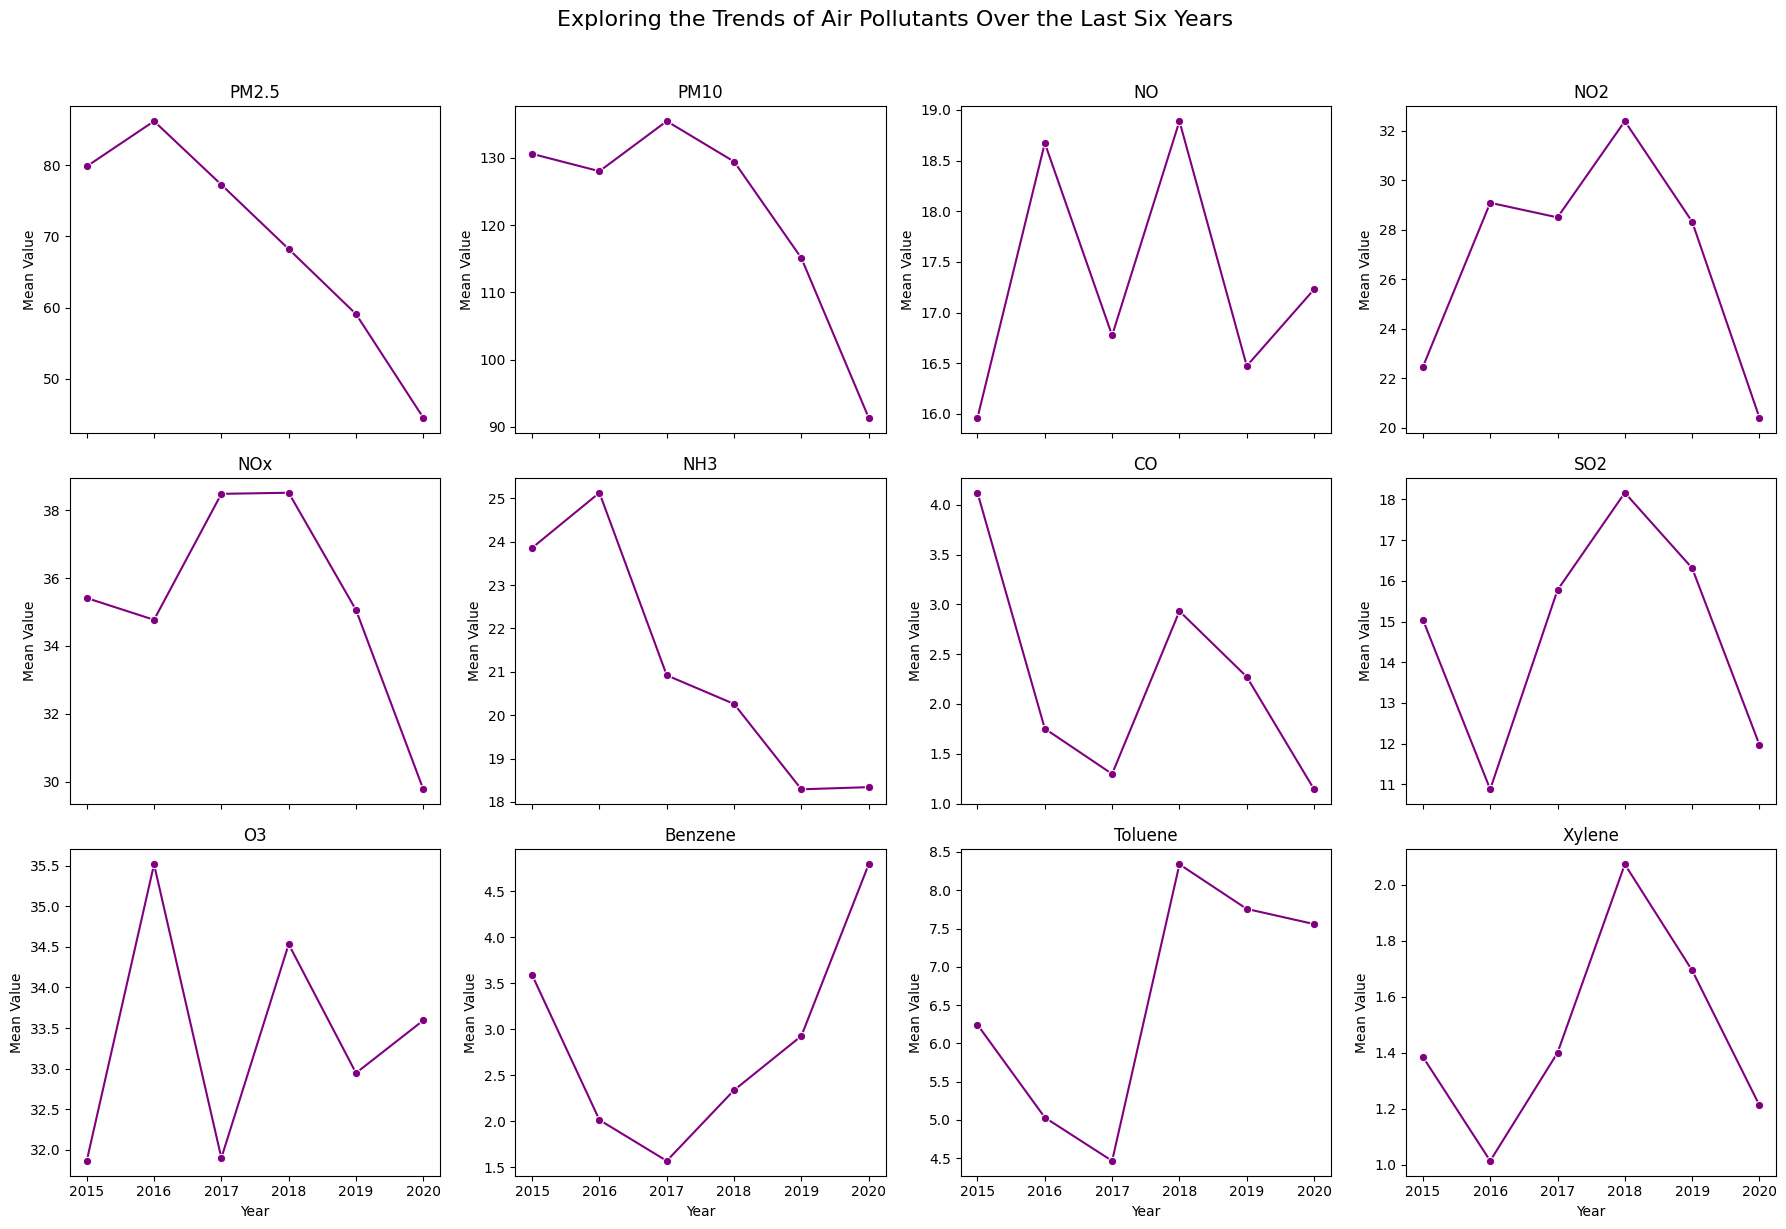

In [22]:
#Exploring the trends of air pollutants over the last six years

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Round all numeric columns in df to whole numbers (0 decimals)
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
df[numeric_cols] = df[numeric_cols].round(0).astype(int)

print("Rounded DataFrame (first few rows):")
print(df.head())

# ---------------------------
# 2. Filter Data for the Years 2015 to 2020
# ---------------------------
df_filtered = df[(df['Year'] >= 2015) & (df['Year'] <= 2020)].copy()

# ---------------------------
# 3. Plot Yearly Trends of Pollutants Using Rounded Data
# ---------------------------
# Define pollutant columns (adjust if needed)
pollutant_cols = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']

# Group by Year and compute the mean (using rounded values)
yearly_trends = df_filtered.groupby('Year')[pollutant_cols].mean().reset_index()

# Create a grid of subplots: 3 rows x 4 columns (enough for 12 pollutants)
rows, cols = 3, 4
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(18, 12), sharex=True)
axes = axes.ravel()  # Flatten the 2D array for easy iteration

for i, col in enumerate(pollutant_cols):
    sns.lineplot(data=yearly_trends, x='Year', y=col, marker='o', ax=axes[i], color='purple')
    axes[i].set_title(col, fontsize=12)
    axes[i].set_xlabel("Year", fontsize=10)
    axes[i].set_ylabel("Mean Value", fontsize=10)
    
# Add an overall title to the figure
plt.suptitle("Exploring the Trends of Air Pollutants Over the Last Six Years", fontsize=16, y=1.02)

plt.tight_layout()
plt.show()
    


**Exploring Temporal Trends in Air Pollutants**

To understand the evolution of air quality over time, we analyzed pollutant trends over the past six years (2015–2020). First, we ensured consistency by rounding all numeric values to whole numbers, reducing noise from minor variations. We then filtered the dataset to focus solely on the years of interest, which allows for a clear view of recent trends.

Next, we grouped the data by year and computed the mean for each pollutant, such as PM2.5, PM10, NO, NO2, and others. This aggregation provided a simplified yet informative overview of annual pollutant levels. By plotting these means on a grid of line charts, we can visually assess how each pollutant has fluctuated over time.

This approach not only highlights seasonal and long-term trends but also helps identify anomalies and potential impacts of interventions (such as policy changes or events like the COVID-19 lockdown). Overall, the analysis provides crucial insights into the temporal dynamics of air pollution, setting the stage for targeted environmental and public health strategies.

#### Yearly Trends in Average AQI for the Six Most Polluted Cities in India (2015-2020)"

Top Six Cities by Average AQI:
         City         AQI
0   Ahmedabad  353.813340
10      Delhi  258.783474
21      Patna  218.284715
19    Lucknow  214.685416
12   Gurugram  212.539011


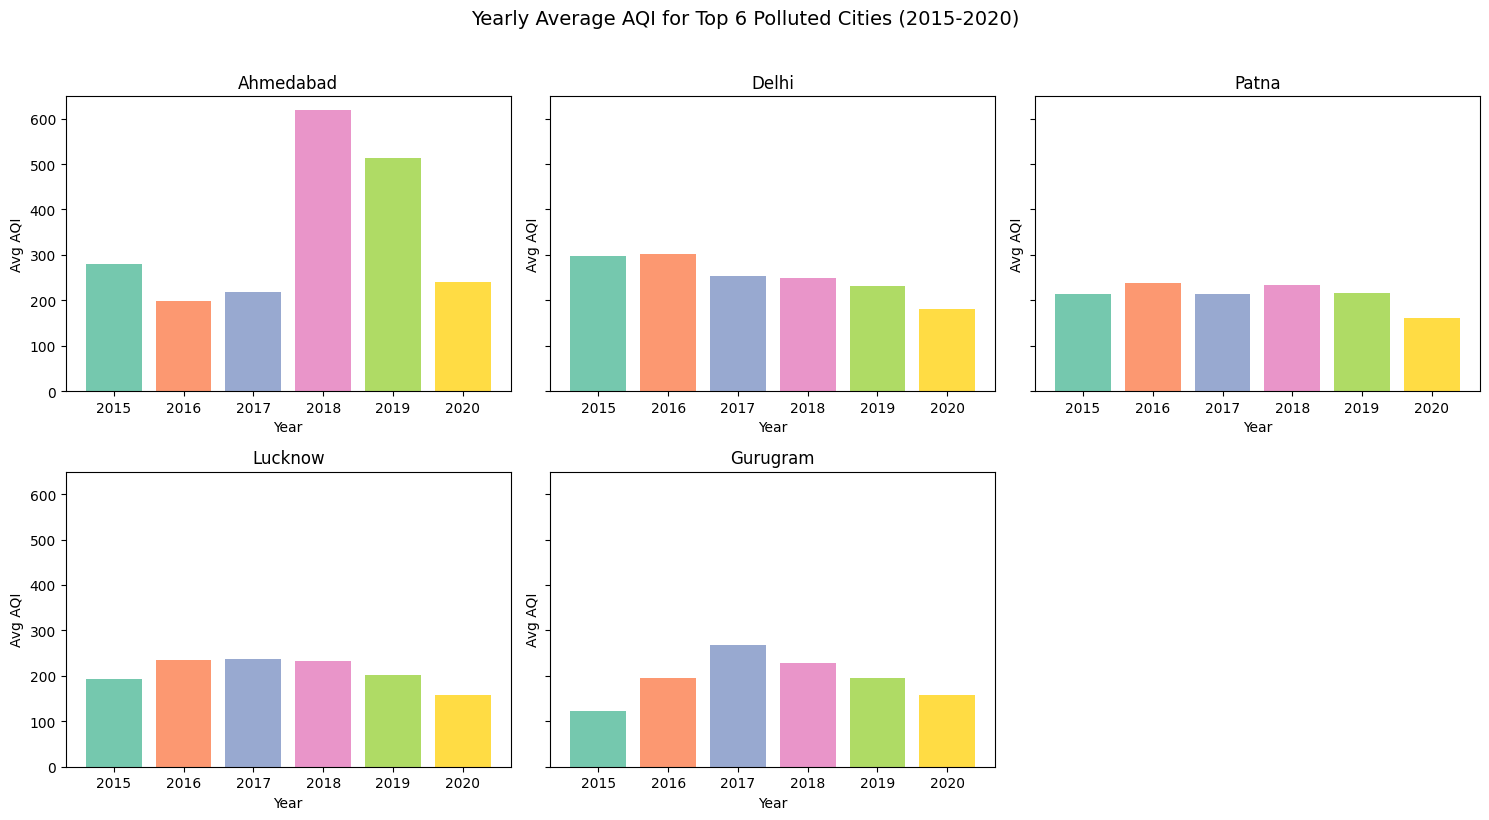

In [23]:
#average AQI values over the aforementioned tenure for the six most polluted cities in India.


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import matplotlib.patches as mpatches

# ---------------------------
# 1. Identify the Top Six Polluted Cities by Average AQI
# ---------------------------
# Assume df_filtered is already your DataFrame filtered for years 2015-2020.
city_aqi = df_filtered.groupby('City', observed=False)['AQI'].mean().reset_index()
top_six_cities = city_aqi.sort_values(by='AQI', ascending=False).head(5)
top_cities = top_six_cities['City'].tolist()
print("Top Six Cities by Average AQI:")
print(top_six_cities)

# Filter data for these top cities
df_top = df_filtered[df_filtered['City'].isin(top_cities)]

# ---------------------------
# 2. Compute Yearly Average AQI for Each Top City
# ---------------------------
city_year_aqi = df_top.groupby(['City', 'Year'], observed=False)['AQI'].mean().reset_index()

# Define the list of years to ensure consistent ordering/colors
year_list = [2015, 2016, 2017, 2018, 2019, 2020]

# Create a color palette for the 6 years
colors = sns.color_palette("Set2", len(year_list))
color_map = dict(zip(year_list, colors))

# ---------------------------
# 3. Plot Each City's Yearly Average AQI (Bar Chart) in Separate Subplots (No Legend)
# ---------------------------
n_cities = len(top_cities)
cols = 3
rows = math.ceil(n_cities / cols)

fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(15, 8), sharey=True)
axes = axes.flatten()

for i, city in enumerate(top_cities):
    city_data = city_year_aqi[city_year_aqi['City'] == city]
    
    x_labels = []
    heights = []
    bar_colors = []
    
    for year in year_list:
        subset = city_data[city_data['Year'] == year]
        aqi_val = subset['AQI'].values[0] if not subset.empty else 0
        x_labels.append(str(year))
        heights.append(aqi_val)
        bar_colors.append(color_map[year])
    
    axes[i].bar(x_labels, heights, color=bar_colors, alpha=0.9)
    axes[i].set_title(city, fontsize=12)
    axes[i].set_xlabel("Year", fontsize=10)
    axes[i].set_ylabel("Avg AQI", fontsize=10)

# Remove any extra subplots if there are fewer cities than rows*cols
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Yearly Average AQI for Top 6 Polluted Cities (2015-2020)", fontsize=14, y=1.02)
plt.tight_layout()
plt.show()



**Temporal Trends in Average AQI for India's Most Polluted Cities**

This segment of our analysis focuses on understanding how air quality has evolved over time in India’s most polluted cities. We began by aggregating city-level AQI data for the period 2015–2020 to determine which urban centers consistently experience the highest levels of air pollution. The data revealed that cities such as Ahmedabad, Delhi, Patna, Lucknow, and Gurugram rank among the top polluted cities based on average AQI.

To delve deeper, we computed the yearly average AQI for each of these cities. This temporal breakdown enables us to visualize trends over the six-year period, highlighting changes in air quality that may result from policy interventions, seasonal variations, or other external factors. By presenting the data as a series of bar charts—using a consistent color palette to represent each year—we can directly compare the annual performance across different cities.

This detailed, city-level temporal analysis not only underscores the persistent challenges faced by these urban areas but also provides valuable insights for targeted air quality improvement measures in India.

Correlation of each pollutant with AQI:
CO         0.653528
PM2.5      0.607025
NO2        0.514347
PM10       0.475362
NO         0.414724
SO2        0.414632
NOx        0.357572
Toluene    0.284504
O3         0.189005
Xylene     0.178314
NH3        0.103869
Benzene    0.052323
Name: AQI, dtype: float64


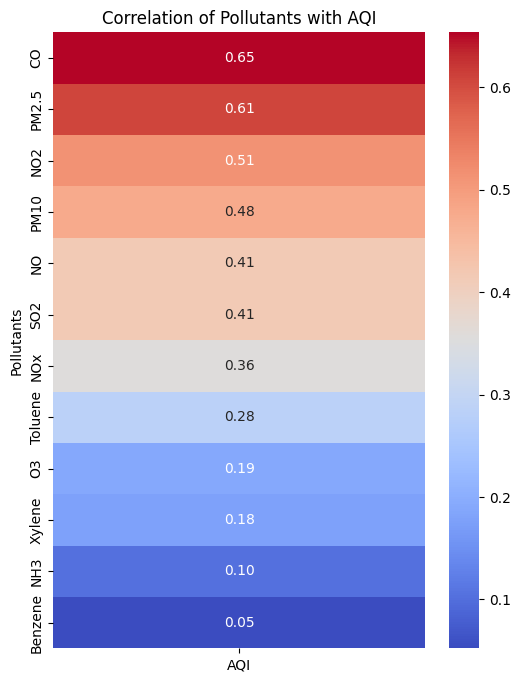

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assume df is your raw DataFrame with columns: 'City', 'AQI', and pollutant columns.
pollutant_cols = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']

# 1. Compute Pearson correlation between each pollutant and AQI
corrs = df[pollutant_cols + ['AQI']].corr()['AQI'].drop('AQI').sort_values(ascending=False)
print("Correlation of each pollutant with AQI:")
print(corrs)

# Plot the correlation heatmap for pollutants vs. AQI
plt.figure(figsize=(6, 8))
sns.heatmap(corrs.to_frame(), annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Correlation of Pollutants with AQI")
plt.ylabel("Pollutants")
plt.show()



**Key Drivers of Air Quality: Pearson Correlation Analysis**

- **Carbon Monoxide (CO)** shows the strongest correlation (≈0.65) with AQI, indicating that elevated CO levels are closely linked to deteriorating air quality.
- **PM2.5** also exhibits a high correlation (≈0.61), emphasizing its significant role in impacting overall air quality.
- **Nitrogen Dioxide (NO2)** follows with a moderate correlation (≈0.51), suggesting it is another key contributor.
- In contrast, pollutants such as Benzene (≈0.05) and NH3 (≈0.10) display very low correlations with AQI, indicating that their direct impact on air quality may be less pronounced.

The accompanying heatmap visualization provides an intuitive overview of these relationships, highlighting the pollutants that most influence AQI. These findings are critical for our study as they help prioritize which pollutant sources to target in mitigation strategies and predictive modeling efforts. By focusing on reducing emissions of CO, PM2.5, and NO2, policymakers and environmental managers can potentially achieve significant improvements in urban air quality and public health outcomes.


Top pollutants (correlation > 0.5, or top 4 if fewer):
CO       0.653528
PM2.5    0.607025
NO2      0.514347
PM10     0.475362
Name: AQI, dtype: float64


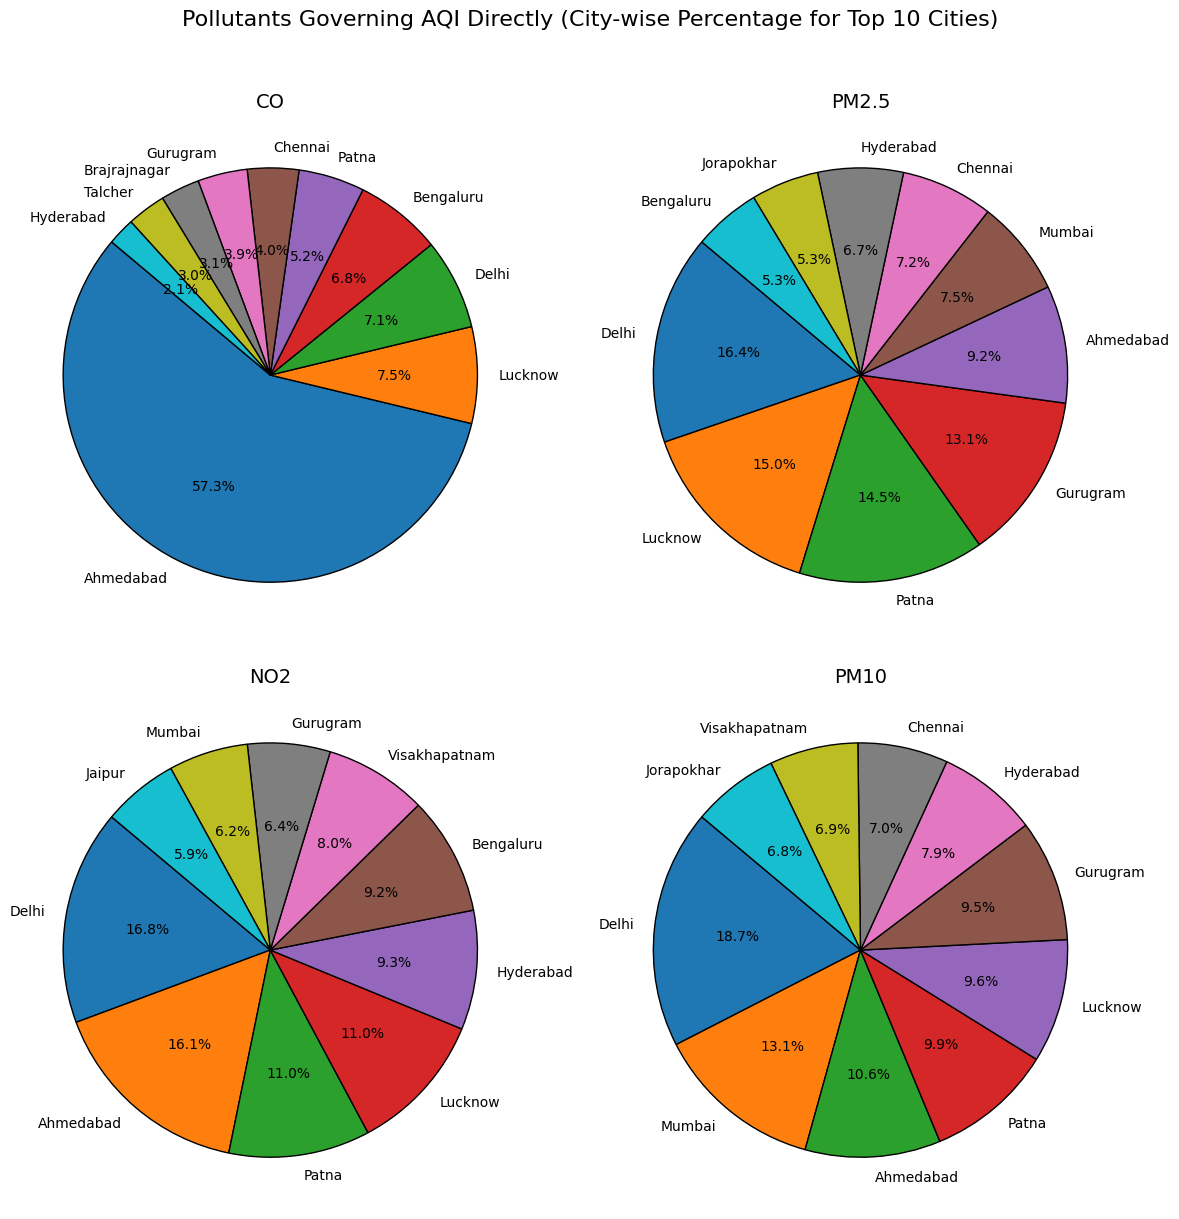

In [25]:
# 2. Filter to include only those with correlation greater than 0.5.
threshold = 0.5
filtered_corrs = corrs[corrs > threshold]

# If fewer than four pollutants meet the threshold, select the top four overall.
if len(filtered_corrs) >= 4:
    top4 = filtered_corrs.head(4)
else:
    top4 = corrs.head(4)

print("\nTop pollutants (correlation > 0.5, or top 4 if fewer):")
print(top4)

top4_pollutants = top4.index.tolist()

# Sum the selected pollutants by city
city_pollutant_sums = df.groupby('City', observed=False)[top4_pollutants].sum()

# 3. Create 2x2 subplots for the selected pollutants' pie charts
fig, axes = plt.subplots(2, 2, figsize=(12, 12))
axes = axes.ravel()

top_n = 10  # Keep only top 10 cities for each pollutant

for i, pollutant in enumerate(top4_pollutants):
    data = city_pollutant_sums[pollutant]
    # Convert to percentages of total
    data_percent = 100 * data / data.sum()
    # Sort descending and keep only the top 10 cities
    data_percent_sorted = data_percent.sort_values(ascending=False).head(top_n)
    
    axes[i].pie(data_percent_sorted, labels=data_percent_sorted.index, autopct='%1.1f%%',
                startangle=140, wedgeprops=dict(edgecolor='black'))
    axes[i].set_title(pollutant, fontsize=14)
    
plt.suptitle("Pollutants Governing AQI Directly (City-wise Percentage for Top 10 Cities)", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

**Identifying Key Pollutants and Their Spatial Impact**

We filter our Pearson correlation results to retain pollutants with coefficients above 0.5, highlighting those most strongly associated with poor air quality. This process identifies CO, PM2.5, NO2, and PM10 as key drivers of deteriorating air quality.

Next, we aggregate these pollutants by city to assess their cumulative burden across urban areas. Pie charts are then generated to display the percentage contributions from the top 10 cities for each pollutant. This visualization reveals urban hotspots where the levels of these critical pollutants are highest.

This targeted analysis connects specific pollutants to the cities most affected, enabling policymakers to design focused interventions for improving air quality.

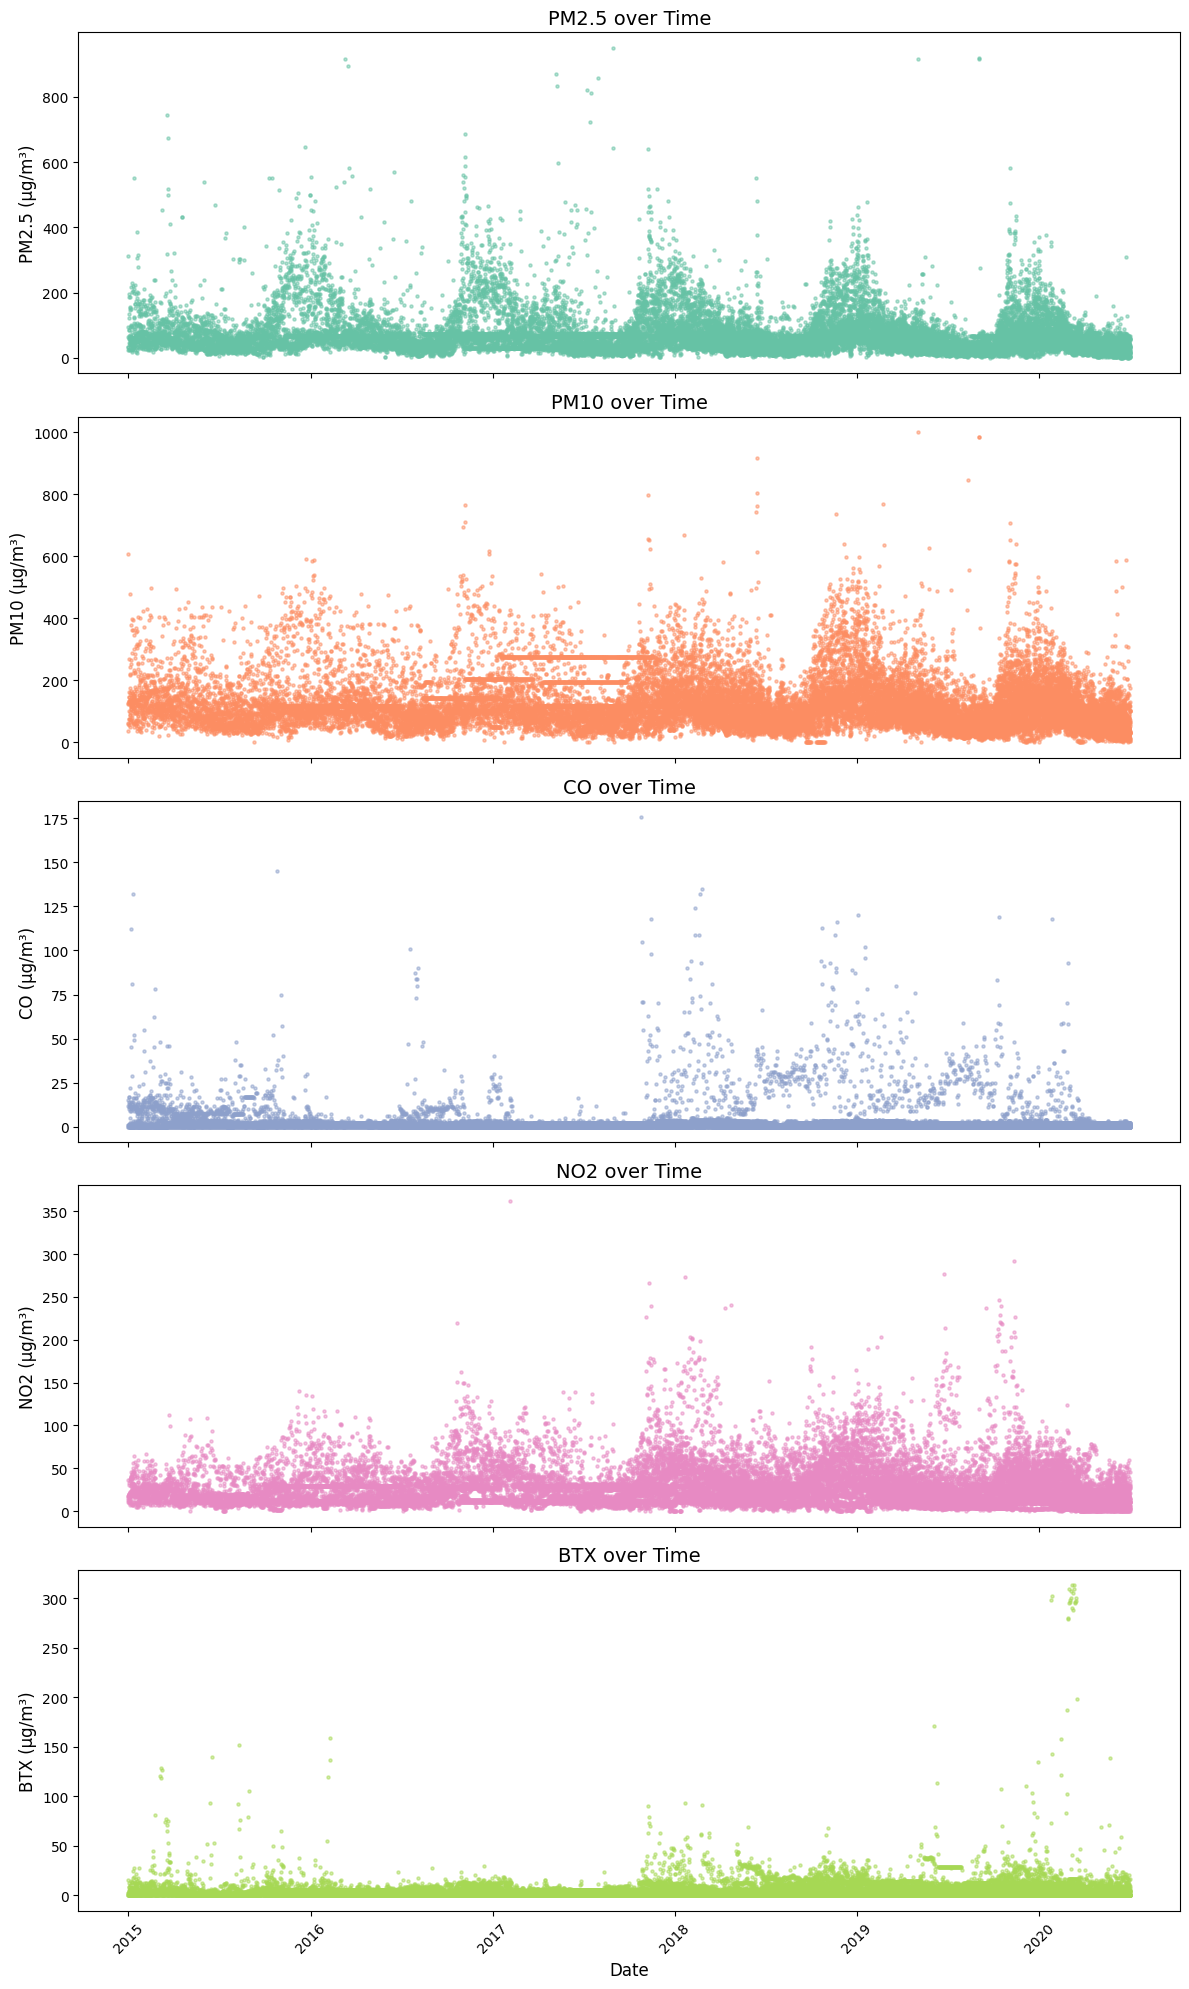

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Example pollutant list. Adjust as needed for your dataset.
pollutants = ['PM2.5', 'PM10', 'CO', 'NO2', 'BTX']

# Create a vertical stack of subplots, one per pollutant
fig, axes = plt.subplots(nrows=len(pollutants), ncols=1, figsize=(12, 20), sharex=True)
axes = axes.flatten()  # Ensure we have a 1D list of axes

# Example color palette
colors = sns.color_palette("Set2", len(pollutants))

for i, poll in enumerate(pollutants):
    # Scatter plot: x = 'Date', y = pollutant concentration
    axes[i].scatter(df['Date'], df[poll], s=5, alpha=0.5, color=colors[i])
    
    # Include pollutant name and unit in the y-axis label
    axes[i].set_ylabel(f"{poll} (µg/m³)", fontsize=12)
    axes[i].set_title(f"{poll} over Time", fontsize=14)

# Label the x-axis only on the last subplot
axes[-1].set_xlabel("Date", fontsize=12)

# Optionally rotate x-tick labels for better readability
for ax in axes:
    plt.setp(ax.get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()






**Temporal Trends of Pollutant Concentrations: Code Rationale and Findings**

This code generates a vertical stack of scatter plots for selected pollutants (PM2.5, PM10, CO, NO2, and BTX) against the date, providing a clear visual overview of their temporal variations. The thought behind the implementation was to enable easy comparison of seasonal patterns, potential anomalies, and long-term trends across these pollutants. For instance, you can observe that particulate matter (PM2.5 and PM10) often reaches higher levels during certain seasons, likely due to combustion sources and weather conditions, while CO and NO2 show spikes indicative of vehicular or industrial emissions. BTX, although generally lower, may exhibit occasional surges linked to specific industrial events. This detailed time-series visualization supports a robust analysis of urban air quality dynamics and informs targeted environmental interventions.

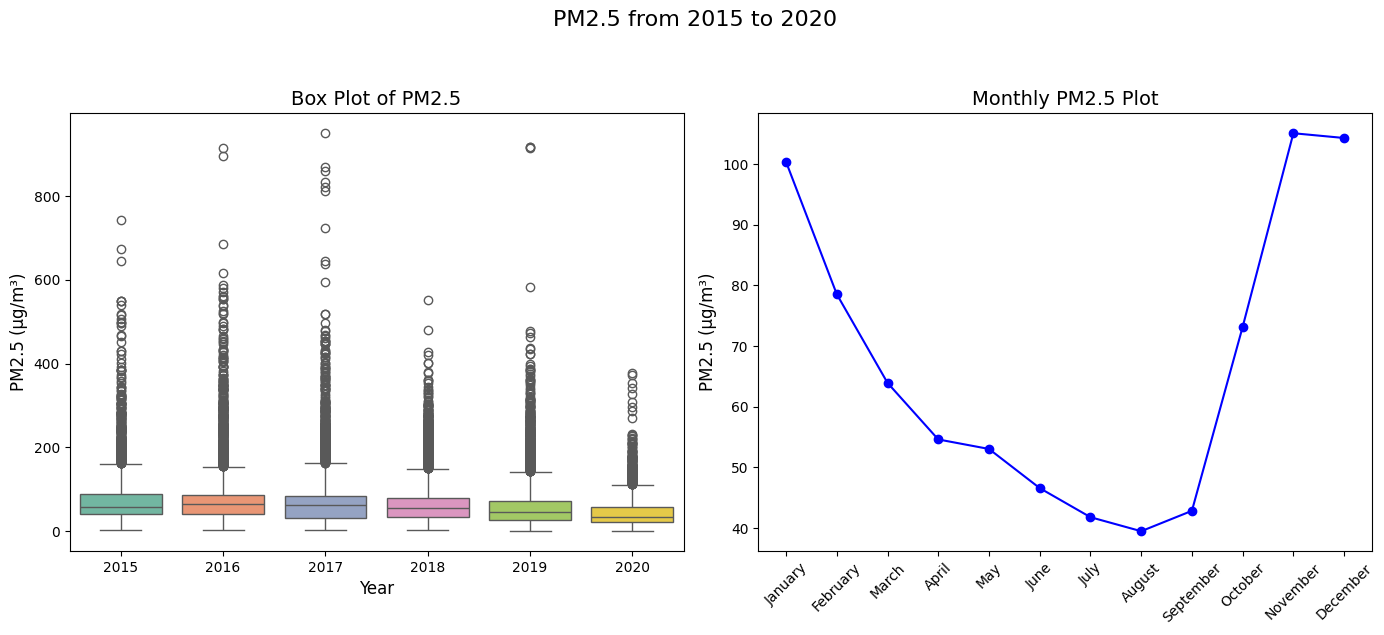

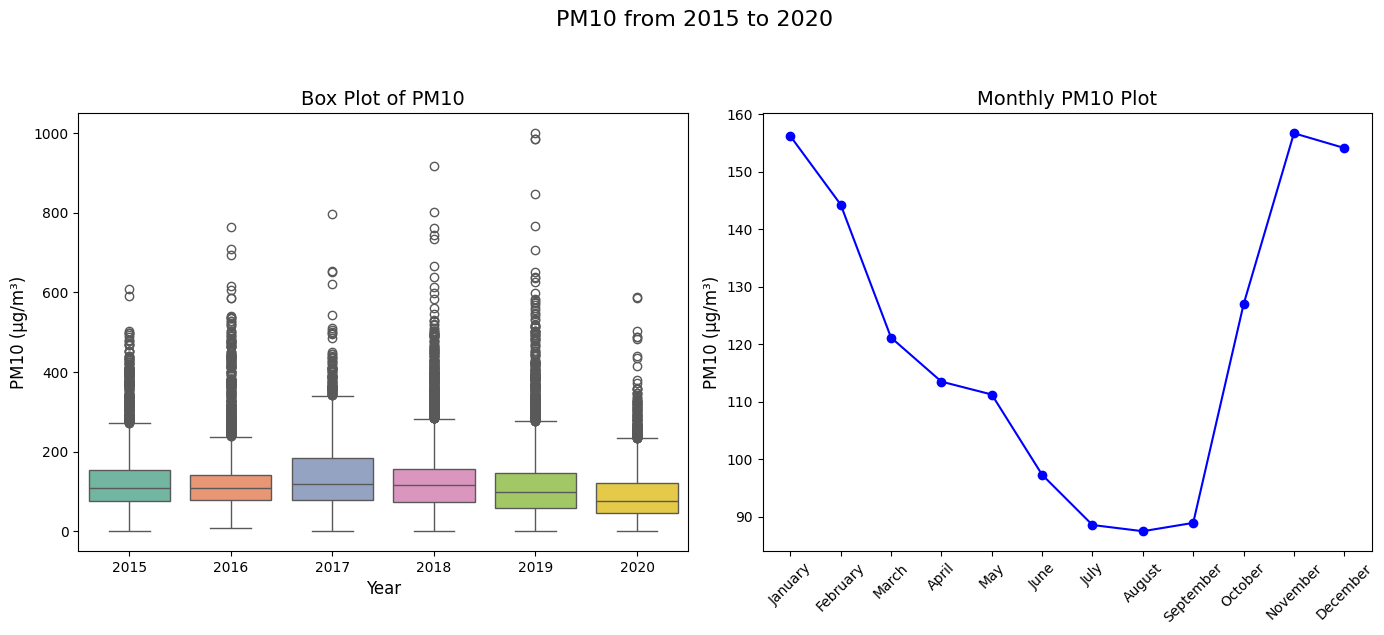

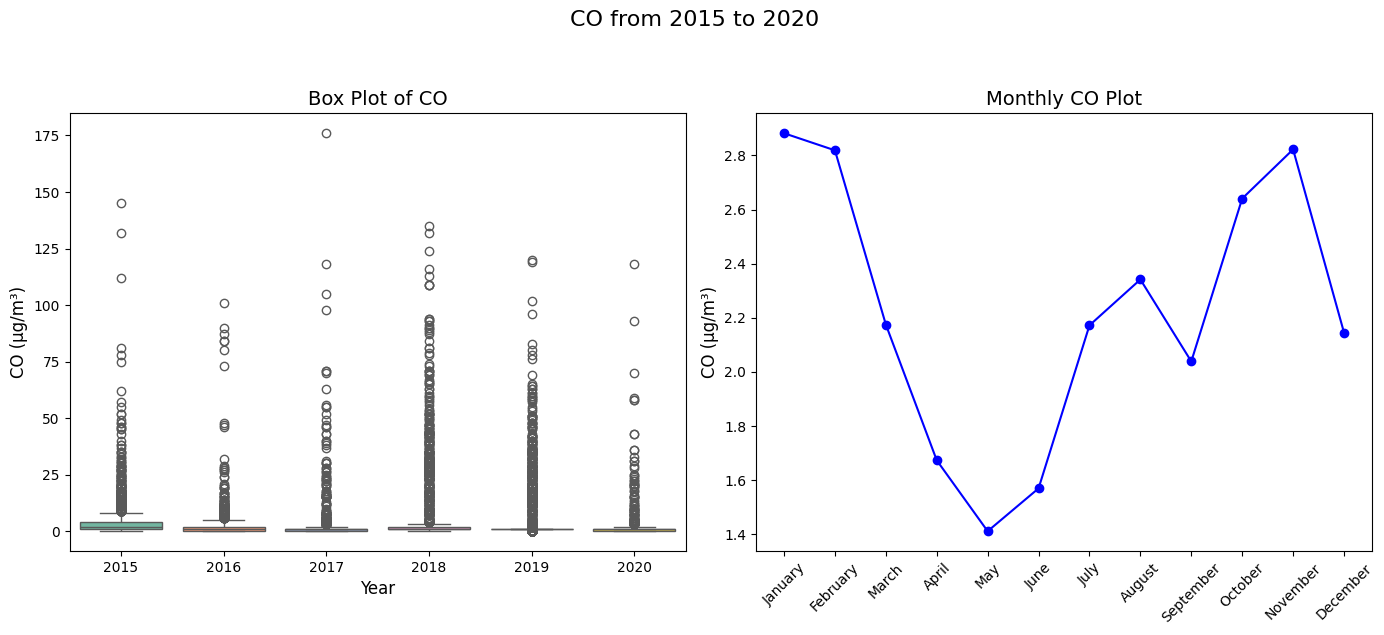

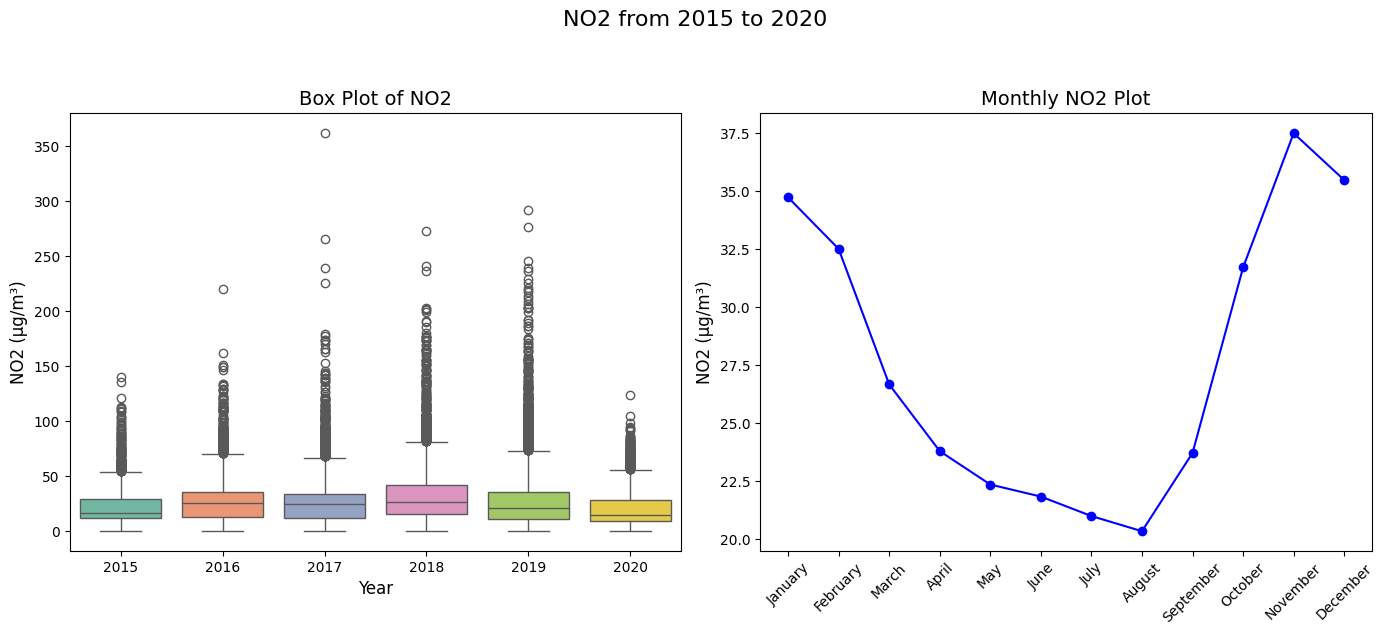

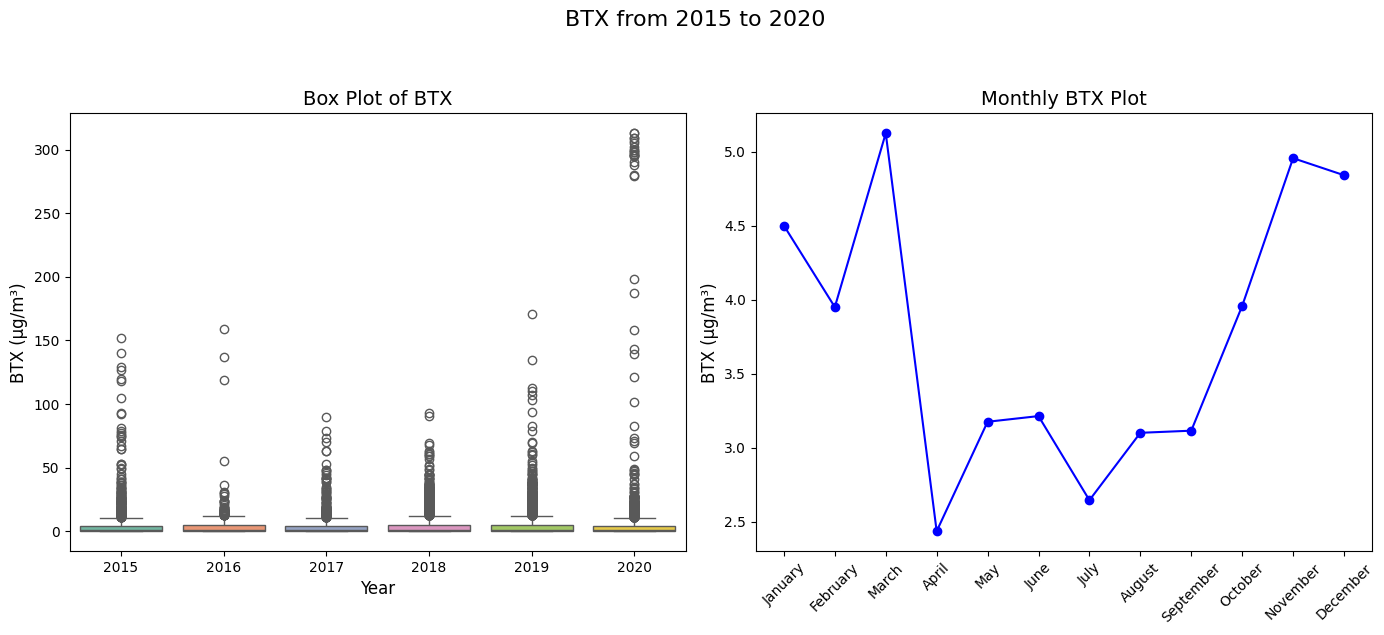

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assume df is your DataFrame filtered for 2015–2020
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month_name()

# If BTX is not already present, create it as the average of Benzene, Toluene, Xylene
# df['BTX'] = df[['Benzene', 'Toluene', 'Xylene']].mean(axis=1)

pollutants = ['PM2.5', 'PM10', 'CO', 'NO2', 'BTX']  # Adjust as needed

def plot_two_views(df, pollutant):
    """
    Creates a figure with 2 subplots:
      1) Box plot of pollutant by year (each year in a different color).
      2) Monthly line plot of the pollutant (averaged across all years).
    """
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))
    fig.suptitle(f"{pollutant} from 2015 to 2020", fontsize=16, y=1.05)

    # --- Left Subplot: Box Plot by Year with different colors ---
    # We set hue='Year' and dodge=False so each year is a separate color on the same x position.
    sns.boxplot(x='Year', y=pollutant, hue='Year', data=df, dodge=False, palette='Set2', ax=axes[0])
    axes[0].set_title(f"Box Plot of {pollutant}", fontsize=14)
    axes[0].set_xlabel("Year", fontsize=12)
    axes[0].set_ylabel(f"{pollutant} (µg/m³)", fontsize=12)
    
    # Remove the legend if you don't want the repeated labels for each year
    legend = axes[0].get_legend()
    if legend:
        legend.remove()

    # --- Right Subplot: Monthly Line Plot ---
    # Group by 'Month' to get the mean pollutant value across all years
    monthly_df = df.groupby('Month', observed=False)[pollutant].mean().reset_index()
    
    # Define an ordered list of months
    month_order = ["January", "February", "March", "April", "May", "June",
                   "July", "August", "September", "October", "November", "December"]
    
    # Convert Month to a categorical with the defined order
    monthly_df['Month'] = pd.Categorical(monthly_df['Month'], categories=month_order, ordered=True)
    monthly_df.sort_values(by='Month', inplace=True)
    
    # Plot the monthly averages as a line plot
    axes[1].plot(monthly_df['Month'], monthly_df[pollutant], marker='o', color='blue')
    axes[1].set_title(f"Monthly {pollutant} Plot", fontsize=14)
    axes[1].set_xlabel("", fontsize=12)
    axes[1].set_ylabel(f"{pollutant} (µg/m³)", fontsize=12)
    axes[1].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

# Generate the two-view plots for each pollutant
for poll in pollutants:
    plot_two_views(df, poll)


**Interpretation of the Yearly Box Plots and Monthly Line Plots**

These two-view plots provide a dual perspective on how each pollutant (PM2.5, PM10, CO, NO2, and BTX) varies from 2015 to 2020:

1. **Yearly Box Plots (Left Subplots)**  
   - The box plots show the distribution of pollutant concentrations across each year. Changes in median values indicate whether pollution levels are rising or falling over time.  
   - The spread (interquartile range) and outliers offer insight into variability and extreme pollution events (e.g., spikes during specific months or under particular weather conditions).  
   - Comparing multiple years side by side highlights potential trends—whether certain pollutants are consistently high, gradually decreasing, or fluctuating due to policy interventions or changing emission sources.

2. **Monthly Line Plots (Right Subplots)**  
   - The monthly plots aggregate data from all years, illustrating an “average” seasonal pattern. For instance, higher values in winter months may reflect temperature inversions and increased combustion for heating, while lower levels during monsoon seasons can be attributed to rain-driven pollutant dispersion.  
   - Sudden peaks in specific months might point to localized events (e.g., festivals, agricultural burning) or industrial activities that temporarily increase emissions.  
   - Observing these monthly cycles helps in understanding the role of climate and human activities in driving pollution dynamics.

Overall, this approach clarifies both long-term changes (via the box plots) and cyclical seasonal behavior (via the monthly lines). Such insights are essential for designing targeted interventions, evaluating the effectiveness of policy measures, and understanding the underlying factors influencing urban air quality over time.

In [28]:
# Remove the BTX column from the DataFrame
df = df.drop(columns=['BTX'])

# Verify by checking the columns of your DataFrame
print(df.columns)



Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket', 'Year',
       'Month'],
      dtype='object')


### Feature Transformation and Normalization

In [29]:
from sklearn.model_selection import train_test_split

# Assume df is your complete DataFrame and the target column is 'AQI_Bucket'
X = df.drop(columns=['AQI_Bucket'])
y = df['AQI_Bucket']

# Split the data into 75% training and 25% testing, stratifying by the target variable
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (22148, 17) (22148,)
Testing set shape: (7383, 17) (7383,)


This code splits the dataset into training (75%) and testing (25%) sets while preserving the class distribution of **AQI_Bucket** through stratification. It ensures that both sets maintain similar proportions of each AQI category, improving the reliability of model training and evaluation.

#### Assessing Skewness of Numeric Features of training dataset

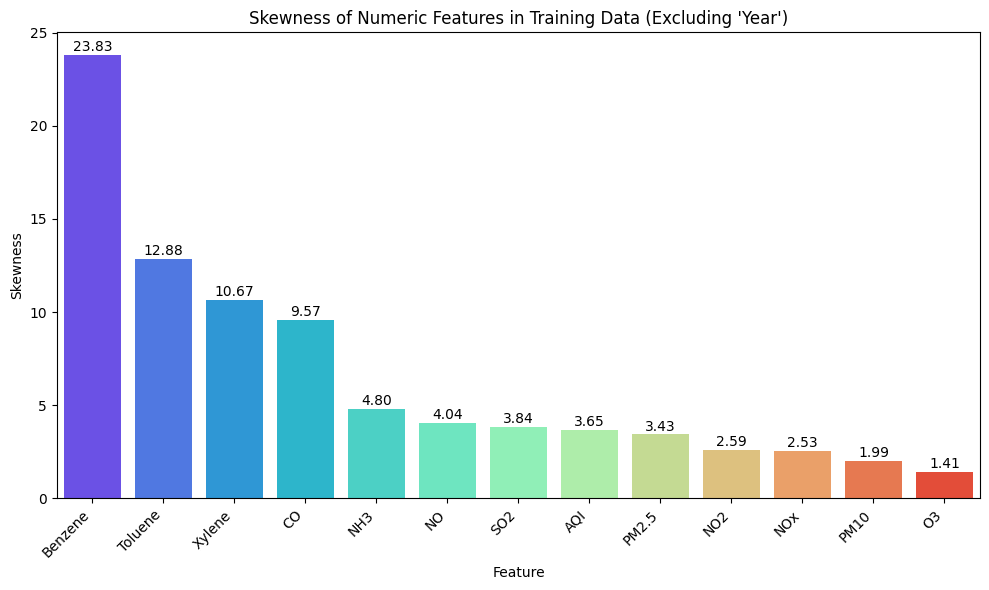

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Identify numeric columns in the training set
numeric_cols = X_train.select_dtypes(include=[np.number]).columns.tolist()
if 'Year' in numeric_cols:
    numeric_cols.remove('Year')

# Calculate skewness for these columns and sort in descending order
skew_values = X_train[numeric_cols].skew().sort_values(ascending=False)

# Convert skew_values to a DataFrame for proper labeling
skew_df = skew_values.reset_index()
skew_df.columns = ['Feature', 'Skewness']

plt.figure(figsize=(10, 6))
sns.barplot(data=skew_df, x='Feature', y='Skewness', hue='Feature', dodge=False, palette="rainbow", legend=False)
plt.xticks(rotation=45, ha="right")
plt.ylabel("Skewness")
plt.title("Skewness of Numeric Features in Training Data (Excluding 'Year')")

# Annotate each bar with the skewness value
for i, row in skew_df.iterrows():
    plt.text(i, row['Skewness'] + 0.05, f"{row['Skewness']:.2f}", ha="center", va="bottom")

plt.tight_layout()
plt.show()



This visualization highlights how skewed each numeric feature is within the training set (excluding the ‘Year’ column). Features with higher skewness—like Benzene, Toluene, and Xylene—have distributions heavily skewed to one side, suggesting they may benefit from transformations (e.g., log or power transforms) before modeling. Addressing skewness often improves model accuracy and stability, as many algorithms assume features are relatively symmetrically distributed.

#### Analysis of Test dataset

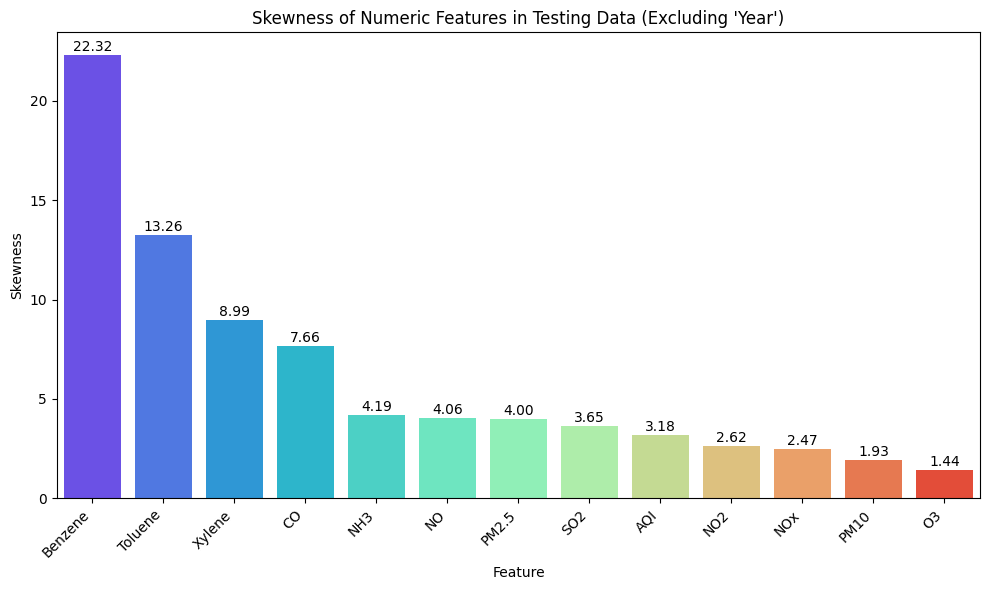

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Identify numeric columns in the test set
numeric_cols_test = X_test.select_dtypes(include=[np.number]).columns.tolist()
if 'Year' in numeric_cols_test:
    numeric_cols_test.remove('Year')

# Calculate skewness for these columns and sort in descending order
skew_values_test = X_test[numeric_cols_test].skew().sort_values(ascending=False)

# Convert skew_values to a DataFrame for proper labeling
skew_df_test = skew_values_test.reset_index()
skew_df_test.columns = ['Feature', 'Skewness']

plt.figure(figsize=(10, 6))
sns.barplot(data=skew_df_test, x='Feature', y='Skewness', hue='Feature', dodge=False, palette="rainbow", legend=False)
plt.xticks(rotation=45, ha="right")
plt.ylabel("Skewness")
plt.title("Skewness of Numeric Features in Testing Data (Excluding 'Year')")

# Annotate each bar with the skewness value
for i, row in skew_df_test.iterrows():
    plt.text(i, row['Skewness'] + 0.05, f"{row['Skewness']:.2f}", ha="center", va="bottom")

plt.tight_layout()
plt.show()


This bar chart illustrates how skewed each numeric feature is within the testing set (excluding ‘Year’). Notably, features like Benzene, Toluene, and Xylene show high skewness, suggesting that their distributions are heavily unbalanced. Transforming these features (e.g., using log or power transforms) may improve model stability and performance by making their distributions more symmetric. Additionally, comparing skewness patterns in the training versus testing sets helps ensure that any transformations applied are consistent and beneficial for the model’s generalization.

#### Visualizing Distributions Before Trasnformation (Histograms and Q-Q Plots)

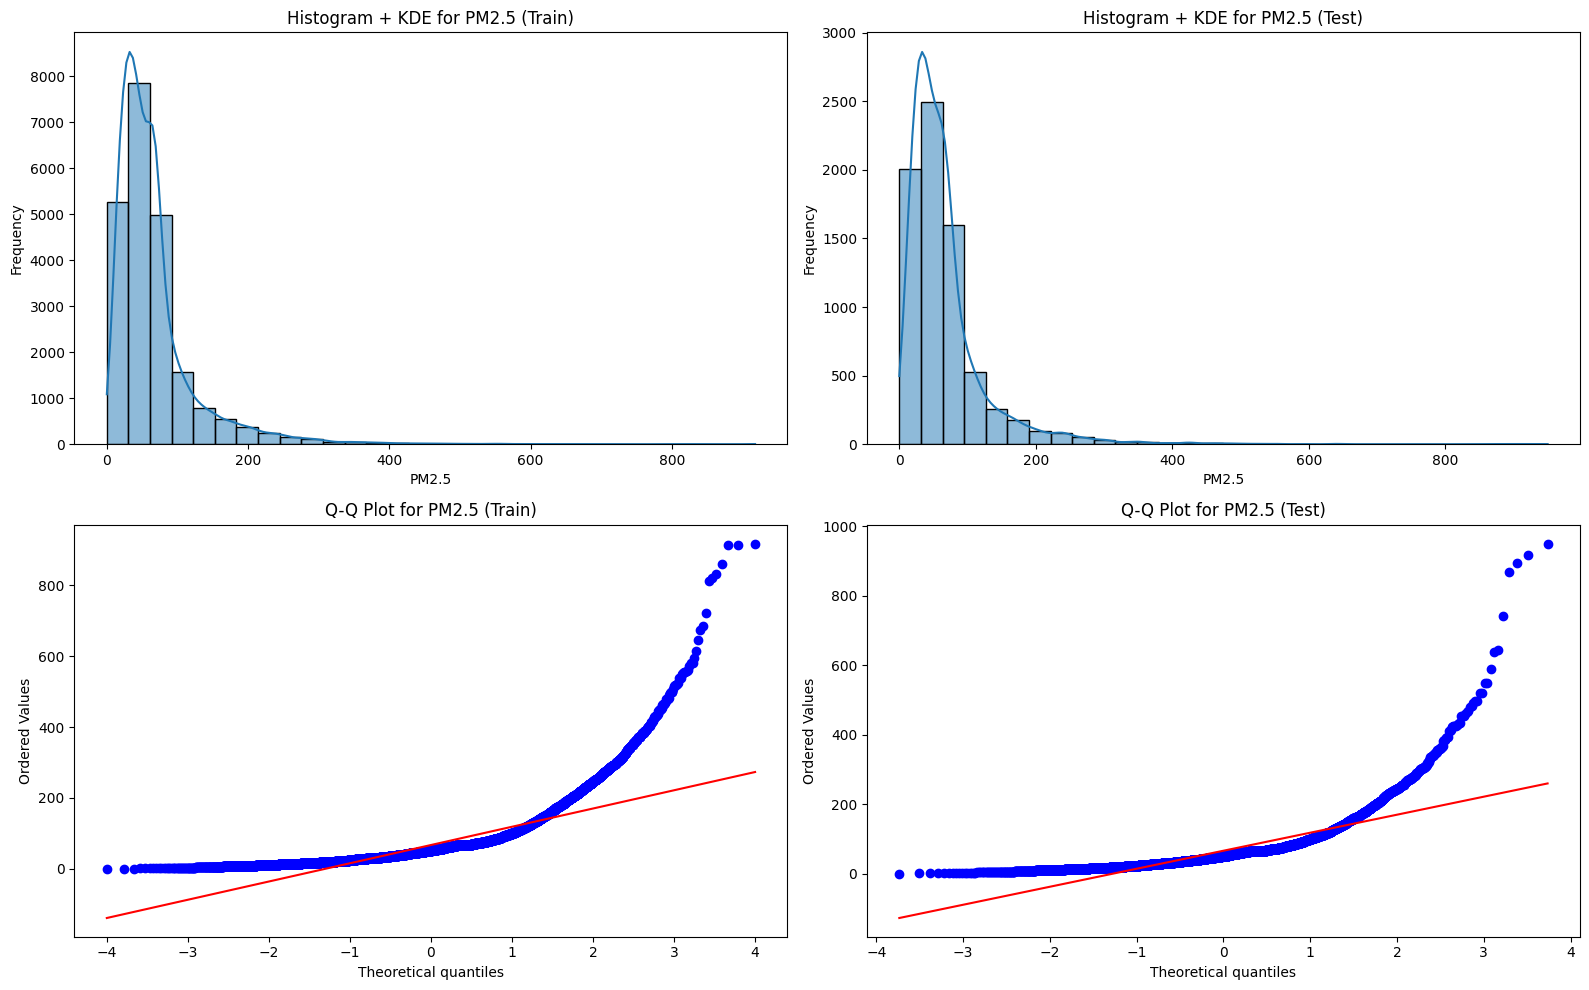

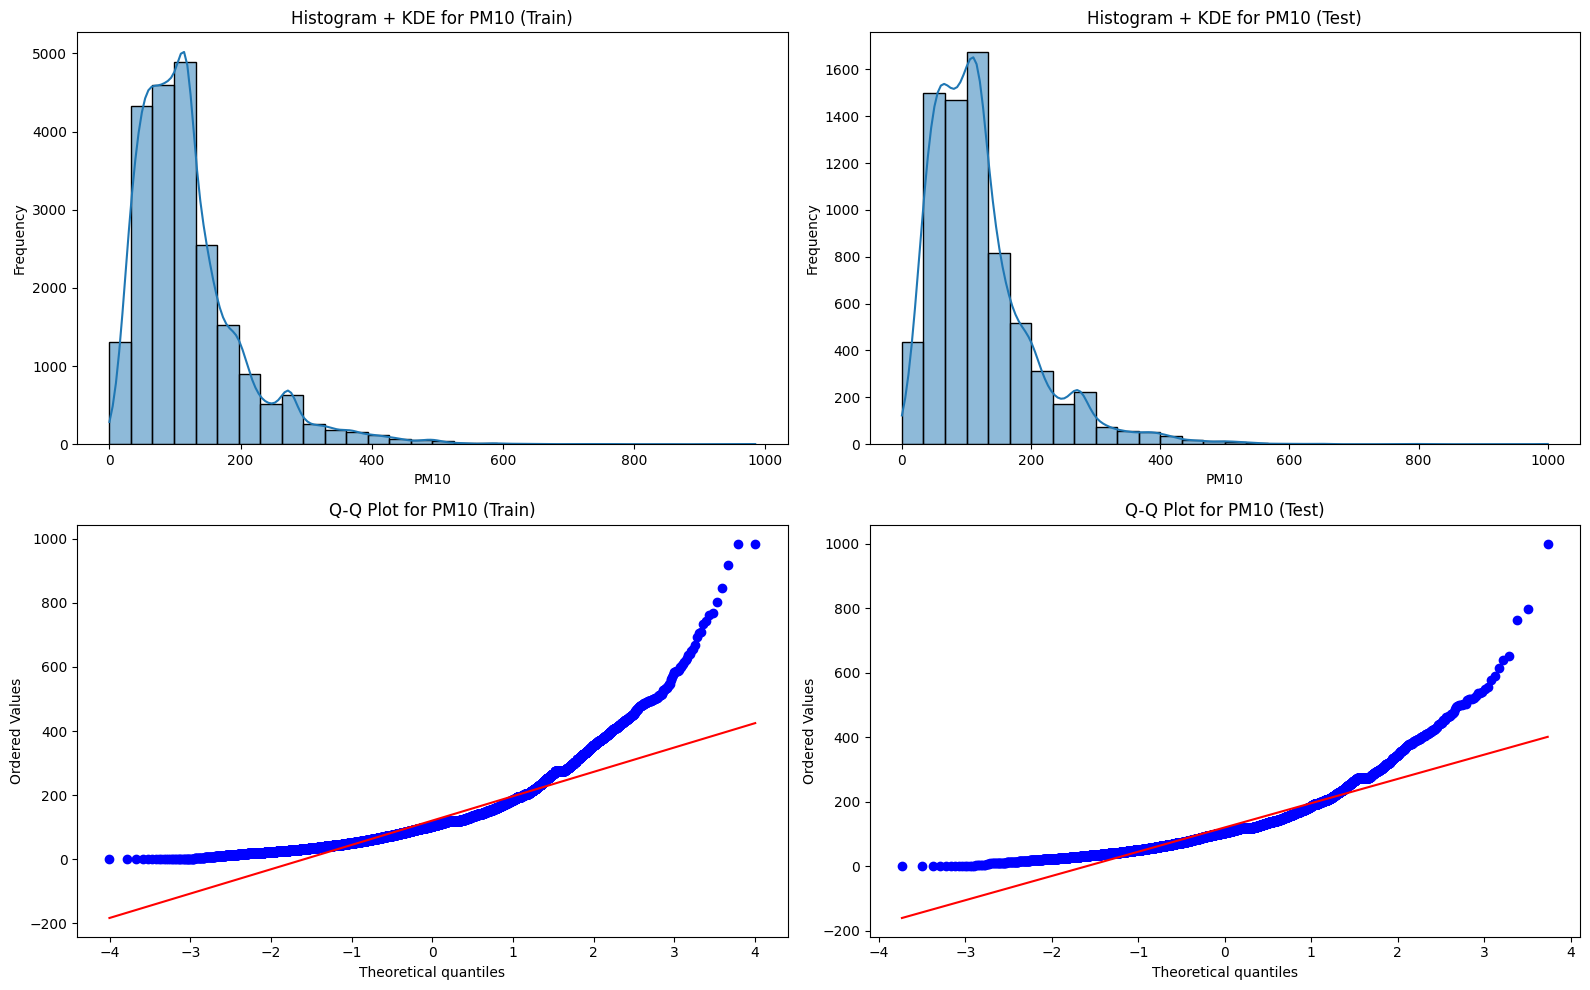

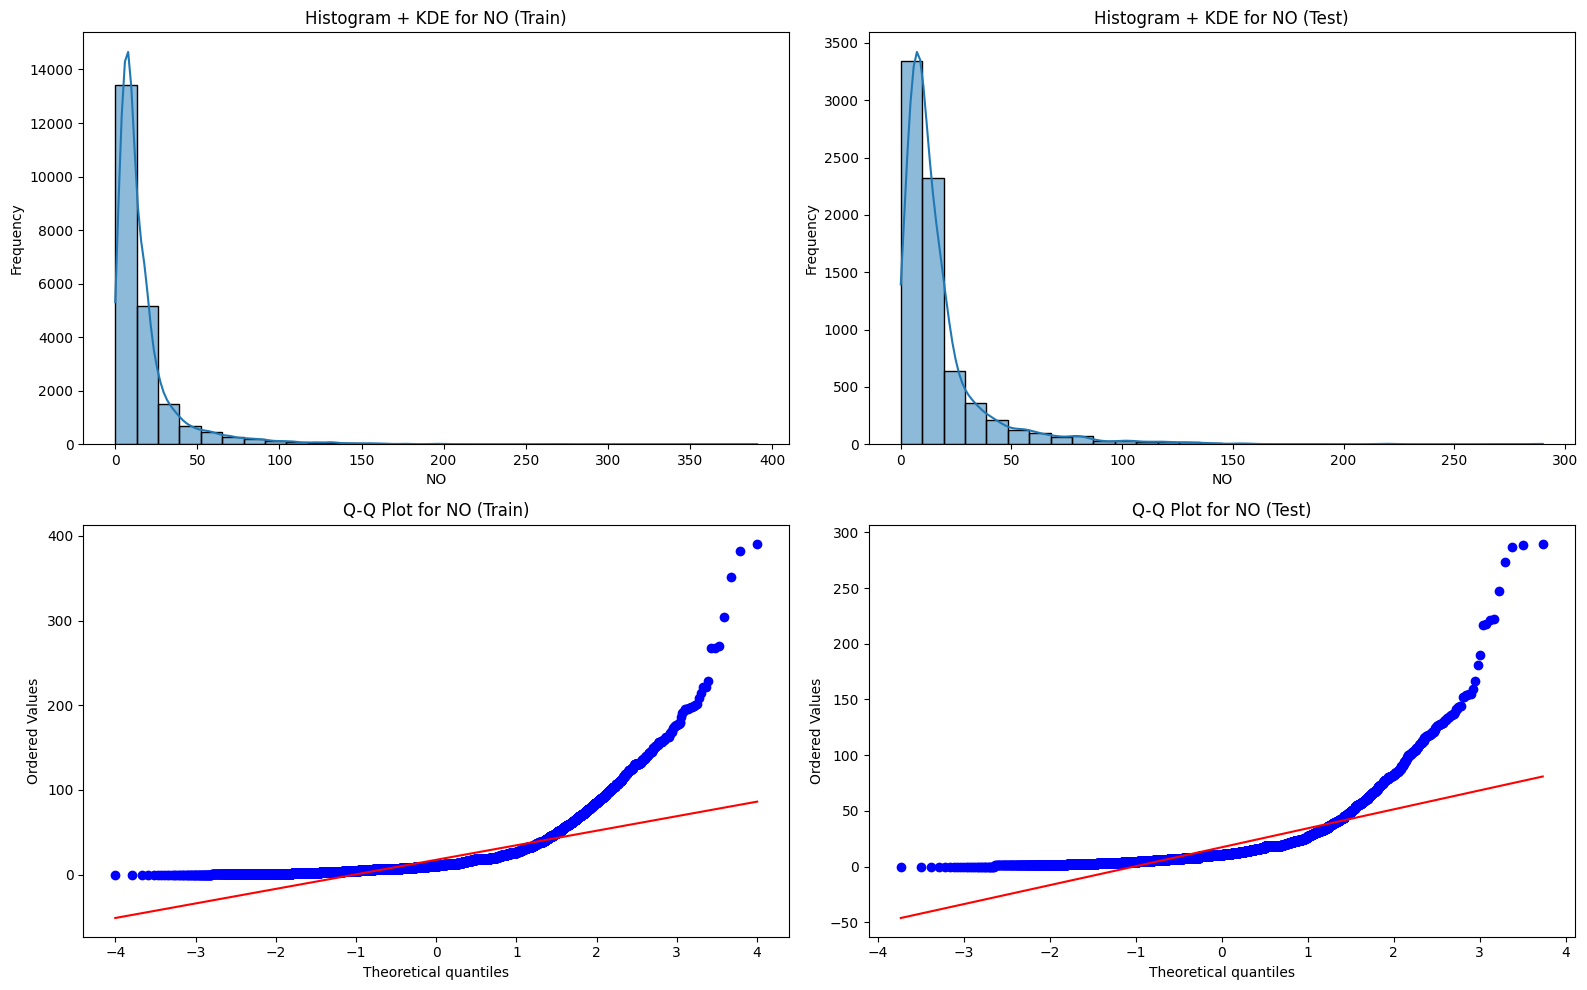

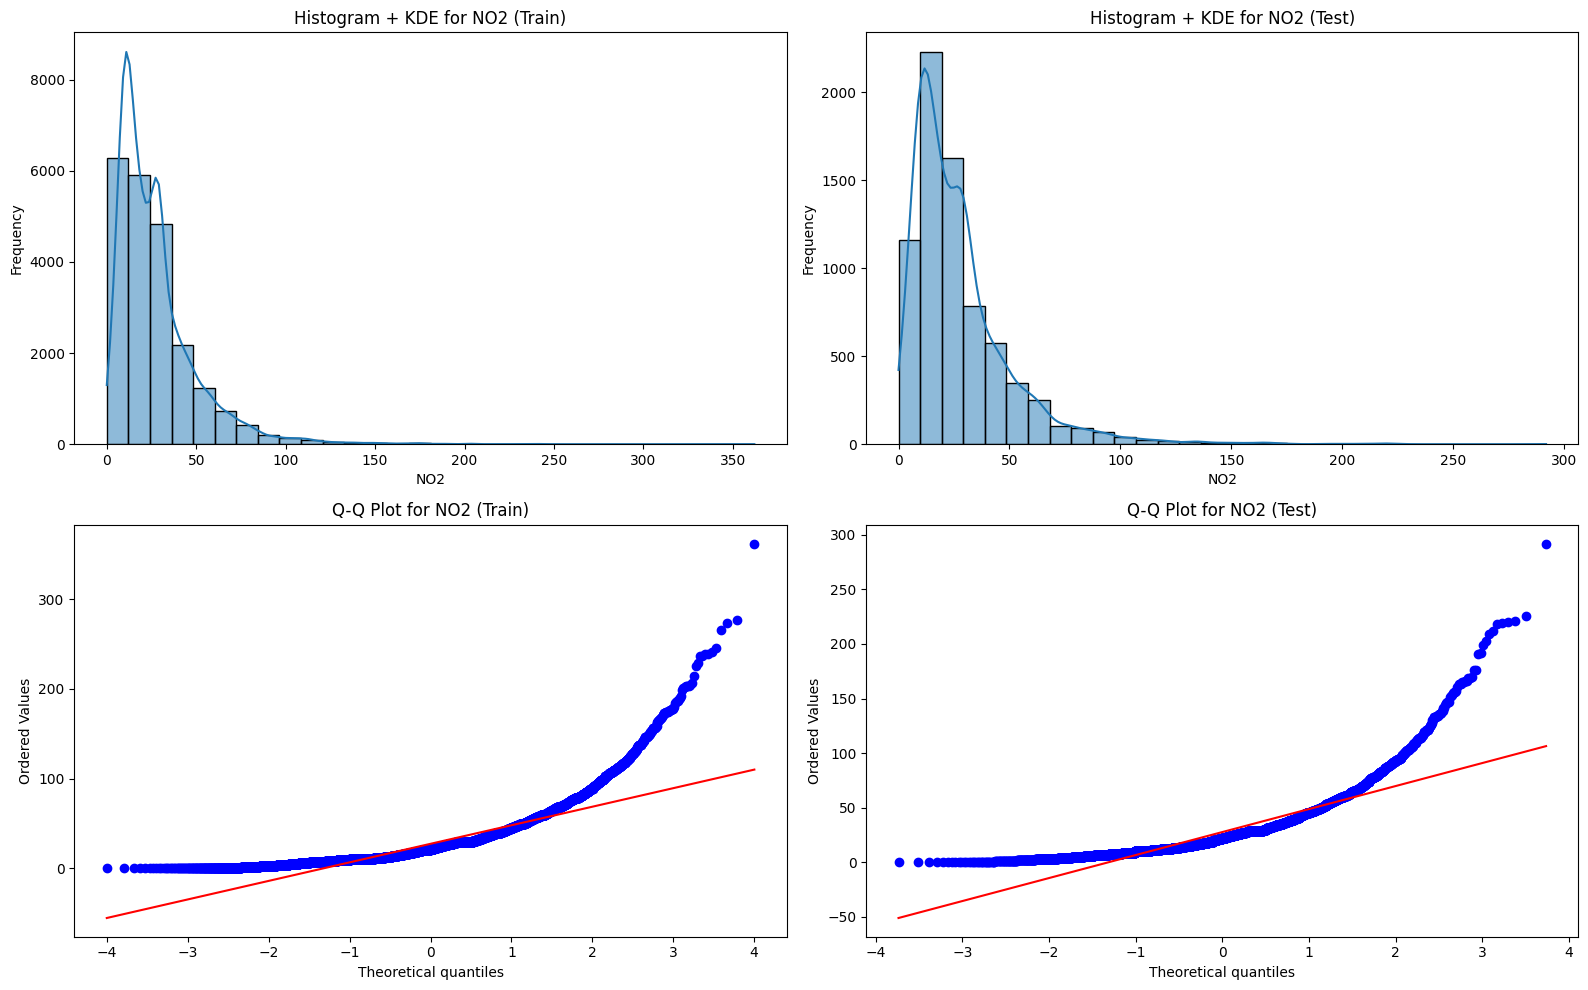

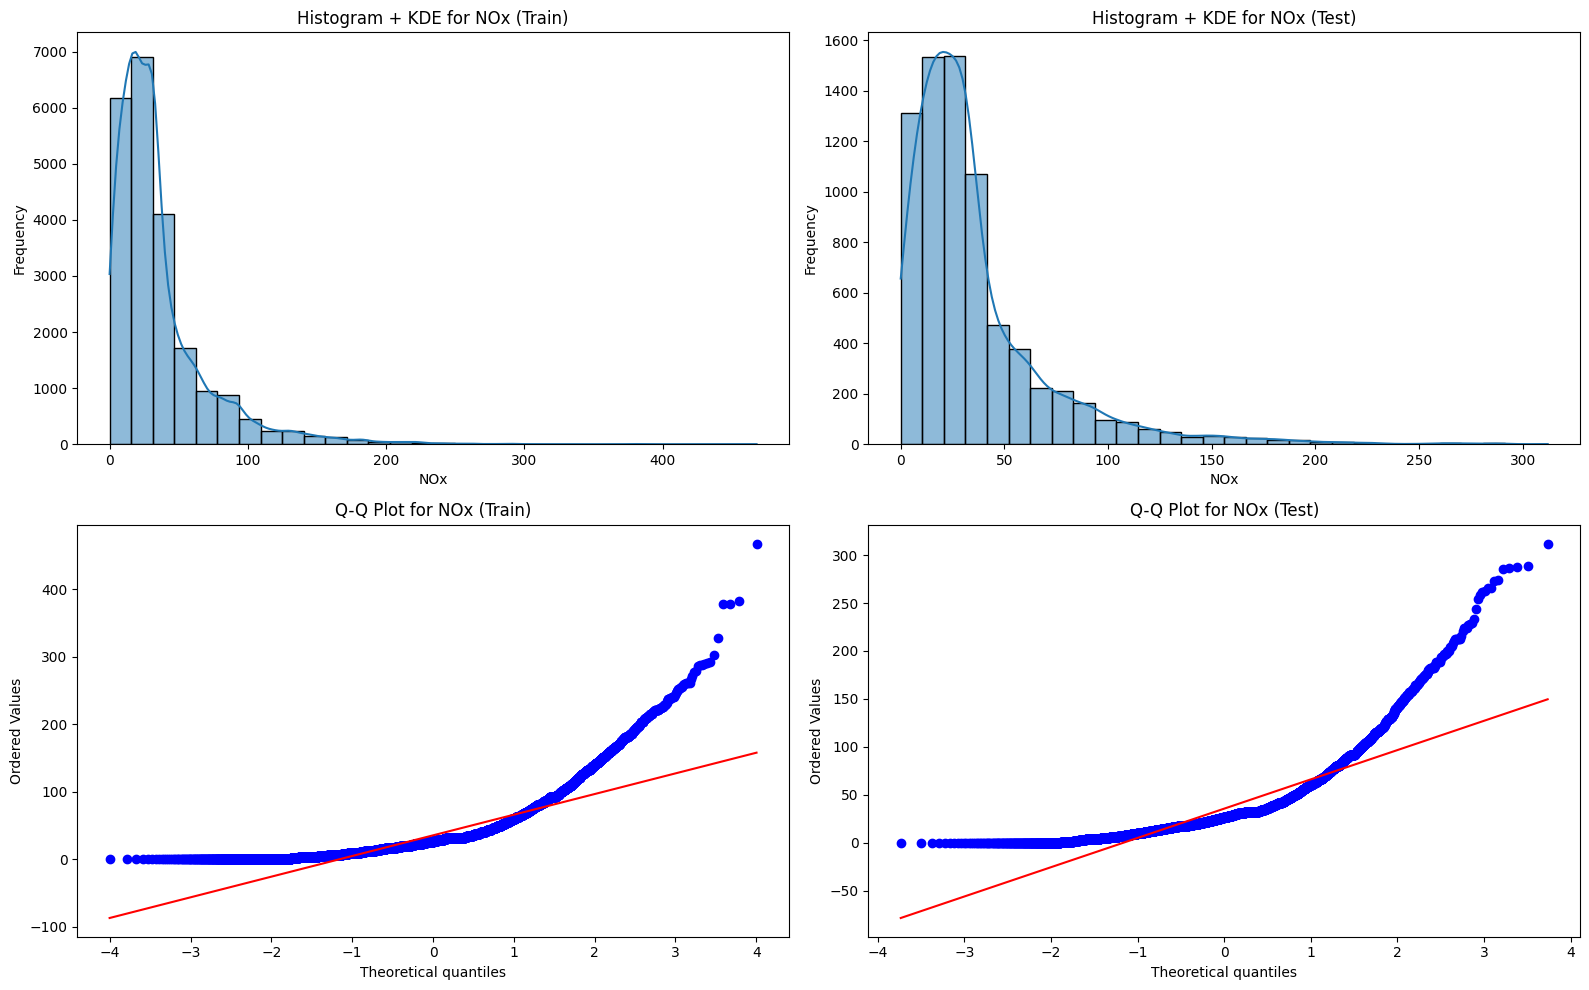

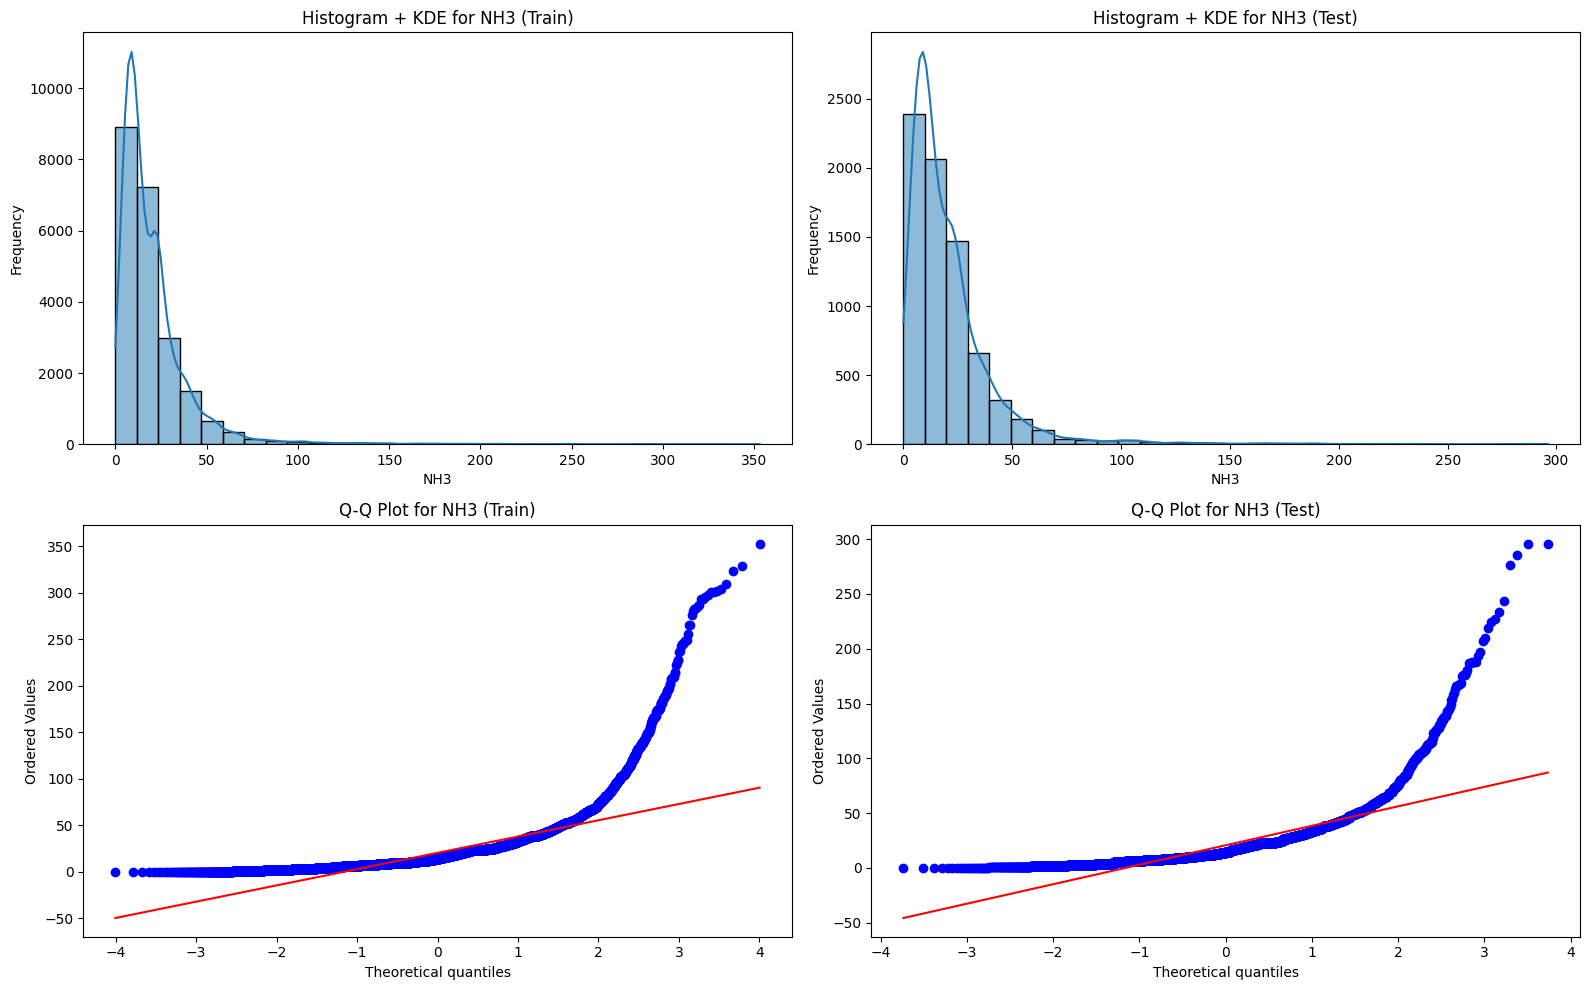

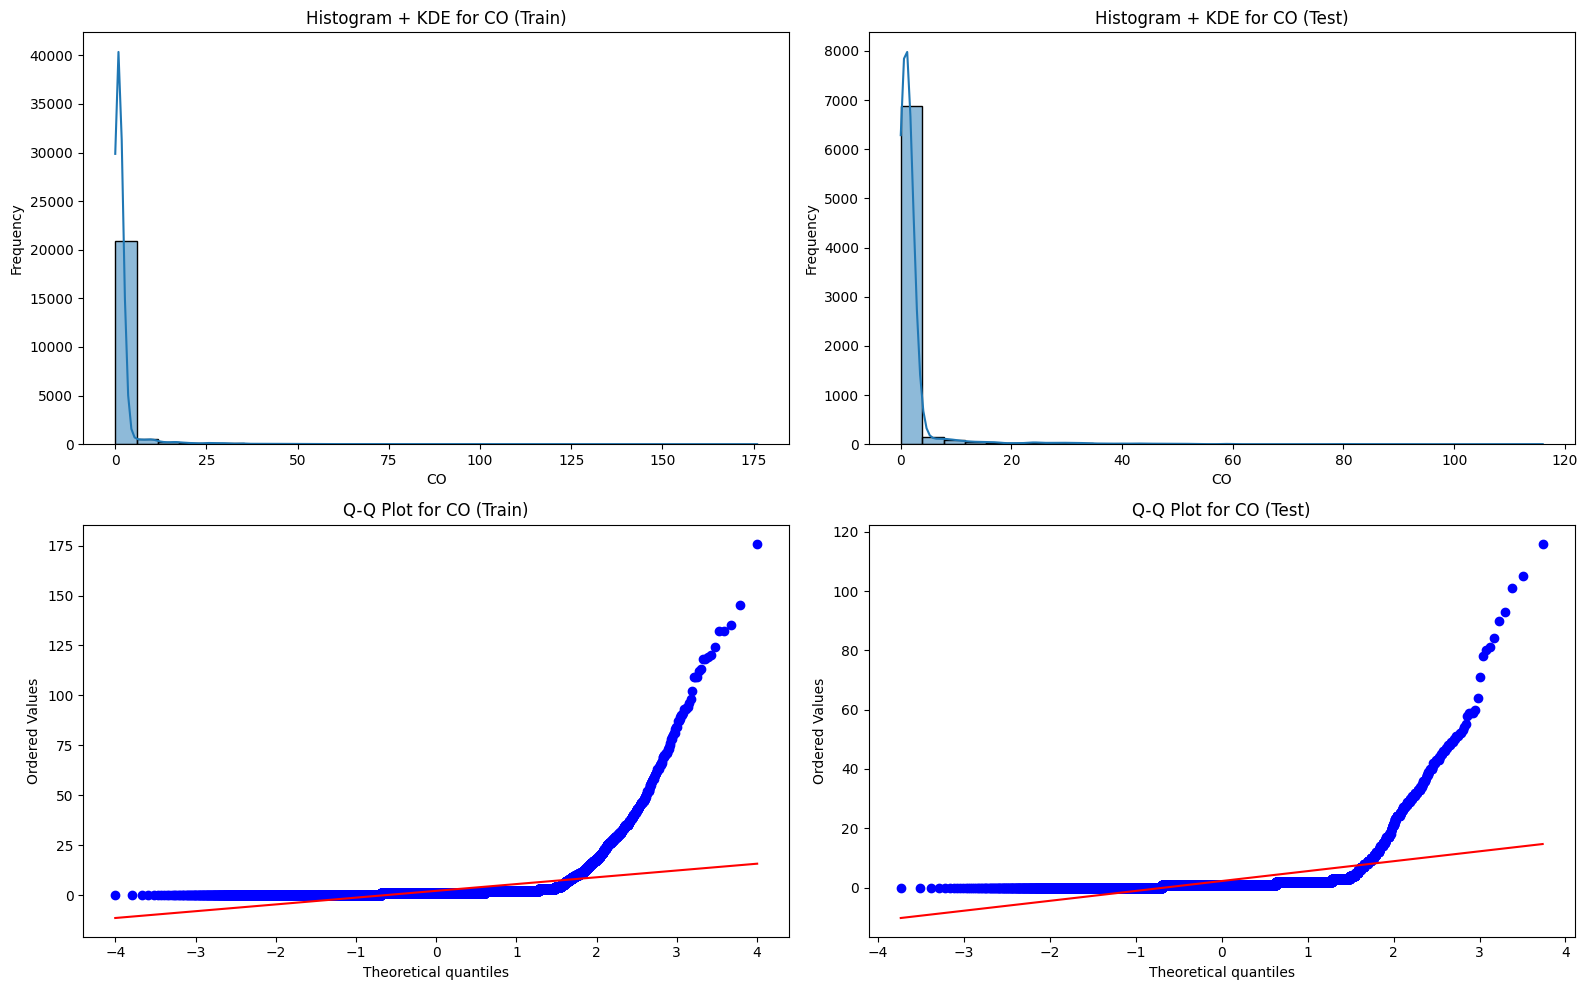

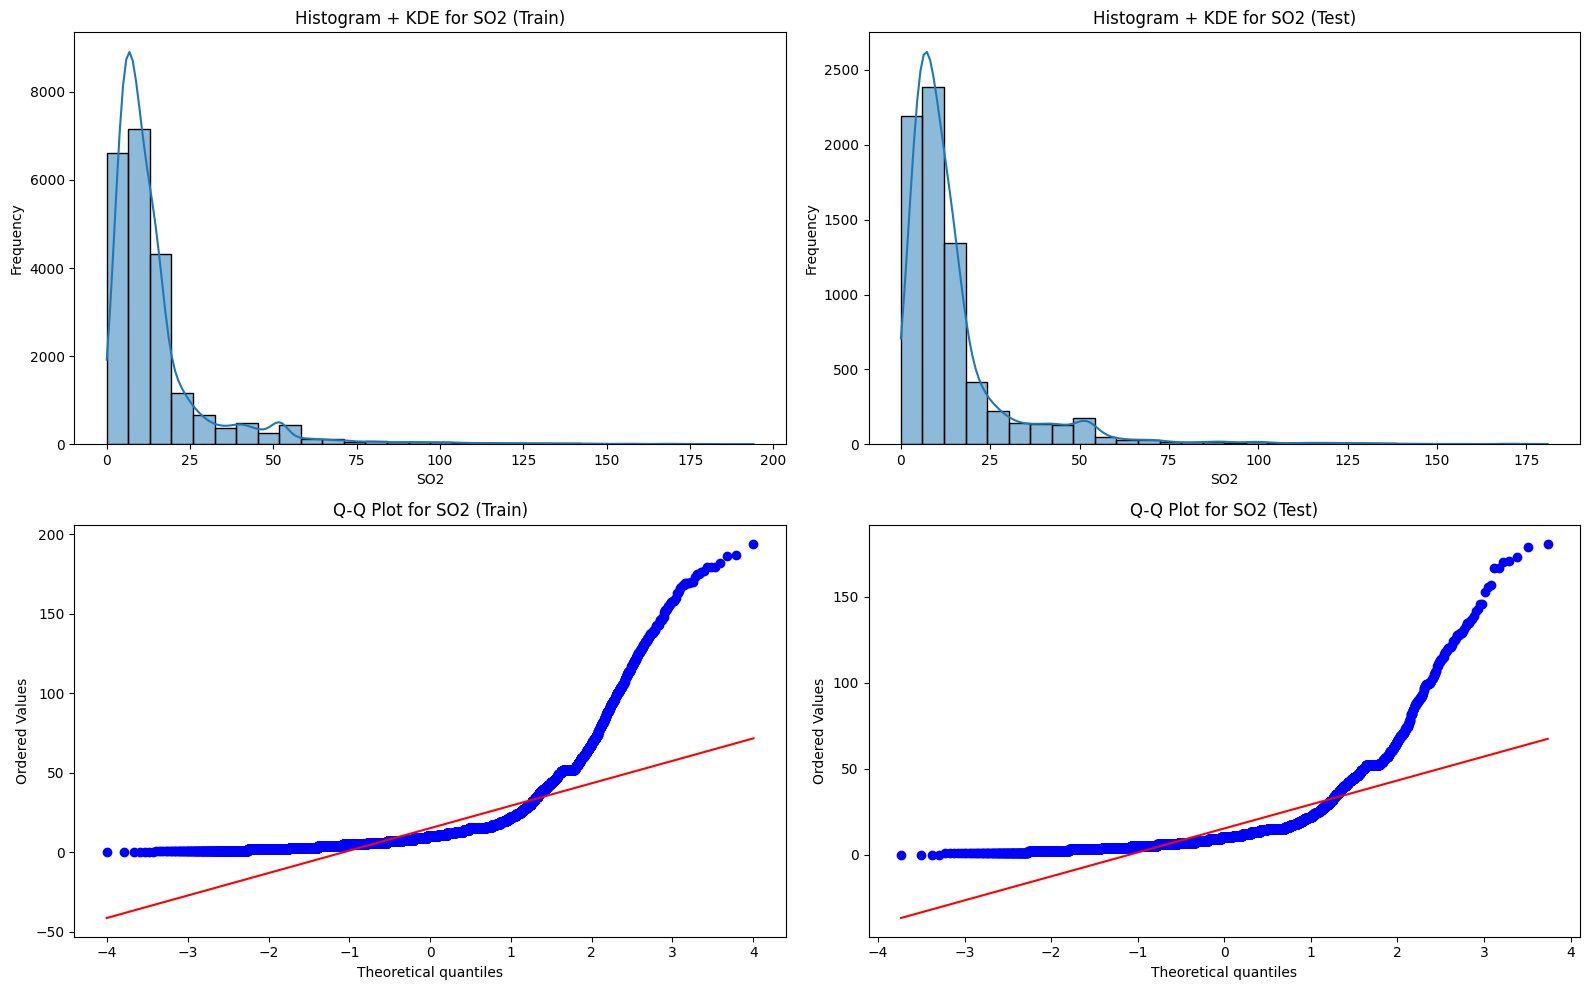

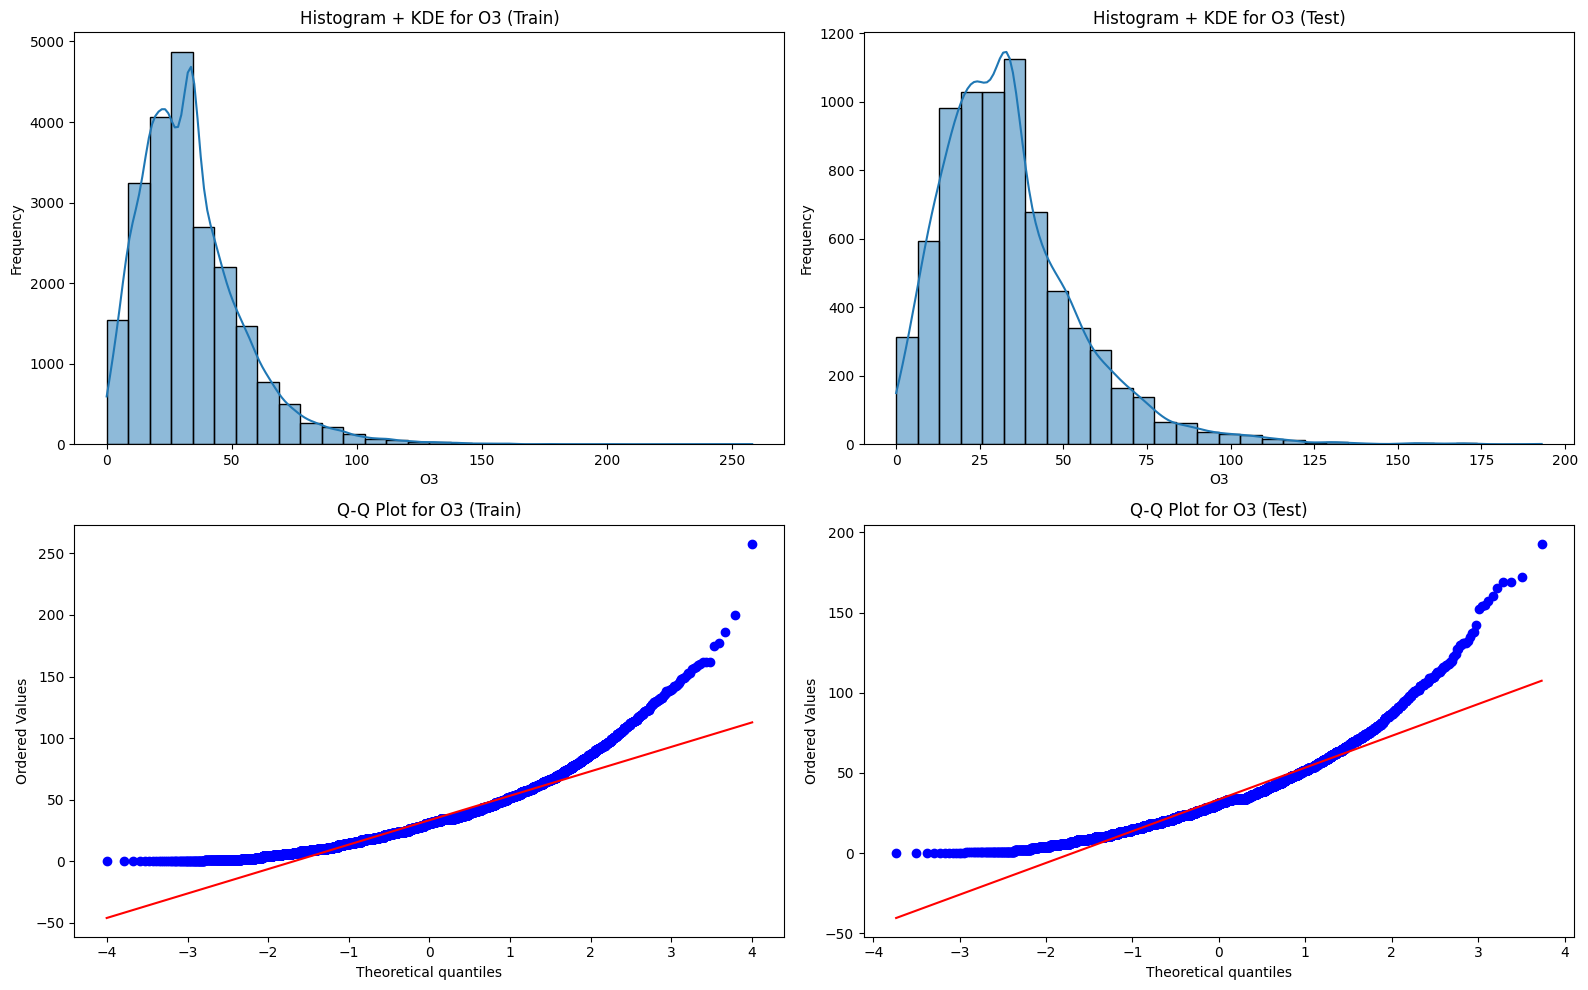

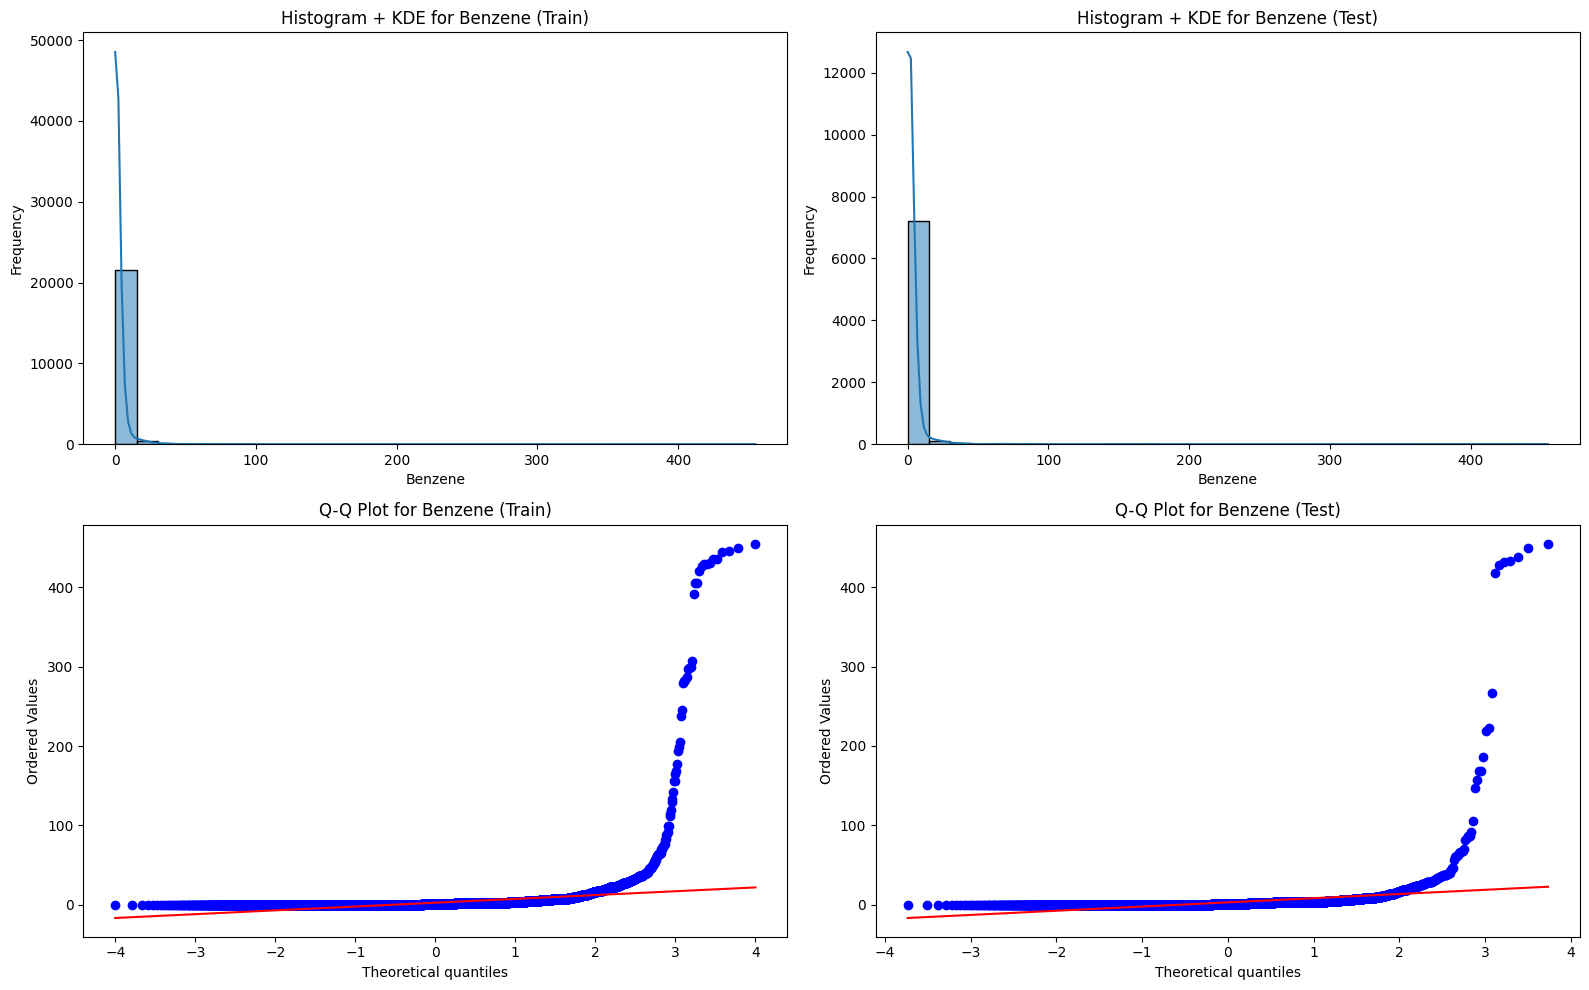

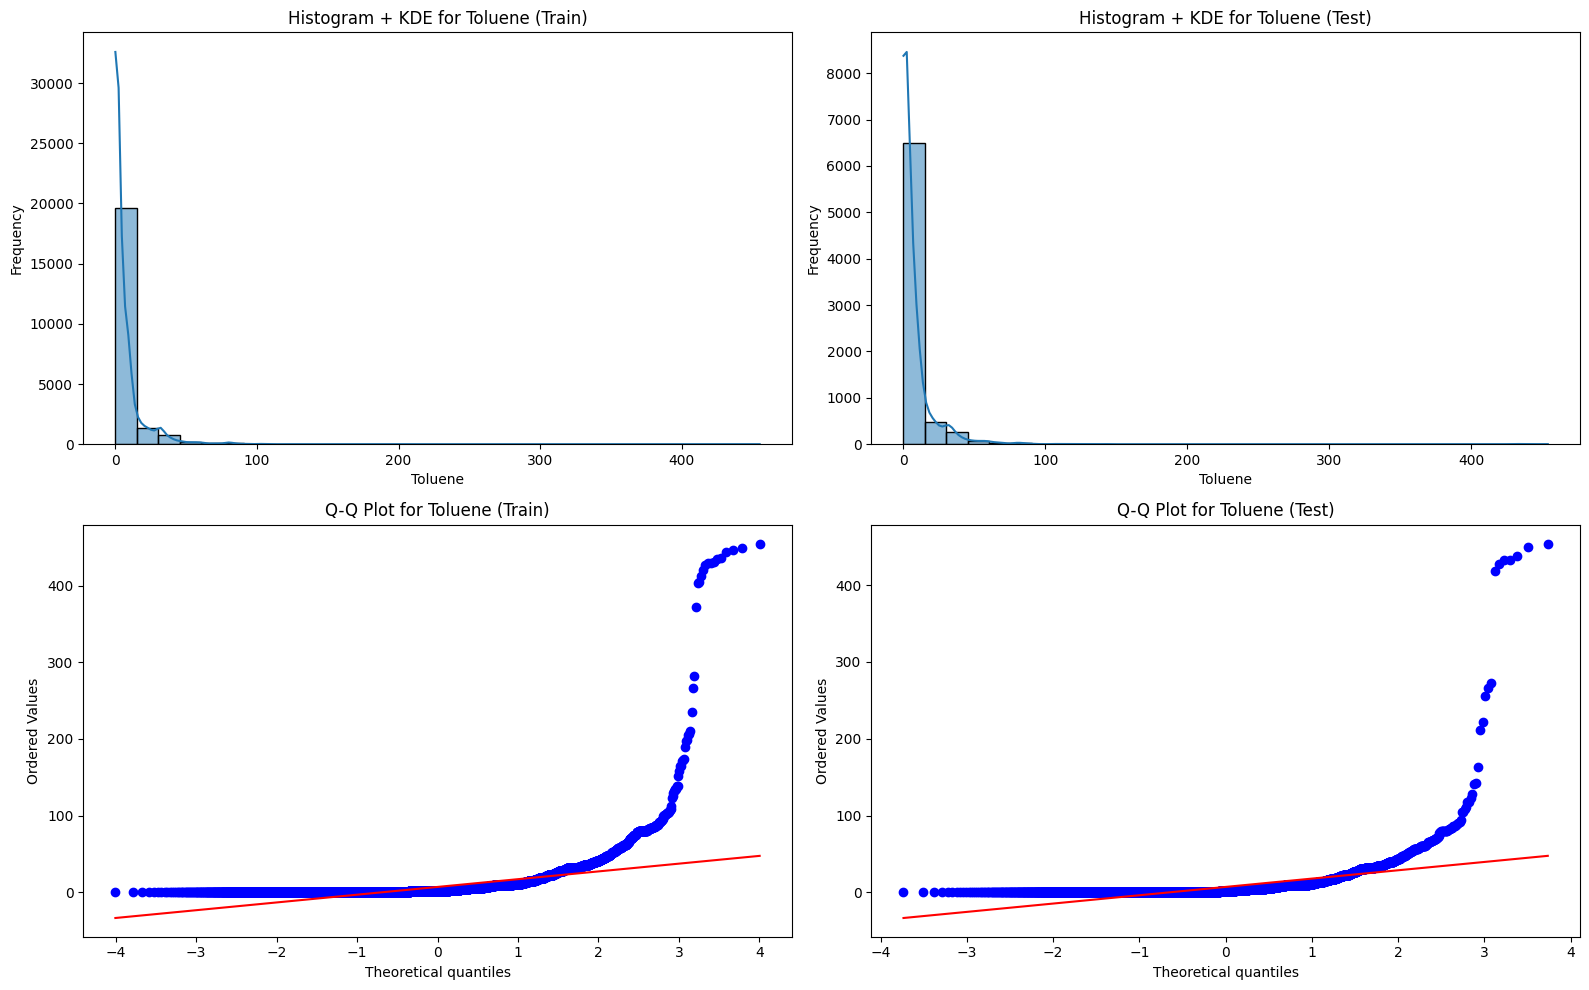

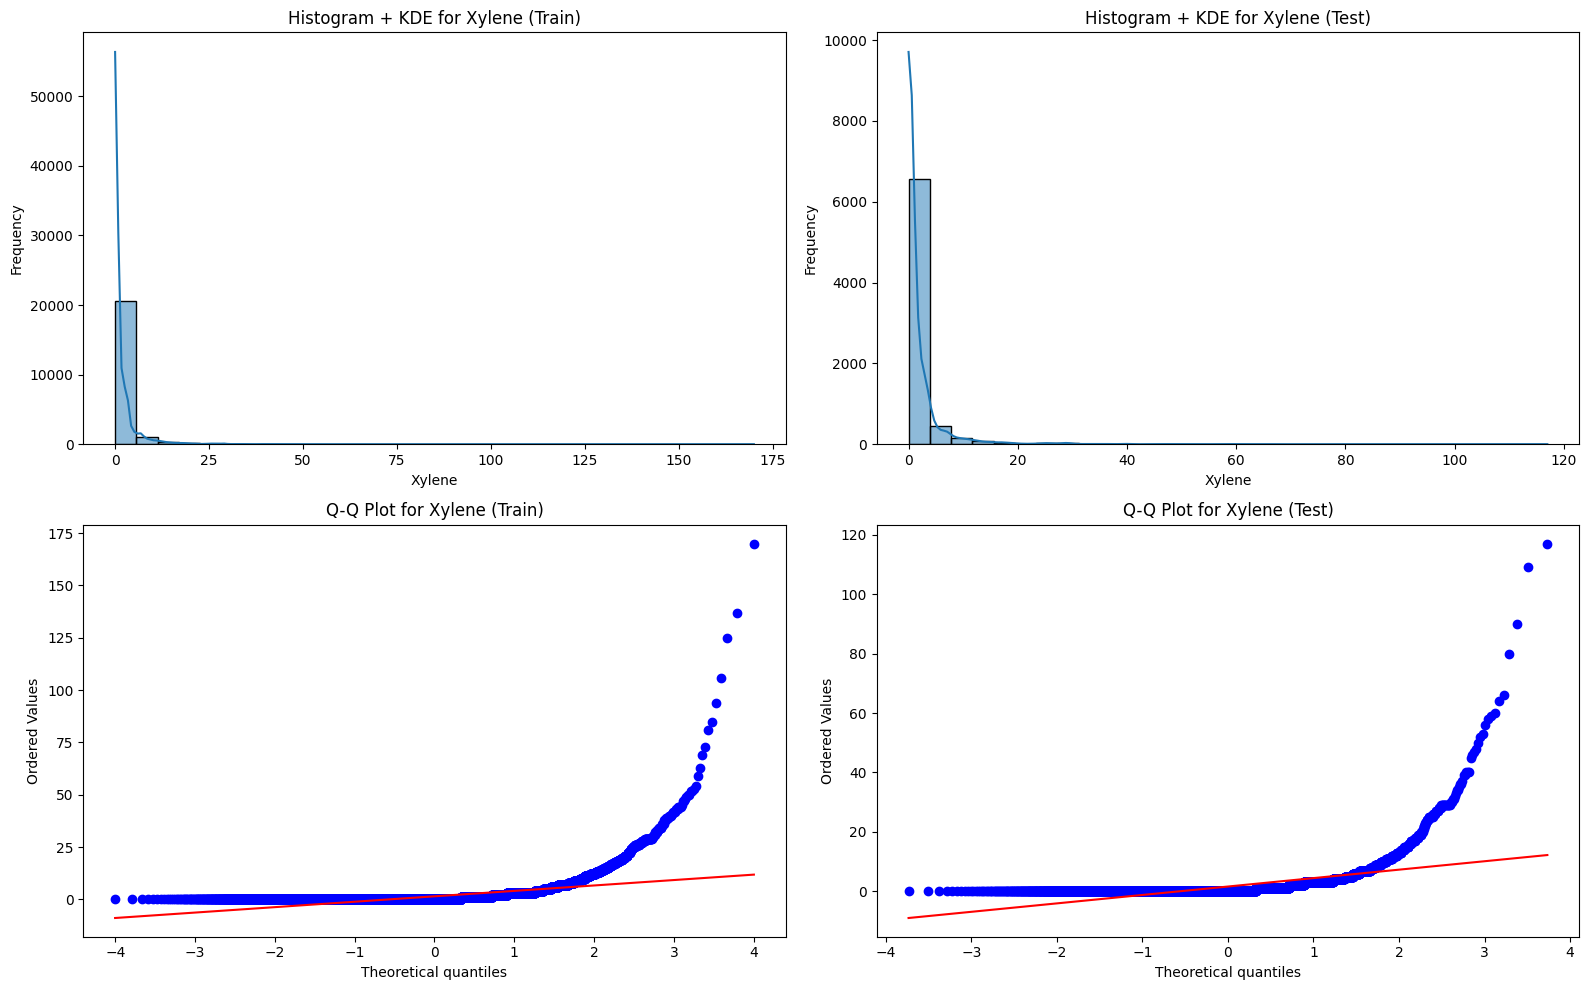

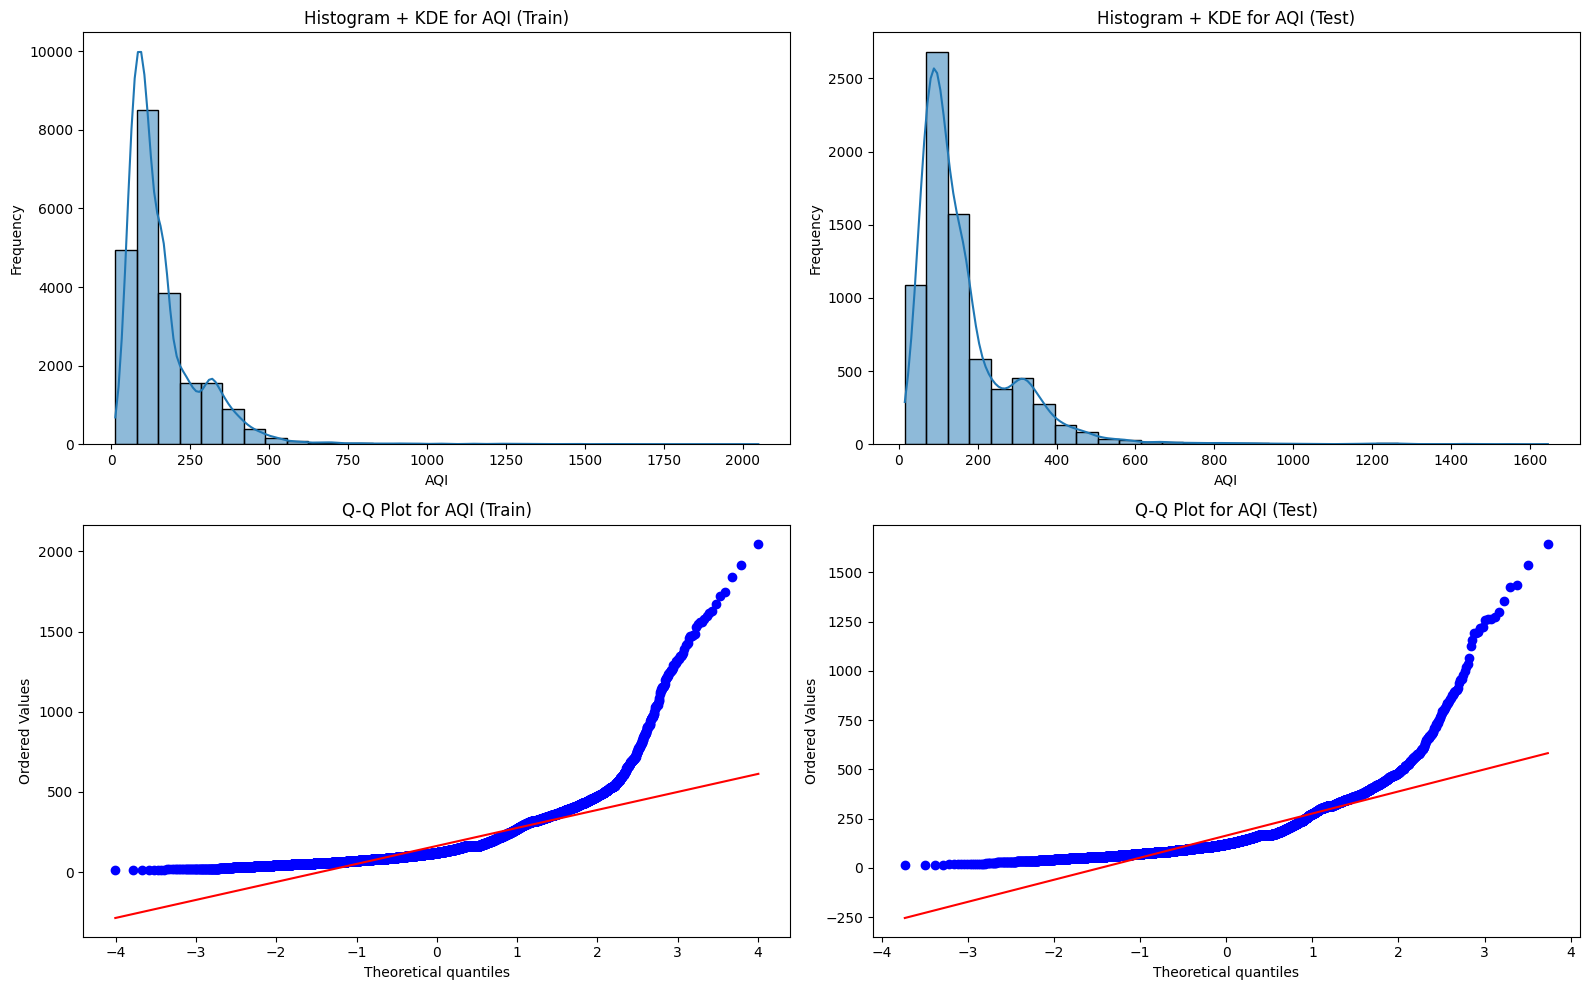

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats

# Identify numeric columns common to training set, excluding 'Year'
numeric_cols = X_train.select_dtypes(include=[np.number]).columns.tolist()
if 'Year' in numeric_cols:
    numeric_cols.remove('Year')

for col in numeric_cols:
    plt.figure(figsize=(16, 10))
    
    # Top left: Histogram + KDE for training set
    plt.subplot(2, 2, 1)
    sns.histplot(X_train[col], kde=True, bins=30)
    plt.title(f"Histogram + KDE for {col} (Train)")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    
    # Top right: Histogram + KDE for test set
    plt.subplot(2, 2, 2)
    sns.histplot(X_test[col], kde=True, bins=30)
    plt.title(f"Histogram + KDE for {col} (Test)")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    
    # Bottom left: Q-Q Plot for training set
    plt.subplot(2, 2, 3)
    stats.probplot(X_train[col].dropna(), dist="norm", plot=plt)
    plt.title(f"Q-Q Plot for {col} (Train)")
    
    # Bottom right: Q-Q Plot for test set
    plt.subplot(2, 2, 4)
    stats.probplot(X_test[col].dropna(), dist="norm", plot=plt)
    plt.title(f"Q-Q Plot for {col} (Test)")
    
    plt.tight_layout()
    plt.show()


**Distribution Insights for Toluene, Xylene, and AQI**

1. **Histograms and KDE Plots**  
   - **Toluene & Xylene:** Both display heavily right-skewed distributions, with the bulk of observations near lower concentrations and a small subset extending into much higher values. This skewness suggests the presence of outliers or sporadic emission spikes.  
   - **AQI:** The AQI distribution also shows a pronounced tail, indicating that while many data points fall in lower AQI ranges, there are significant instances of high pollution levels.

2. **Q-Q Plots**  
   - In all three features, the data points deviate markedly from the diagonal reference line, underscoring their non-normal nature.  
   - The tails rise sharply, confirming the presence of high-concentration outliers in Toluene and Xylene, as well as very high AQI readings in certain instances.

3. **Comparative View (Train vs. Test)**  
   - Both the training and testing sets exhibit similar skewness and tail behavior, suggesting the split preserves the general distribution of these features. This consistency is important for model validation, as it ensures that outlier patterns are not confined to one subset.

4. **Implications for Modeling**  
   - The right-skewed distributions and extreme outliers may benefit from transformations (e.g., log or power transforms) to stabilize variance and reduce the influence of extreme values.  
   - Identifying and understanding these spikes can help pinpoint emission events, industrial releases, or meteorological conditions driving high pollutant levels, ultimately aiding targeted intervention strategies.

In essence, Toluene, Xylene, and AQI exhibit heavy tails and non-normal distributions, highlighting the need for careful preprocessing and consideration of outliers to improve the robustness and interpretability of any predictive modeling efforts.

In [33]:
import pandas as pd
import numpy as np
import scipy.stats as stats

# Identify numeric columns (excluding 'Year')
numeric_cols = X_train.select_dtypes(include=[np.number]).columns.tolist()
if 'Year' in numeric_cols:
    numeric_cols.remove('Year')

# For the Training Set:
train_summary = X_train[numeric_cols].describe().T
train_summary['skew'] = X_train[numeric_cols].skew()
train_summary['kurtosis'] = X_train[numeric_cols].kurtosis()

print("Training Set Summary Statistics:")
print(train_summary)

# For the Test Set:
test_summary = X_test[numeric_cols].describe().T
test_summary['skew'] = X_test[numeric_cols].skew()
test_summary['kurtosis'] = X_test[numeric_cols].kurtosis()

print("\nTest Set Summary Statistics:")
print(test_summary)


Training Set Summary Statistics:
           count        mean         std   min   25%    50%    75%     max  \
PM2.5    22148.0   66.862967   61.211666   0.0  31.0   52.0   76.0   918.0   
PM10     22148.0  120.752754   82.470522   0.0  65.0  104.0  148.0   985.0   
NO       22148.0   17.402790   21.888999   0.0   6.0   10.0   19.0   391.0   
NO2      22148.0   27.464647   23.192969   0.0  12.0   22.0   35.0   362.0   
NOx      22148.0   35.504018   34.976352   0.0  14.0   27.0   43.0   468.0   
NH3      22148.0   20.404461   21.909122   0.0   8.0   14.0   25.0   353.0   
CO       22148.0    2.197896    6.846027   0.0   1.0    1.0    2.0   176.0   
SO2      22148.0   15.189227   18.208557   0.0   6.0   10.0   15.0   194.0   
O3       22148.0   33.389877   20.730621   0.0  19.0   31.0   43.0   258.0   
Benzene  22148.0    2.784315   13.783975   0.0   0.0    1.0    3.0   455.0   
Toluene  22148.0    6.777090   16.875305   0.0   0.0    2.0    8.0   455.0   
Xylene   22148.0    1.517383   

**Statistical Summary of Training and Testing Sets**

This output provides descriptive statistics (count, mean, standard deviation, minimum, quartiles, maximum, skew, and kurtosis) for each numeric feature in the training and testing sets. Key observations include:

- **Consistency Across Splits:**  
  The training and testing sets show similar ranges and central tendencies for most pollutants, suggesting that the data split preserves overall distributional properties.

- **High Skew and Kurtosis:**  
  Certain features (e.g., Benzene, Toluene, Xylene, CO) exhibit very large skew and kurtosis values, indicating heavily skewed distributions with extreme outliers or long tails. These features may require transformations (e.g., log or power transforms) to stabilize variance and improve modeling performance.

- **AQI Distribution:**  
  The AQI has a wide range (up to 2049 in the training set and 1646 in the testing set), with a positive skew suggesting the presence of higher-than-average pollution episodes.

Overall, these summary statistics help diagnose the data’s distribution and variability, guiding preprocessing decisions—such as outlier handling or feature transformation—to enhance model robustness.

#### Applying Log Transformation to Skewed Features for the train and test dataset

In [34]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np

# Recalculate numeric columns (excluding 'Year')
numeric_cols = X_train.select_dtypes(include=[np.number]).columns.tolist()
if 'Year' in numeric_cols:
    numeric_cols.remove('Year')

# Compute skewness and select columns with skewness > 1 for log transformation
skew_values = X_train[numeric_cols].skew()
cols_to_log = skew_values[skew_values > 1].index.tolist()
print("Columns to log-transform:", cols_to_log)

# Define a function to clip negatives to 0 and apply log1p
def log_transform(x):
    return np.log1p(x.clip(lower=0))

log_transformer = FunctionTransformer(log_transform, validate=False)

# Build a ColumnTransformer conditionally:
# - Apply log transformation to selected columns
# - Pass through other numeric columns unchanged
transformers = []
if cols_to_log:
    transformers.append(('log', log_transformer, cols_to_log))
pass_cols = [col for col in numeric_cols if col not in cols_to_log]
if pass_cols:
    transformers.append(('passthrough', 'passthrough', pass_cols))

preprocessor = ColumnTransformer(transformers=transformers)

# Build the pipeline with only the preprocessing step (no scaling)
pipeline = Pipeline(steps=[
    ('preprocess', preprocessor)
])

# Select numeric training and testing data
X_train_numeric = X_train[numeric_cols]
X_test_numeric = X_test[numeric_cols]

# Fit and transform the training data; transform the test data
X_train_processed = pipeline.fit_transform(X_train_numeric)
X_test_processed = pipeline.transform(X_test_numeric)

print("Shape of processed training data:", X_train_processed.shape)
print("Shape of processed training data:", X_test_processed)

Columns to log-transform: ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI']
Shape of processed training data: (22148, 13)
Shape of processed training data: [[3.61091791 4.33073334 2.7080502  ... 0.         0.         4.82831374]
 [4.88280192 5.29330482 4.18965474 ... 0.         0.         5.4161004 ]
 [3.25809654 4.55387689 2.89037176 ... 0.69314718 2.30258509 4.65396035]
 ...
 [2.56494936 3.21887582 1.79175947 ... 0.         0.         3.58351894]
 [5.12989871 5.54517744 3.93182563 ... 1.38629436 0.         5.7365723 ]
 [4.18965474 4.78749174 1.94591015 ... 1.94591015 0.         5.11198779]]


The log transformation is used to reduce skewness in pollutant and AQI data, stabilizing variance and bringing the distribution closer to normal. This is crucial because many models perform better with normally distributed inputs. By clipping negative values and using `np.log1p`, the transformation safely handles zeros. Integrating it into a pipeline ensures that only the skewed features are transformed consistently, improving model robustness and performance.

#### Visualizing Distributions After Trasnformation (Histograms and Q-Q Plots)

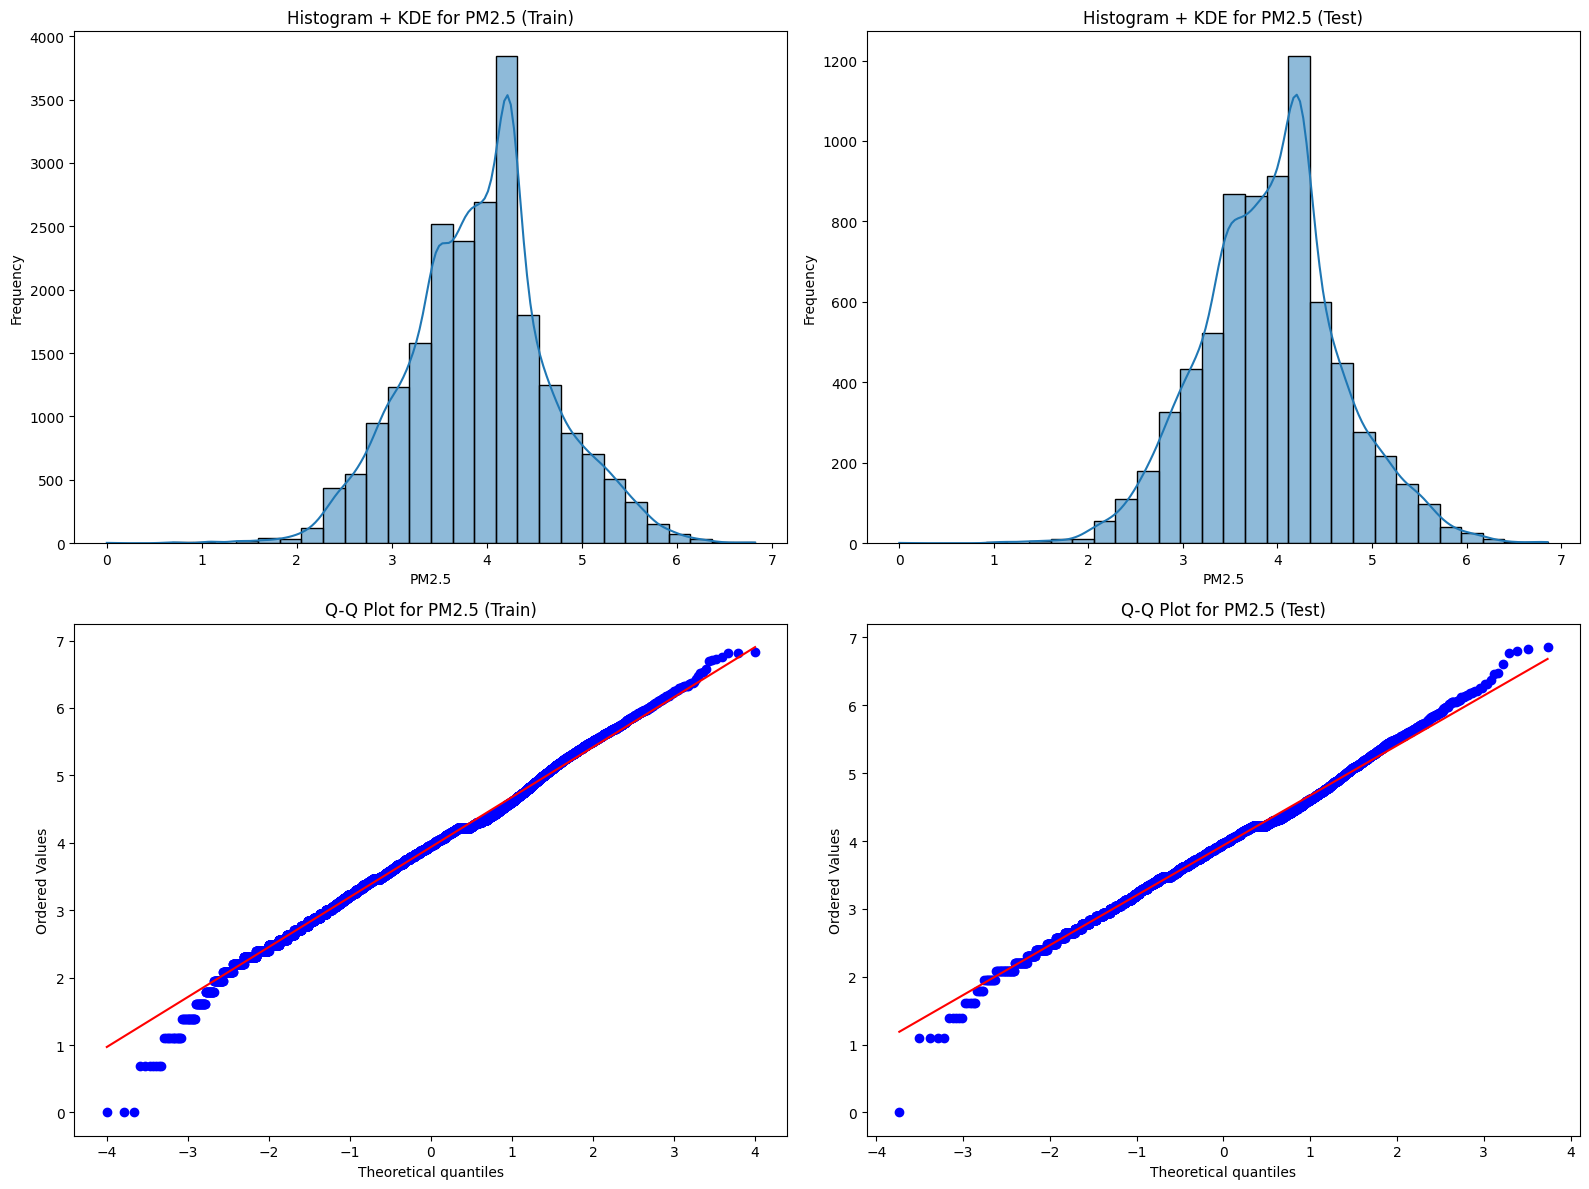

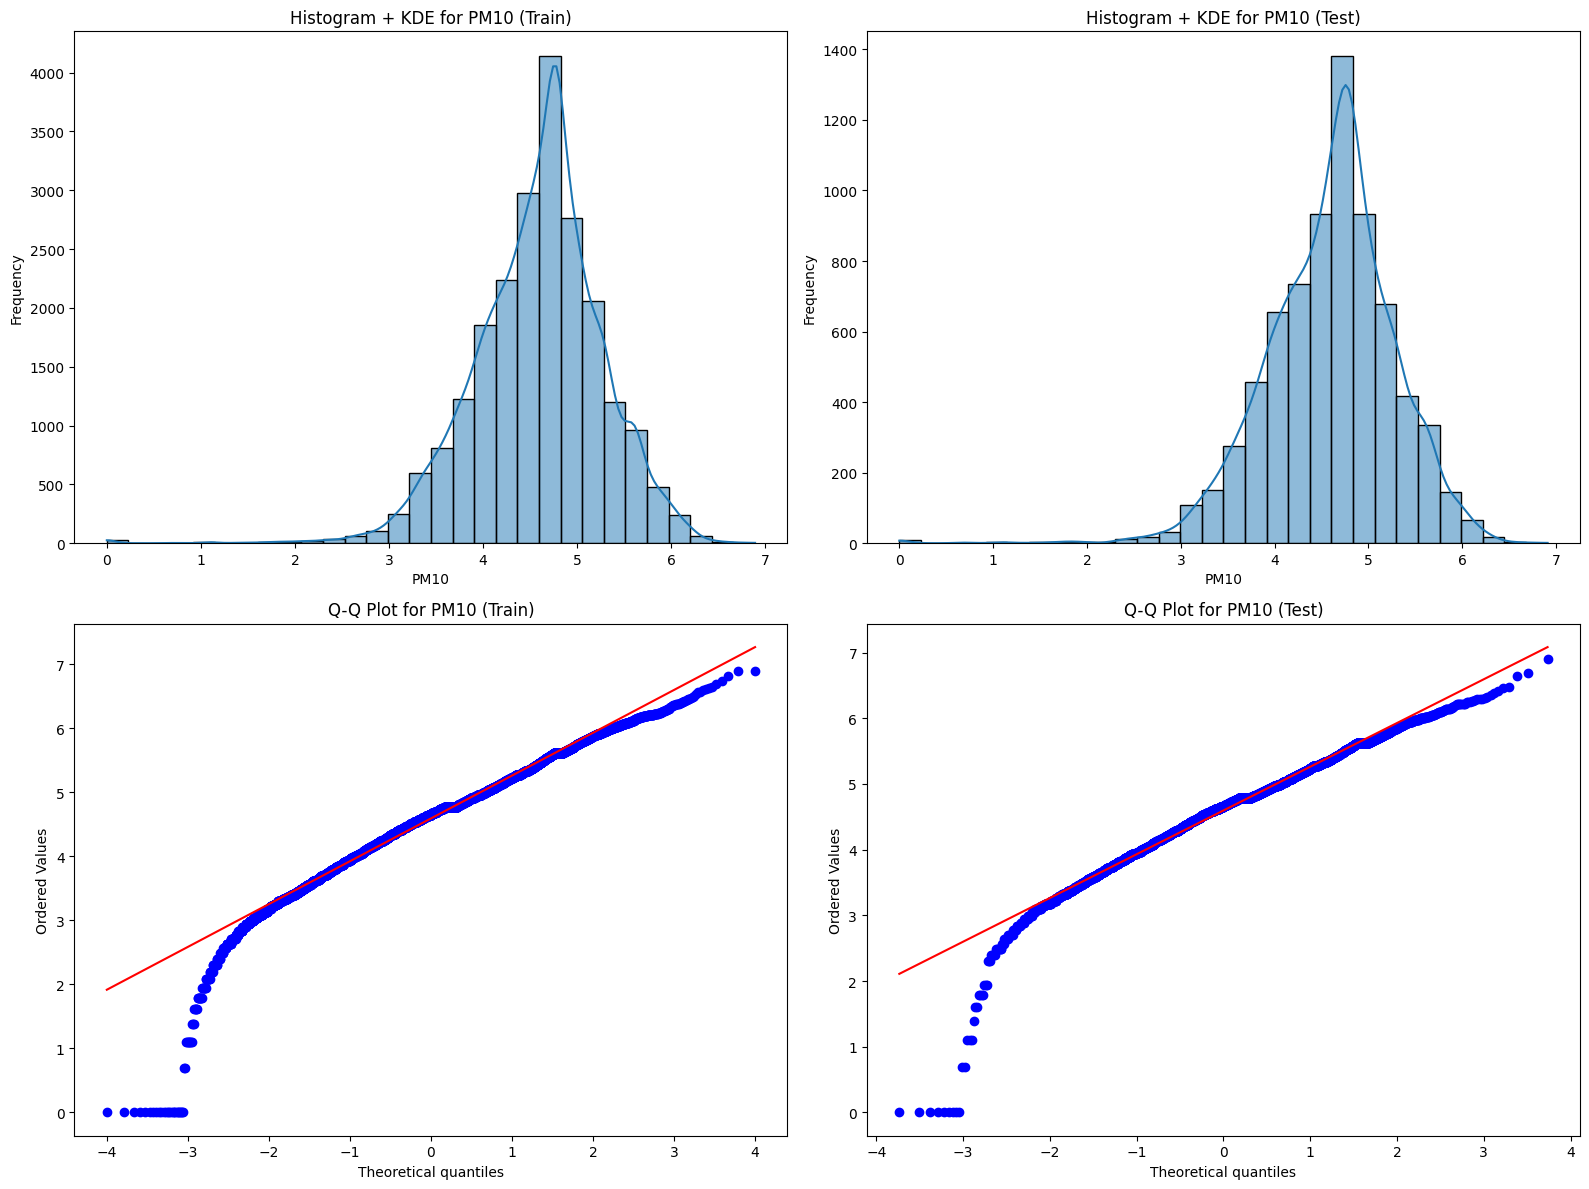

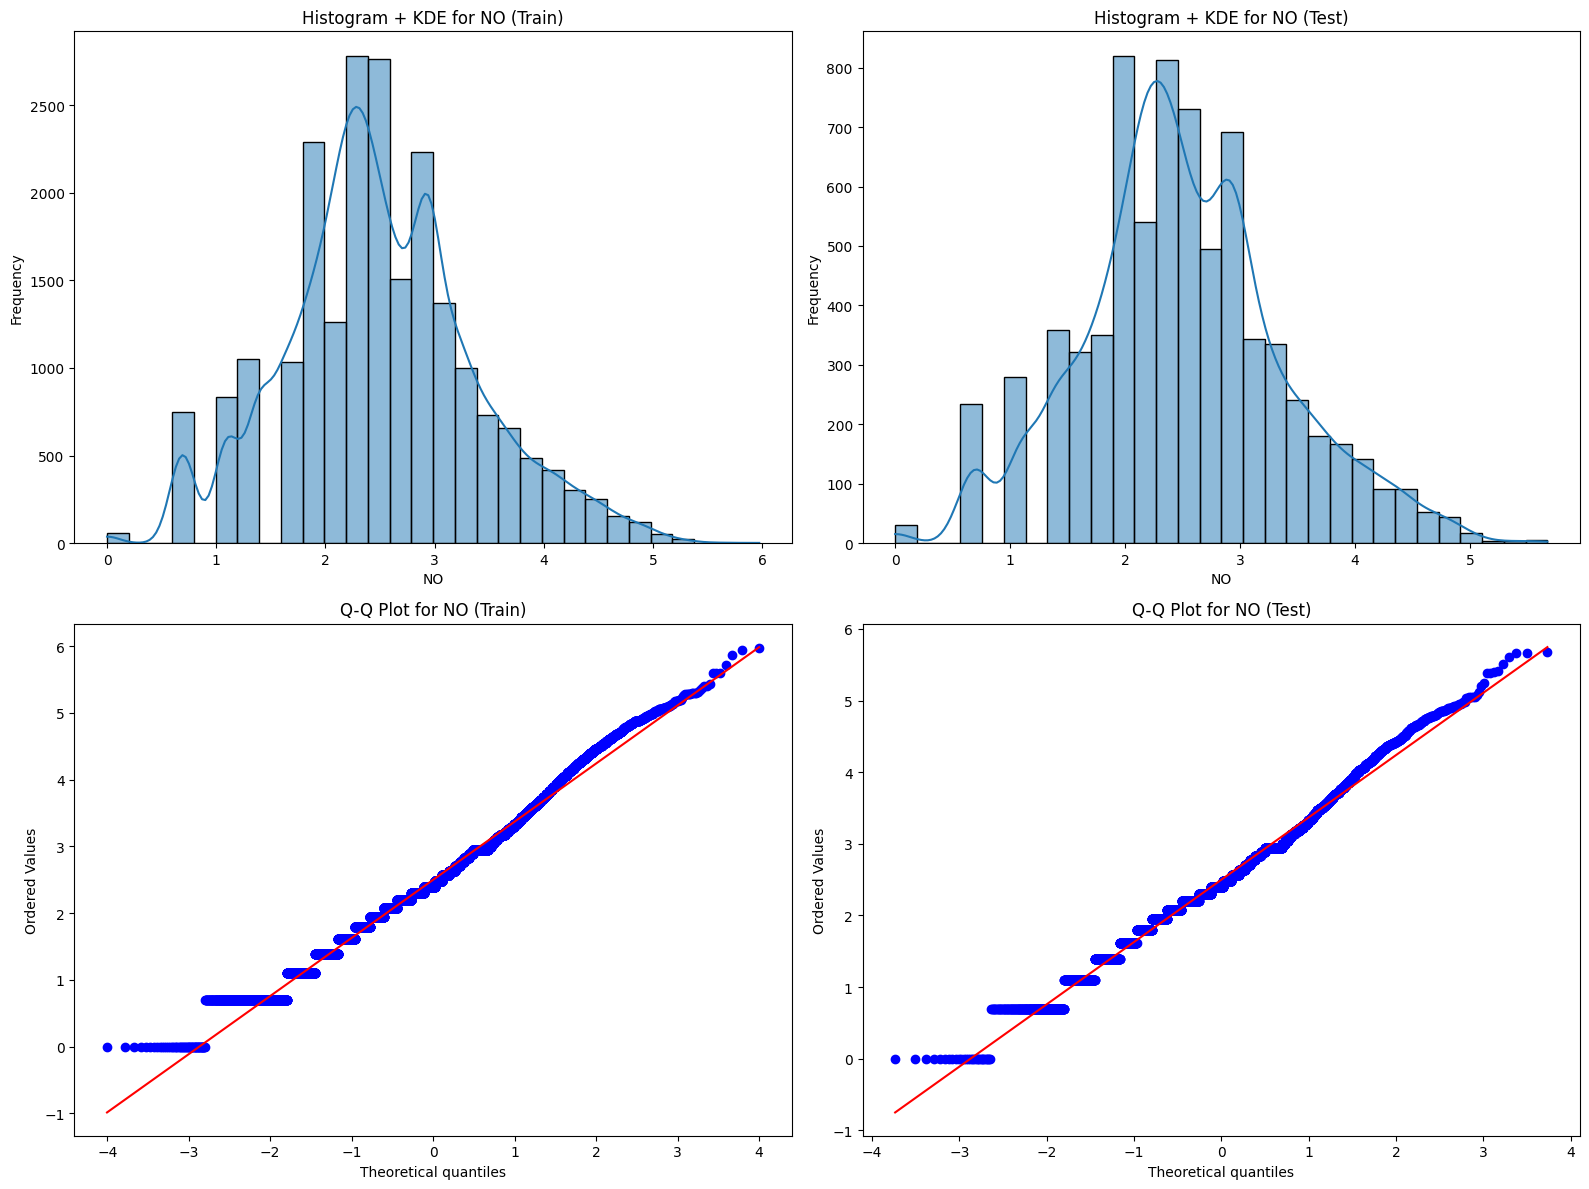

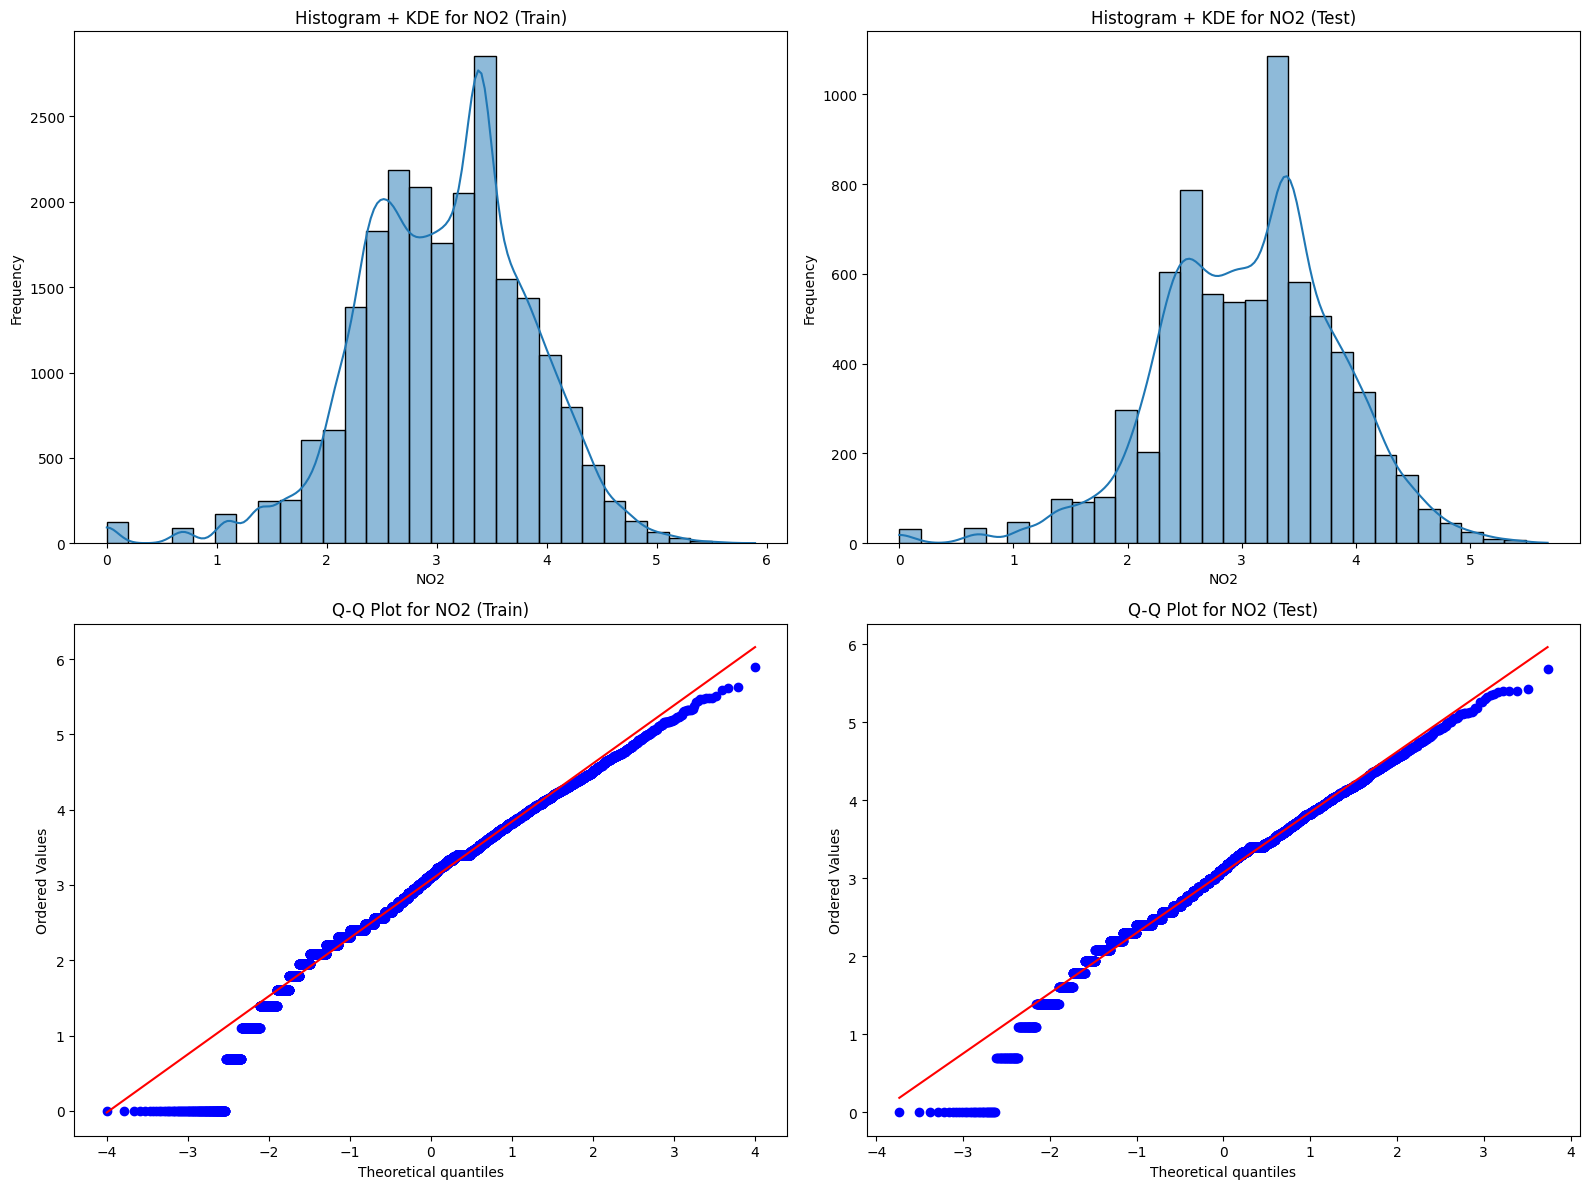

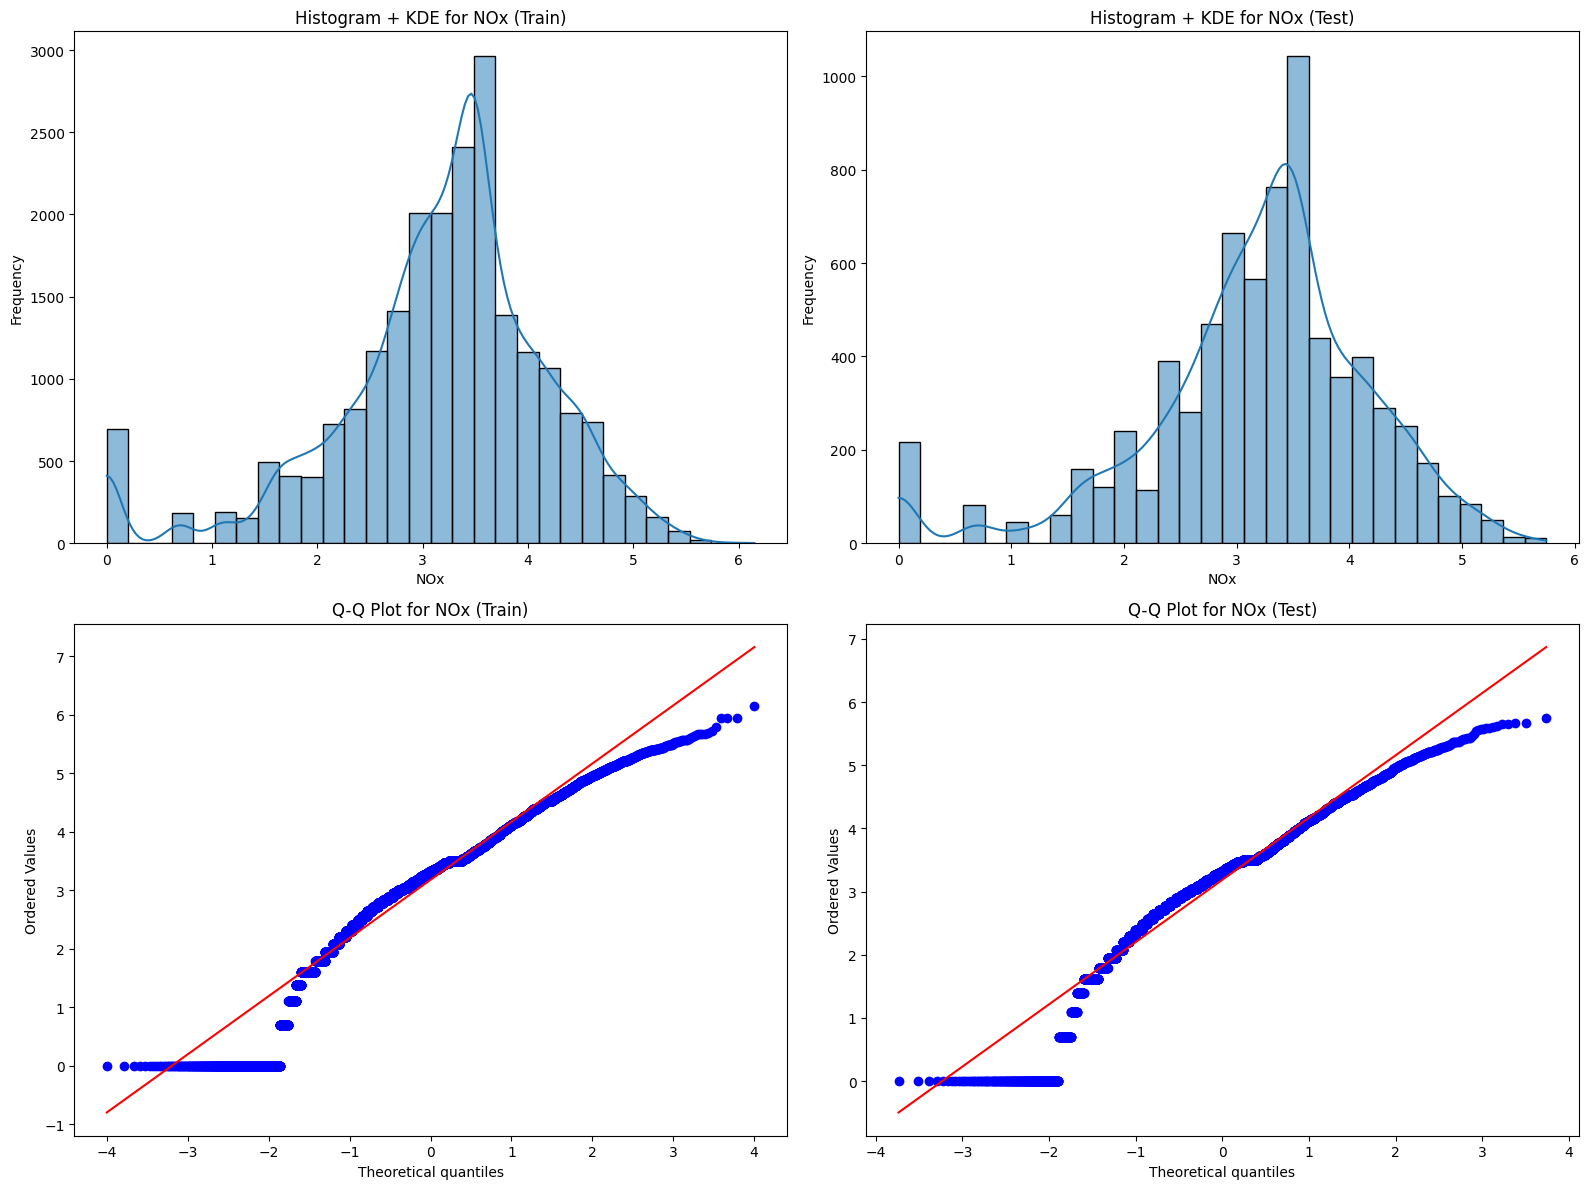

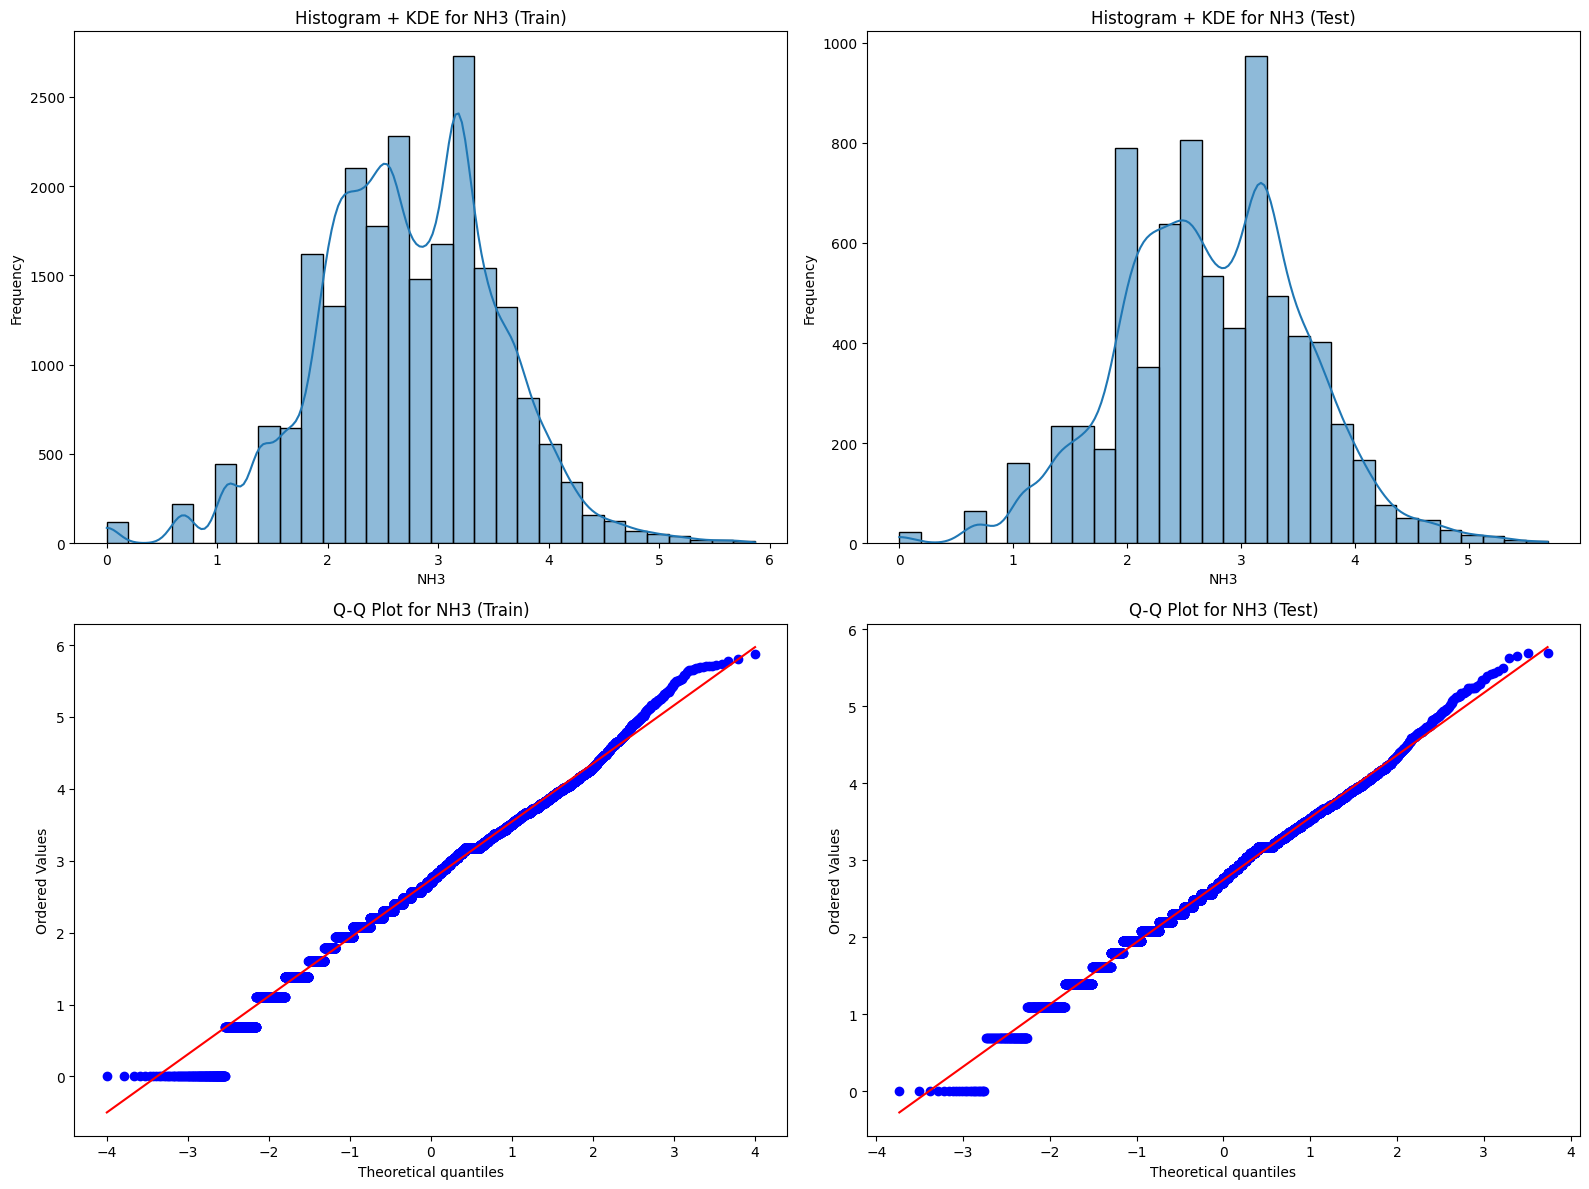

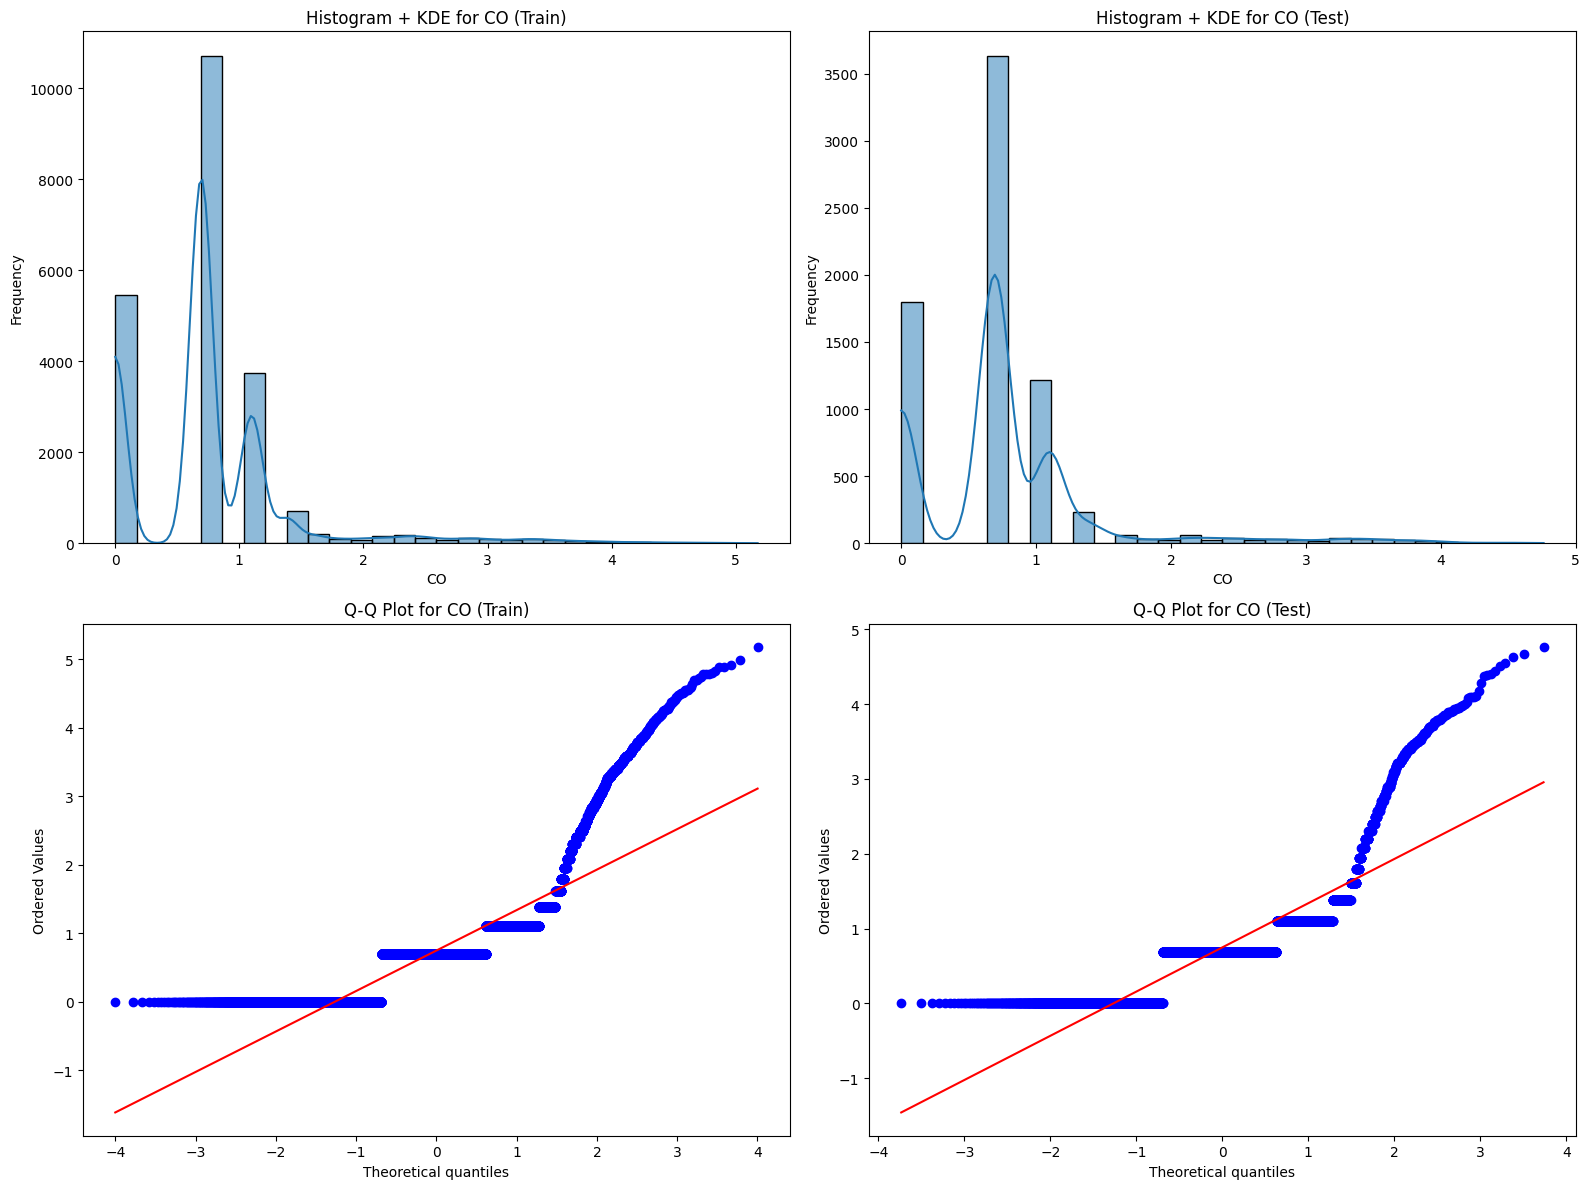

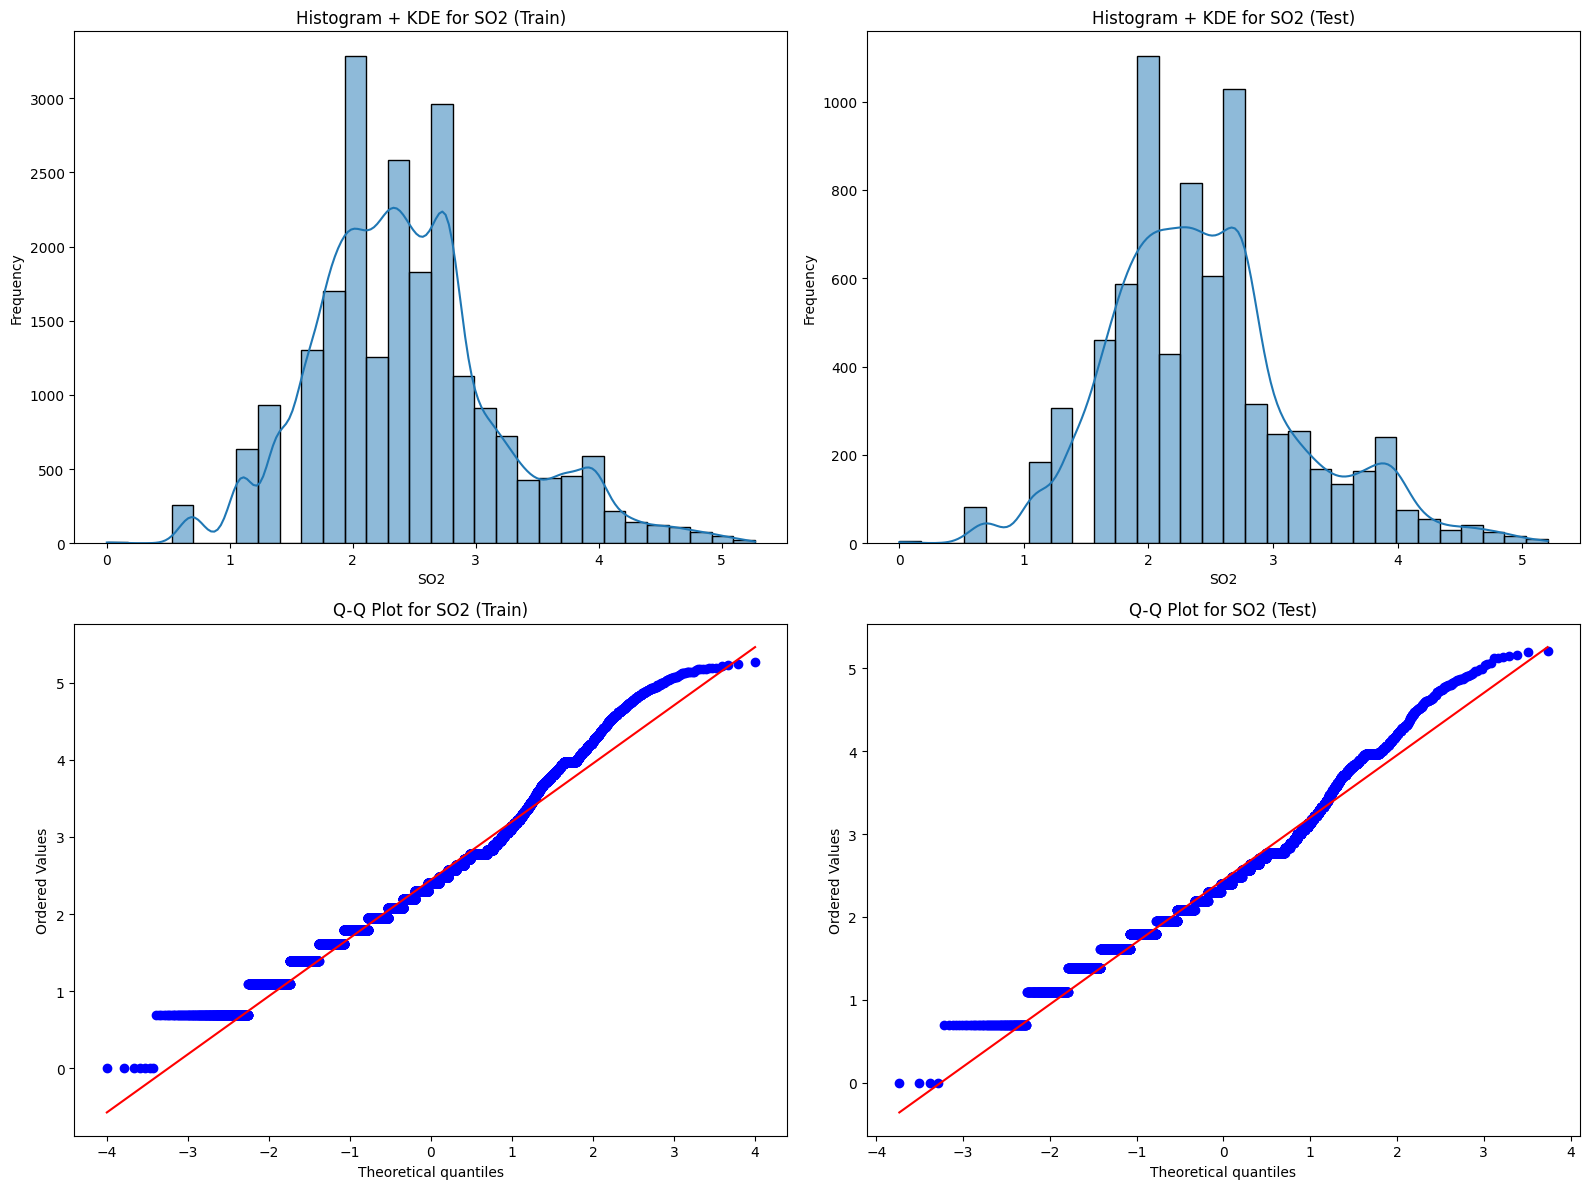

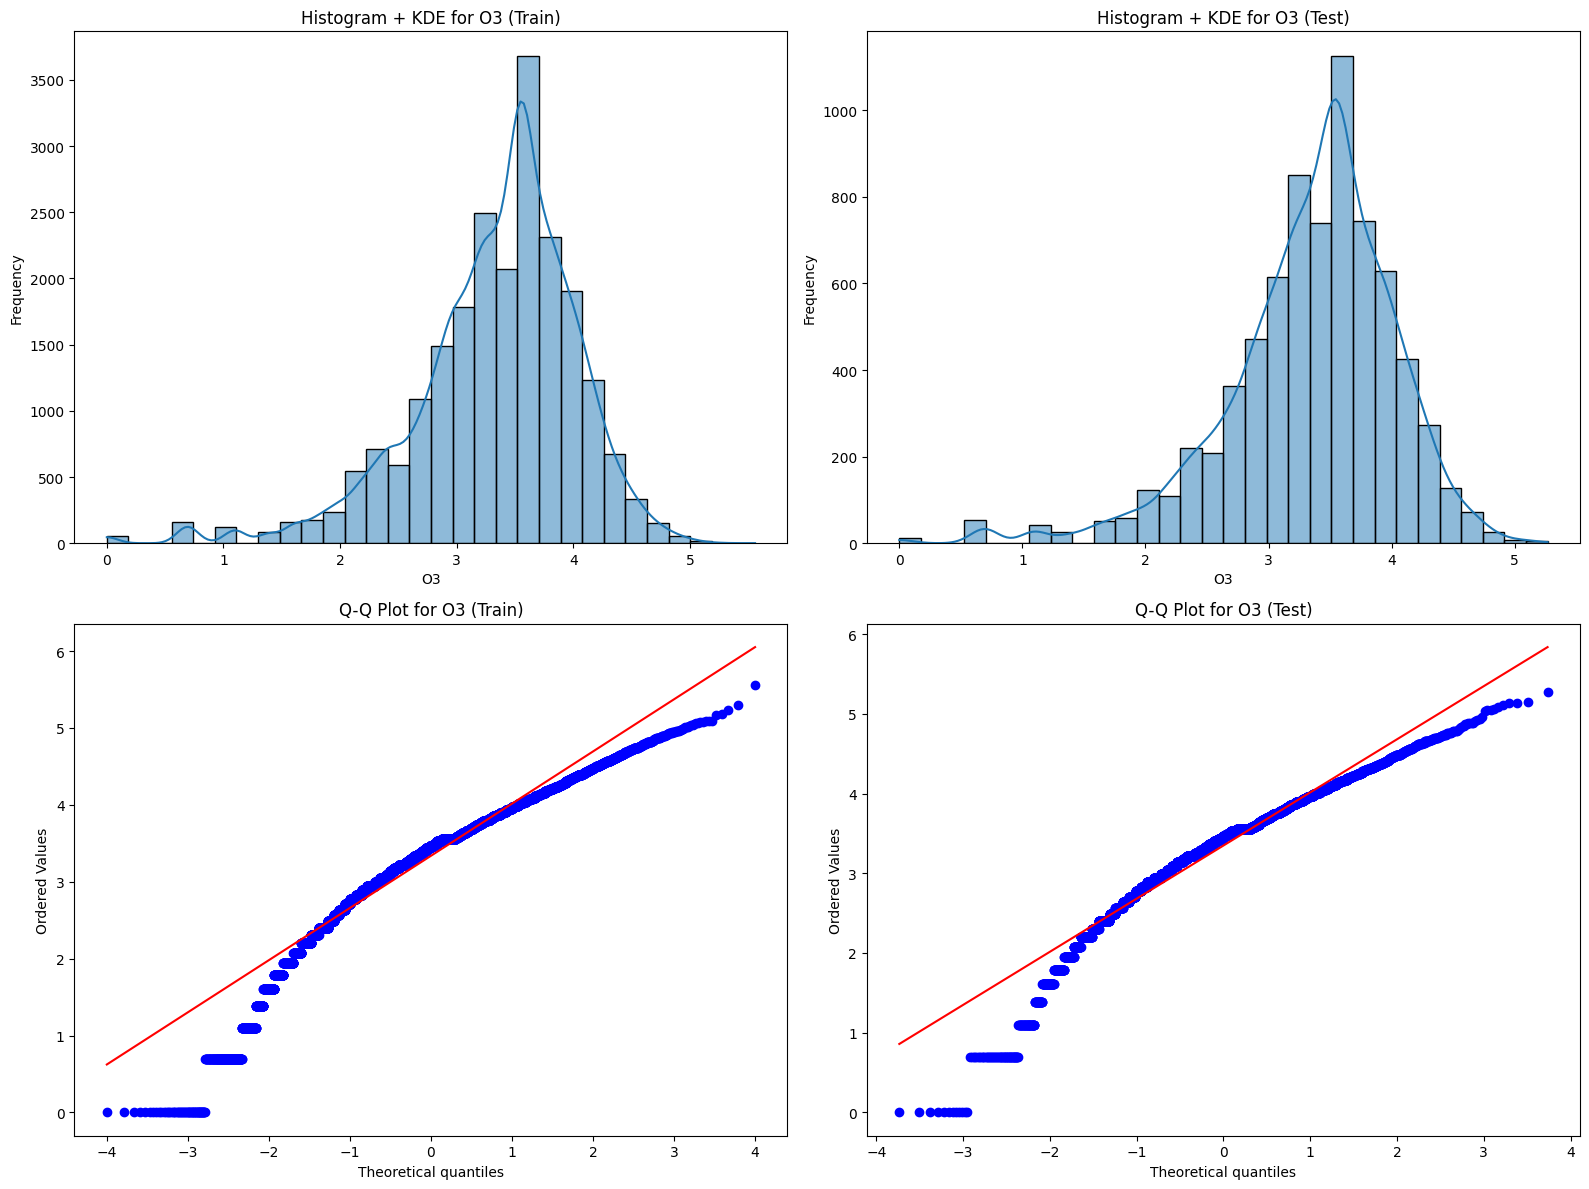

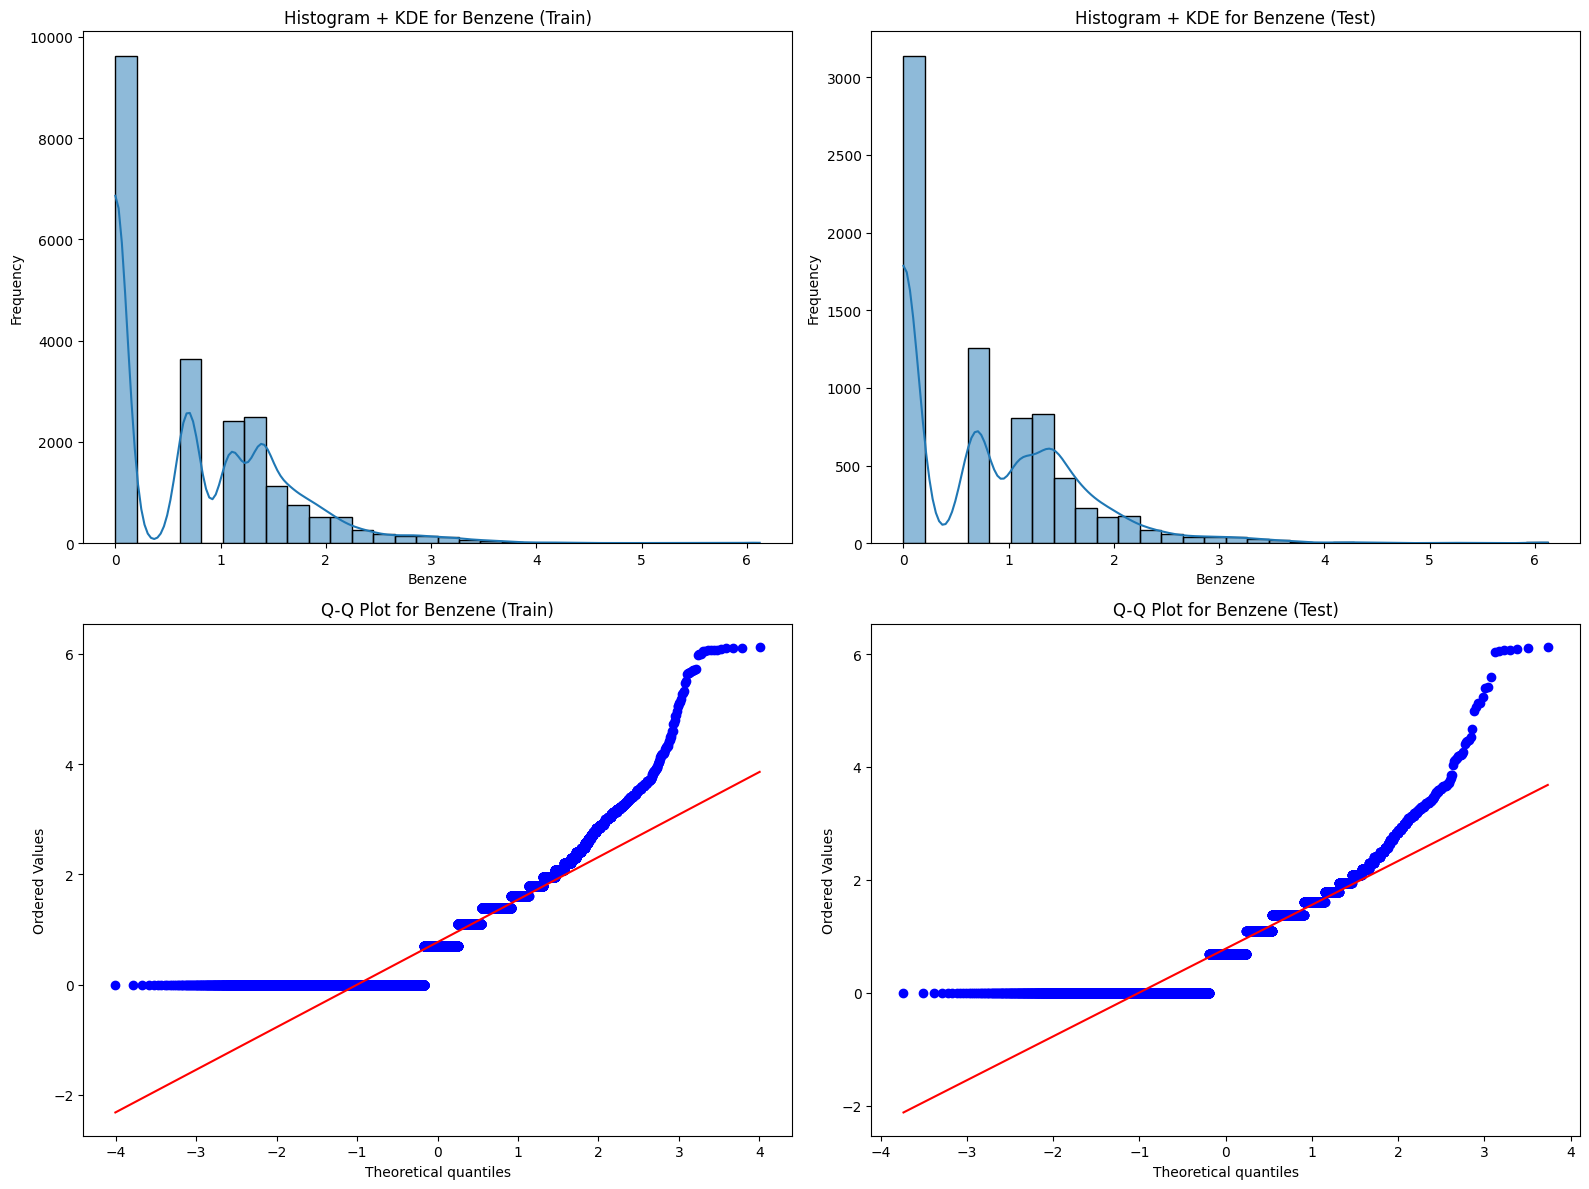

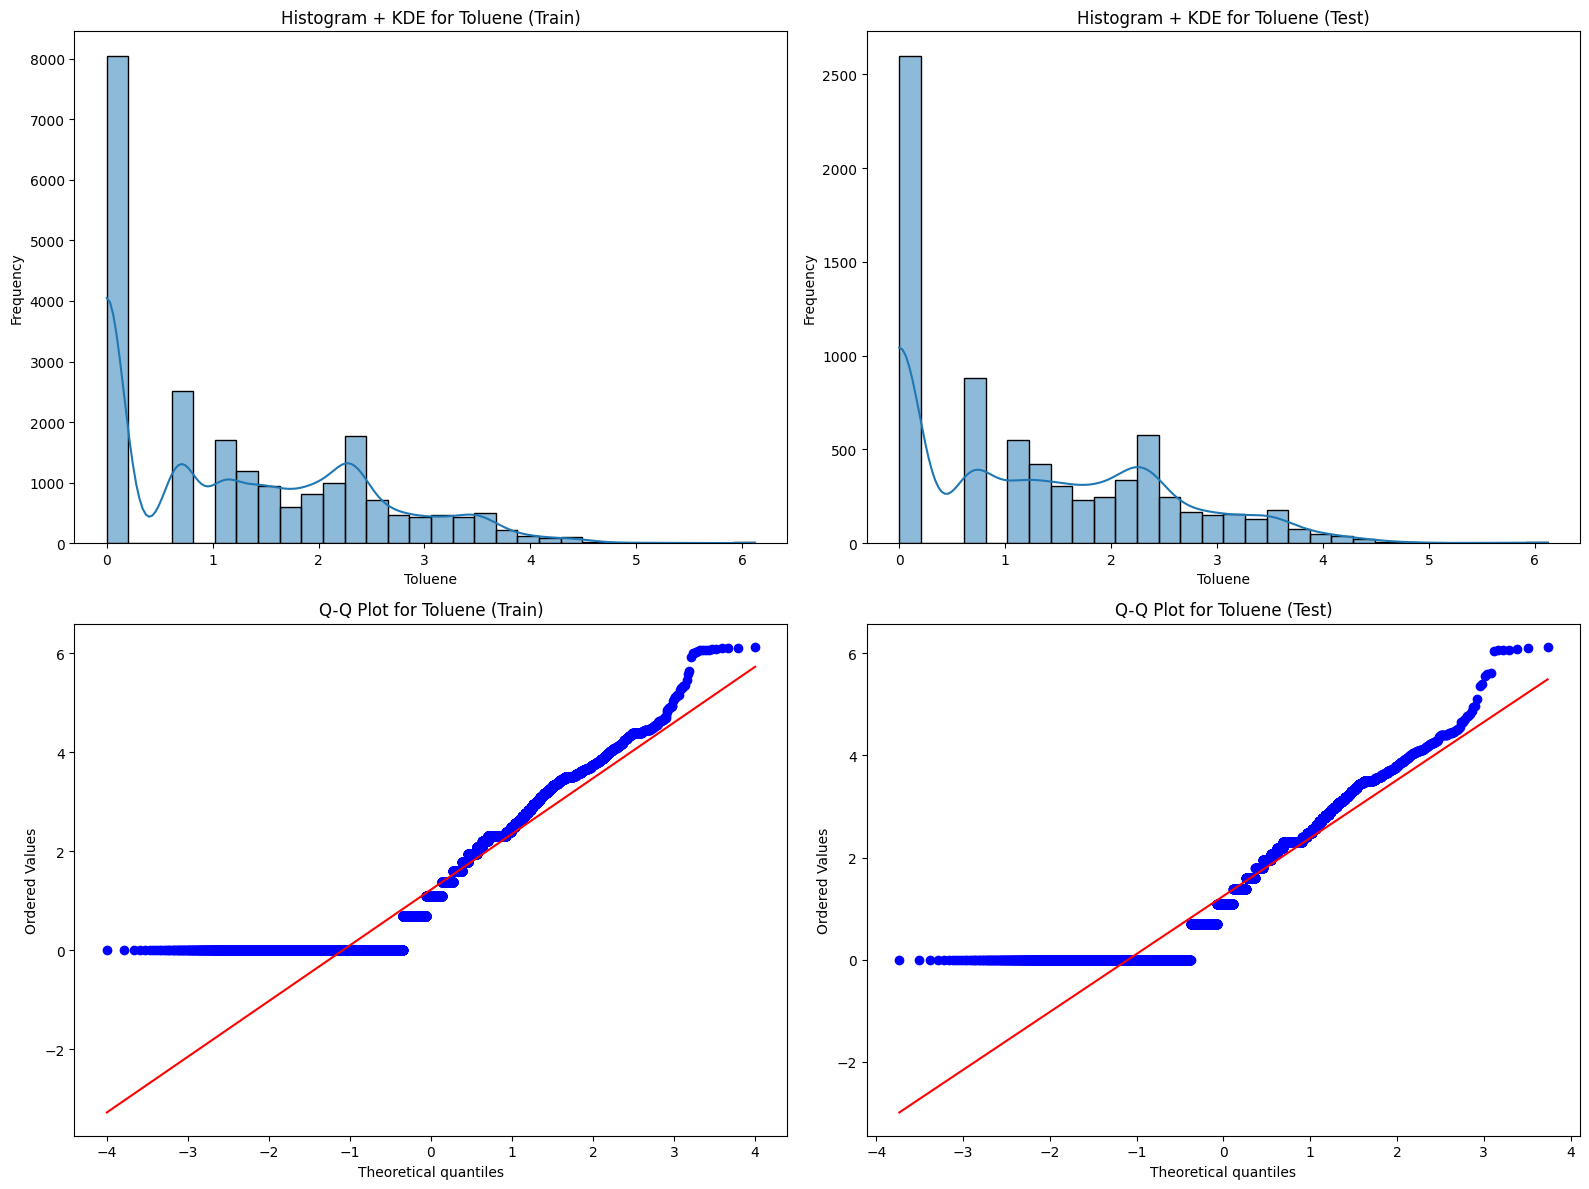

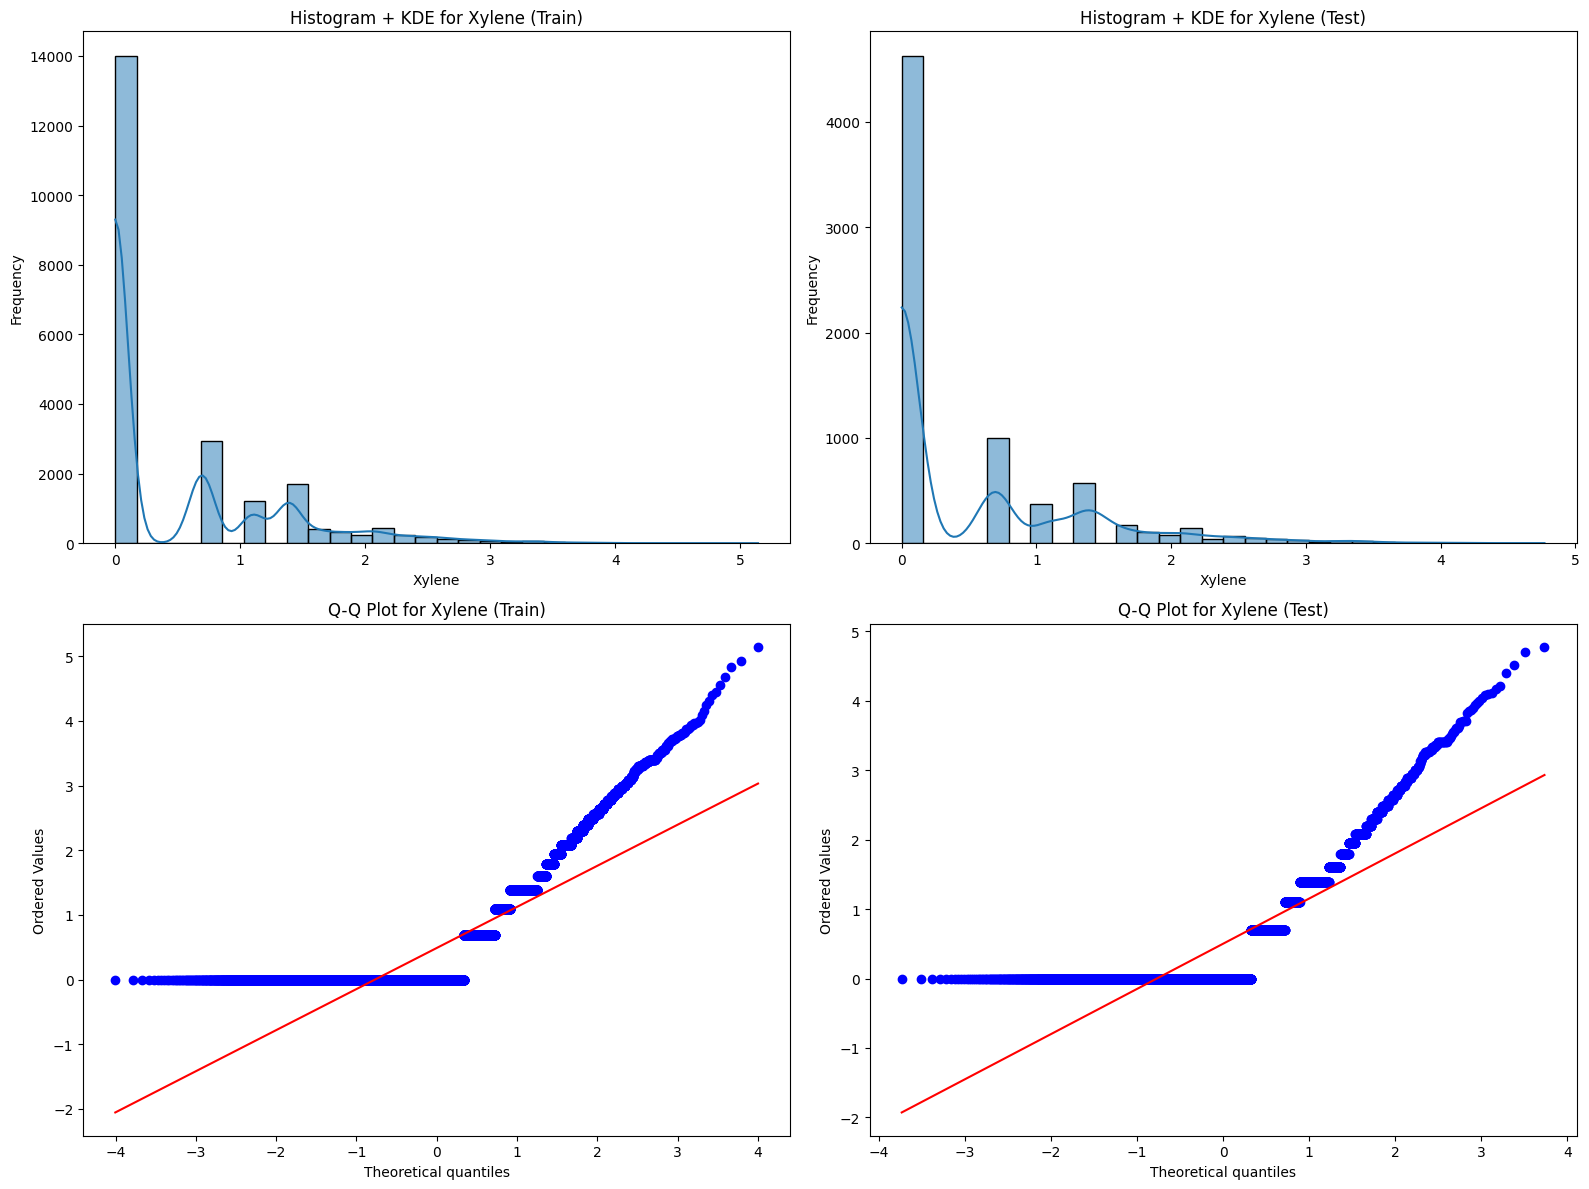

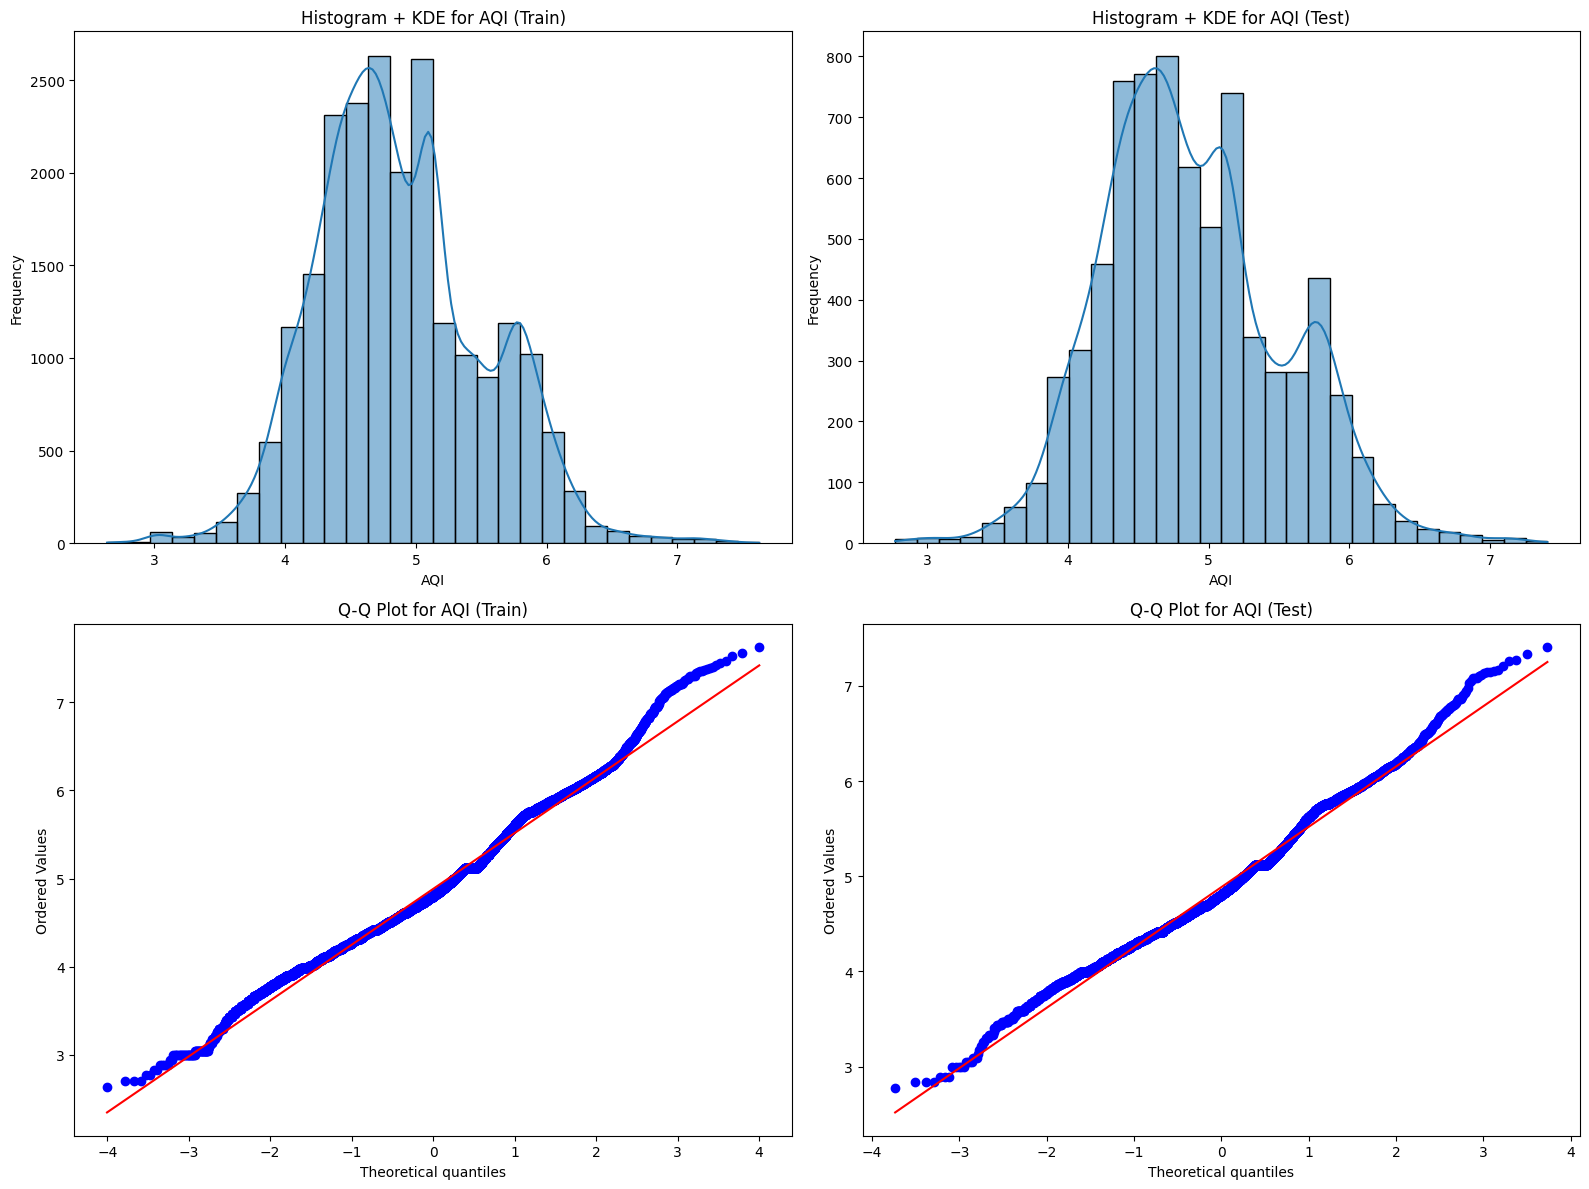

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import pandas as pd

transformed_cols = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI']

# Assuming transformed_cols is defined and X_train_processed and X_test_processed are available
X_train_transformed_df = pd.DataFrame(X_train_processed, columns=transformed_cols)
X_test_transformed_df = pd.DataFrame(X_test_processed, columns=transformed_cols)

for col in transformed_cols:
    plt.figure(figsize=(16, 12))
    
    # Top left: Histogram with KDE for Training Data
    plt.subplot(2, 2, 1)
    sns.histplot(X_train_transformed_df[col], kde=True, bins=30)
    plt.title(f"Histogram + KDE for {col} (Train)")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    
    # Top right: Histogram with KDE for Test Data
    plt.subplot(2, 2, 2)
    sns.histplot(X_test_transformed_df[col], kde=True, bins=30)
    plt.title(f"Histogram + KDE for {col} (Test)")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    
    # Bottom left: Q-Q Plot for Training Data
    plt.subplot(2, 2, 3)
    stats.probplot(X_train_transformed_df[col].dropna(), dist="norm", plot=plt)
    plt.title(f"Q-Q Plot for {col} (Train)")
    
    # Bottom right: Q-Q Plot for Test Data
    plt.subplot(2, 2, 4)
    stats.probplot(X_test_transformed_df[col].dropna(), dist="norm", plot=plt)
    plt.title(f"Q-Q Plot for {col} (Test)")
    
    plt.tight_layout()
    plt.show()



These plots display histograms with KDE overlays and Q-Q plots for each transformed pollutant and AQI in both the training and testing sets. The primary objective is to verify that the log transformation has improved normality by:

Histograms & KDEs:
The distributions now appear more symmetric with fewer extreme values, indicating that the transformation has effectively mitigated heavy skewness across features.

Q-Q Plots:
The quantiles of the transformed data align more closely with a theoretical normal distribution, suggesting reduced skew and more stable variance.

Specifically, for features like Toluene and Xylene, the right tails are less pronounced, and the data points in the Q-Q plots cluster nearer to the reference line, indicating a reduction in outliers. Similarly, the AQI now exhibits a more bell-shaped distribution with a tighter range of values, reflecting a better balance between low and high readings.

Overall, these visualizations confirm that the log transformation has stabilized variance and normalized the distributions across both training and testing sets, thereby enhancing the reliability and performance of subsequent predictive models.

In [36]:
import pandas as pd
import numpy as np
import scipy.stats as stats

# Convert the transformed training data into a DataFrame using the proper column names
X_train_transformed_df = pd.DataFrame(X_train_processed, columns=transformed_cols)
X_test_transformed_df = pd.DataFrame(X_test_processed, columns=transformed_cols)

# For the Transformed Training Set:
train_summary_transformed = X_train_transformed_df.describe().T
train_summary_transformed['skew'] = X_train_transformed_df.skew()
train_summary_transformed['kurtosis'] = X_train_transformed_df.kurtosis()

print("Transformed Training Set Summary Statistics:")
print(train_summary_transformed)

# For the Transformed Test Set:
test_summary_transformed = X_test_transformed_df.describe().T
test_summary_transformed['skew'] = X_test_transformed_df.skew()
test_summary_transformed['kurtosis'] = X_test_transformed_df.kurtosis()

print("\nTransformed Test Set Summary Statistics:")
print(test_summary_transformed)


Transformed Training Set Summary Statistics:
           count      mean       std       min       25%       50%       75%  \
PM2.5    22148.0  3.936657  0.742616  0.000000  3.465736  3.970292  4.343805   
PM10     22148.0  4.593483  0.677646  0.000000  4.189655  4.653960  5.003946   
NO       22148.0  2.500089  0.875498  0.000000  1.945910  2.397895  2.995732   
NO2      22148.0  3.068583  0.777552  0.000000  2.564949  3.135494  3.583519   
NOx      22148.0  3.178048  1.021487  0.000000  2.708050  3.332205  3.784190   
NH3      22148.0  2.734894  0.811059  0.000000  2.197225  2.708050  3.258097   
CO       22148.0  0.747008  0.679669  0.000000  0.693147  0.693147  1.098612   
SO2      22148.0  2.444488  0.763404  0.000000  1.945910  2.397895  2.772589   
O3       22148.0  3.337616  0.697508  0.000000  2.995732  3.465736  3.784190   
Benzene  22148.0  0.770006  0.845112  0.000000  0.000000  0.693147  1.386294   
Toluene  22148.0  1.224847  1.197499  0.000000  0.000000  1.098612  2.19722

**Transformed Data Summary and Interpretation**

The log transformation compresses the scale of our features, resulting in lower variance, skewness, and kurtosis. Summary statistics for both the training and testing sets now show similar means and standard deviations, indicating that the transformation was applied consistently. Features that were previously highly skewed, such as CO, now have distributions that are closer to normal. This normalization minimizes the influence of extreme outliers, thereby enhancing model stability and performance during training and evaluation.

#### Further Transformation for Specific Features (Yeo-Johnson)

In [37]:
from sklearn.preprocessing import PowerTransformer

# Define the columns for further transformation
cols_transform = ['CO', 'O3', 'Benzene', 'Xylene']

# Explicitly define the numeric column names that correspond to your processed data
numeric_cols = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI']

# Convert processed training and testing data to DataFrames with proper column names
X_train_processed_df = pd.DataFrame(X_train_processed, columns=numeric_cols)
X_test_processed_df = pd.DataFrame(X_test_processed, columns=numeric_cols)

# Create a PowerTransformer with the Yeo-Johnson method
pt = PowerTransformer(method='yeo-johnson')

# Fit and transform on the selected columns for the training data; transform the testing data
X_train_trans = pt.fit_transform(X_train_processed_df[cols_transform])
X_test_trans = pt.transform(X_test_processed_df[cols_transform])

# Replace the original columns with the transformed values
X_train_processed_df.loc[:, cols_transform] = X_train_trans
X_test_processed_df.loc[:, cols_transform] = X_test_trans

# Convert the DataFrames back to arrays if needed
X_train_processed = X_train_processed_df.values
X_test_processed = X_test_processed_df.values

# Check new skewness for the transformed columns
new_skew = pd.DataFrame(X_train_processed, columns=numeric_cols)[cols_transform].skew()
print("New skewness for", cols_transform, ":\n", new_skew)


New skewness for ['CO', 'O3', 'Benzene', 'Xylene'] :
 CO        -0.003696
O3        -0.021495
Benzene    0.109985
Xylene     0.615541
dtype: float64


**Further Transformation with Yeo-Johnson**

The Yeo-Johnson transformation was applied to specific features—CO, O3, Benzene, and Xylene—to further reduce skewness after the log transformation. The PowerTransformer with the Yeo-Johnson method adapts to both positive and negative values, making it ideal for these features. The results show that skewness for CO and O3 is nearly zero, while Benzene and Xylene exhibit slight skewness (0.11 and 0.62, respectively), indicating a more normalized distribution. This additional transformation helps stabilize variance and minimizes the impact of outliers, ultimately enhancing the robustness and performance of downstream modeling.

#### Normalization of training and testing set Using StandardScaler

In [38]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# Assuming that X_train_processed and X_test_processed are your log-transformed (and further processed) datasets
# and they already contain only the numeric columns (or the columns you want to normalize)

# Initialize StandardScaler
scaler = StandardScaler()

# Fit the scaler on the processed training data and transform both training and test processed sets
X_train_normalized = scaler.fit_transform(X_train_processed)
X_test_normalized = scaler.transform(X_test_processed)

print("Normalized training data shape:", X_train_normalized.shape)
print("Normalized testing data shape:", X_test_normalized.shape)



Normalized training data shape: (22148, 13)
Normalized testing data shape: (7383, 13)


**Final Normalization with StandardScaler**  

After transformations, StandardScaler was applied to normalize both the training and testing datasets. This ensures that all features have a mean of 0 and a standard deviation of 1, making them suitable for machine learning models sensitive to scale differences. The transformed training set has a shape of (22,148, 13), and the test set has (7,383, 13), confirming that all features were standardized successfully. This step enhances model stability, improves convergence speed, and ensures fair weight distribution across different features.

### Addressing Class Imbalance with SMOTE

#### Checking Class Distribution in the Training and testing Set

In [39]:
# Checking Class Distribution in the Training Set
print("Class distribution in the training set:")
print(y_train.value_counts())

# Checking Class Distribution in the Testing Set
print("Class distribution in the testing set:")
print(y_test.value_counts())



Class distribution in the training set:
Moderate (Breathing discomfort to people with lung, heart disease, children and older adults)    8627
Satisfactory (Minor breathing discomfort to sensitive people)                                    7237
Poor (Breathing discomfort to people on prolonged exposure)                                      2284
Very Poor (Respiratory illness to people on prolonged exposure)                                  1962
Severe (Respiratory effects even on healthy people)                                              1023
Good (Minimal Impact)                                                                            1015
Name: AQI_Bucket, dtype: int64
Class distribution in the testing set:
Moderate (Breathing discomfort to people with lung, heart disease, children and older adults)    2876
Satisfactory (Minor breathing discomfort to sensitive people)                                    2412
Poor (Breathing discomfort to people on prolonged exposure)               


The training and testing sets reveal an imbalance, with the "Moderate" and "Satisfactory" classes having significantly more samples than the "Very Poor," "Severe," and "Good" categories. This can lead to biased model performance, where minority classes are underrepresented in predictions.  

To address this, **Synthetic Minority Over-sampling Technique (SMOTE)** will be used on the training data to generate synthetic examples for the underrepresented classes. This ensures a more balanced dataset, improving the model’s ability to learn patterns for all AQI categories effectively.

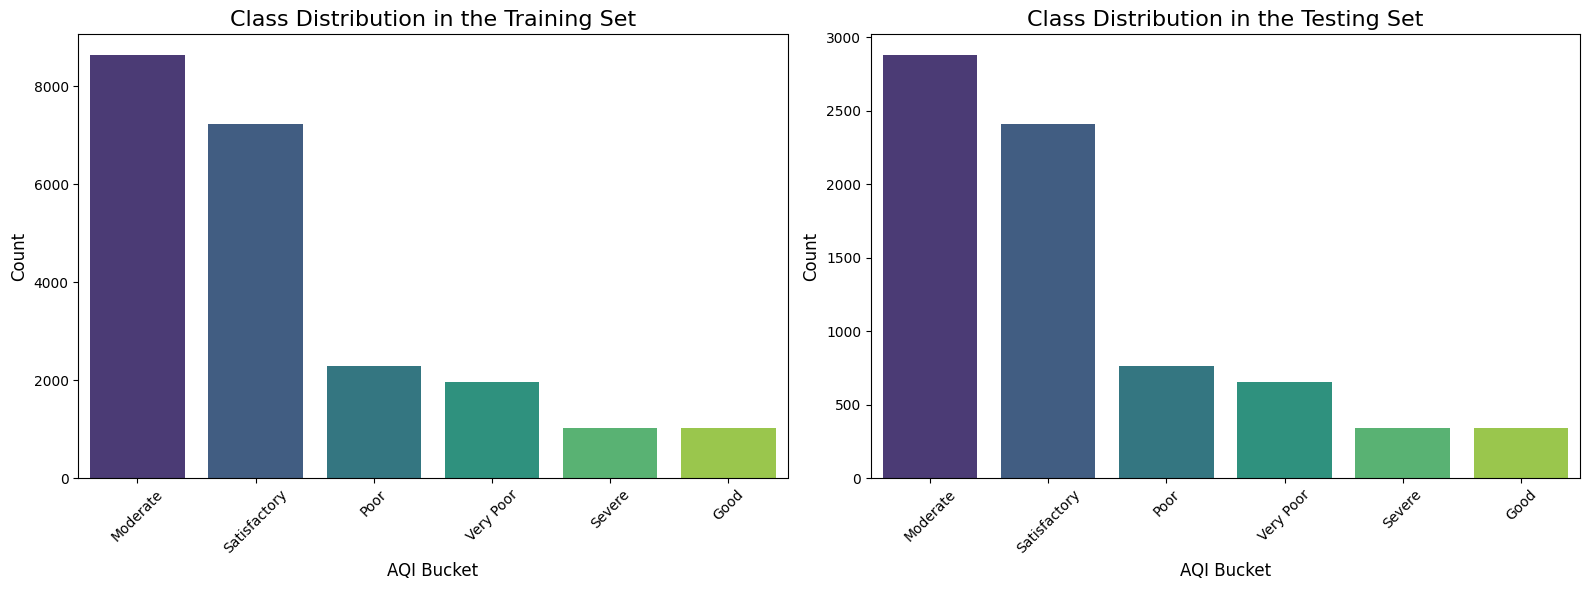

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# --- For Training Set ---
# Calculate class counts for the training target
class_counts_train = y_train.value_counts()

# Simplify labels by extracting text before the first '(' and stripping whitespace
simple_labels_train = [label.split('(')[0].strip() for label in class_counts_train.index]

# Create a DataFrame for plotting (Training Set)
plot_df_train = pd.DataFrame({
    'AQI_Bucket': simple_labels_train,
    'Count': class_counts_train.values
})

# --- For Testing Set ---
# Calculate class counts for the testing target
class_counts_test = y_test.value_counts()

# Simplify labels for the testing set
simple_labels_test = [label.split('(')[0].strip() for label in class_counts_test.index]

# Create a DataFrame for plotting (Testing Set)
plot_df_test = pd.DataFrame({
    'AQI_Bucket': simple_labels_test,
    'Count': class_counts_test.values
})

# --- Plotting ---
plt.figure(figsize=(16, 6))

# Training Set Plot
plt.subplot(1, 2, 1)
sns.barplot(data=plot_df_train, x='AQI_Bucket', y='Count', hue='AQI_Bucket', dodge=False, palette="viridis", legend=False)
plt.title("Class Distribution in the Training Set", fontsize=16)
plt.xlabel("AQI Bucket", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# Testing Set Plot
plt.subplot(1, 2, 2)
sns.barplot(data=plot_df_test, x='AQI_Bucket', y='Count', hue='AQI_Bucket', dodge=False, palette="viridis", legend=False)
plt.title("Class Distribution in the Testing Set", fontsize=16)
plt.xlabel("AQI Bucket", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()



The bar charts illustrate class distribution in the training and testing datasets, highlighting a significant imbalance. The "Moderate" and "Satisfactory" AQI categories have the highest counts, while "Severe" and "Good" categories are underrepresented. This skewness suggests that real-world air quality data tends to cluster around moderate pollution levels, likely due to urban pollution patterns and data collection biases. Such an imbalance can lead to biased model predictions, where the model becomes better at recognizing frequent categories but struggles to accurately classify less common severe pollution cases.

#### Applying SMOTE to Balance the Classes

#### Developing Model.

#### Define ML models in a dictionary

In [41]:
import time
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, r2_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

# Encode target labels to numeric values
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)

models = {
    'KNN': KNeighborsClassifier(),
    'GNB': GaussianNB(),
    'SVM': SVC(random_state=42),
    'RF': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(eval_metric='mlogloss', random_state=42)
}

# Initialize lists to store results
results_train = []
results_test = []
results_train_smote = []
results_test_smote = []

#### Evaluate Models WITHOUT SMOTE using normalized data

In [42]:

for name, model in models.items():
    # ---- Training on Original Training Data ----
    start_train = time.time()
    model.fit(X_train_normalized, y_train_enc)
    train_time = time.time() - start_train
    
    # Predictions on Training Data
    y_train_pred = model.predict(X_train_normalized)
    acc_train = accuracy_score(y_train_enc, y_train_pred)
    prec_train = precision_score(y_train_enc, y_train_pred, average='weighted')
    rec_train = recall_score(y_train_enc, y_train_pred, average='weighted')
    f1_train = f1_score(y_train_enc, y_train_pred, average='weighted')
    
    # Error Metrics on Training Data
    mae_train = mean_absolute_error(y_train_enc, y_train_pred)
    rmse_train = np.sqrt(mean_squared_error(y_train_enc, y_train_pred))
    try:
        rmsle_train = np.sqrt(mean_squared_log_error(y_train_enc, y_train_pred))
    except ValueError:
        rmsle_train = np.nan
    r2_train = r2_score(y_train_enc, y_train_pred)
    
    results_train.append({
        'Model': name,
        'Accuracy': acc_train,
        'Precision': prec_train,
        'Recall': rec_train,
        'F1-Score': f1_train,
        'Training Time (sec)': train_time,
        'MAE': mae_train,
        'RMSE': rmse_train,
        'RMSLE': rmsle_train,
        'R2': r2_train
    })
    
    # ---- Predictions on Test Data ----
    start_test = time.time()
    y_test_pred = model.predict(X_test_normalized)
    test_time = time.time() - start_test
    
    acc_test = accuracy_score(y_test_enc, y_test_pred)
    prec_test = precision_score(y_test_enc, y_test_pred, average='weighted')
    rec_test = recall_score(y_test_enc, y_test_pred, average='weighted')
    f1_test = f1_score(y_test_enc, y_test_pred, average='weighted')
    
    mae_test = mean_absolute_error(y_test_enc, y_test_pred)
    rmse_test = np.sqrt(mean_squared_error(y_test_enc, y_test_pred))
    try:
        rmsle_test = np.sqrt(mean_squared_log_error(y_test_enc, y_test_pred))
    except ValueError:
        rmsle_test = np.nan
    r2_test = r2_score(y_test_enc, y_test_pred)
    
    results_test.append({
        'Model': name,
        'Accuracy': acc_test,
        'Precision': prec_test,
        'Recall': rec_test,
        'F1-Score': f1_test,
        'Prediction Time (sec)': test_time,
        'MAE': mae_test,
        'RMSE': rmse_test,
        'RMSLE': rmsle_test,
        'R2': r2_test
    })


#### Evaluate Models WITH SMOTE on the normalized data

In [43]:

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_normalized, y_train_enc)

for name, model in models.items():
    # ---- Training on SMOTE-Resampled Data ----
    start_train_smote = time.time()
    model.fit(X_train_res, y_train_res)
    train_time_smote = time.time() - start_train_smote
    
    # Predictions on SMOTE-Resampled Training Data
    y_train_pred_smote = model.predict(X_train_res)
    acc_train_smote = accuracy_score(y_train_res, y_train_pred_smote)
    prec_train_smote = precision_score(y_train_res, y_train_pred_smote, average='weighted')
    rec_train_smote = recall_score(y_train_res, y_train_pred_smote, average='weighted')
    f1_train_smote = f1_score(y_train_res, y_train_pred_smote, average='weighted')
    
    mae_train_smote = mean_absolute_error(y_train_res, y_train_pred_smote)
    rmse_train_smote = np.sqrt(mean_squared_error(y_train_res, y_train_pred_smote))
    try:
        rmsle_train_smote = np.sqrt(mean_squared_log_error(y_train_res, y_train_pred_smote))
    except ValueError:
        rmsle_train_smote = np.nan
    r2_train_smote = r2_score(y_train_res, y_train_pred_smote)
    
    results_train_smote.append({
        'Model': name,
        'Accuracy': acc_train_smote,
        'Precision': prec_train_smote,
        'Recall': rec_train_smote,
        'F1-Score': f1_train_smote,
        'Training Time (sec)': train_time_smote,
        'MAE': mae_train_smote,
        'RMSE': rmse_train_smote,
        'RMSLE': rmsle_train_smote,
        'R2': r2_train_smote
    })
    
    # ---- Predictions on Test Data using the SMOTE-trained Model ----
    start_test_smote = time.time()
    y_test_pred_smote = model.predict(X_test_normalized)
    test_time_smote = time.time() - start_test_smote
    
    acc_test_smote = accuracy_score(y_test_enc, y_test_pred_smote)
    prec_test_smote = precision_score(y_test_enc, y_test_pred_smote, average='weighted')
    rec_test_smote = recall_score(y_test_enc, y_test_pred_smote, average='weighted')
    f1_test_smote = f1_score(y_test_enc, y_test_pred_smote, average='weighted')
    
    mae_test_smote = mean_absolute_error(y_test_enc, y_test_pred_smote)
    rmse_test_smote = np.sqrt(mean_squared_error(y_test_enc, y_test_pred_smote))
    try:
        rmsle_test_smote = np.sqrt(mean_squared_log_error(y_test_enc, y_test_pred_smote))
    except ValueError:
        rmsle_test_smote = np.nan
    r2_test_smote = r2_score(y_test_enc, y_test_pred_smote)
    
    results_test_smote.append({
        'Model': name,
        'Accuracy': acc_test_smote,
        'Precision': prec_test_smote,
        'Recall': rec_test_smote,
        'F1-Score': f1_test_smote,
        'Prediction Time (sec)': test_time_smote,
        'MAE': mae_test_smote,
        'RMSE': rmse_test_smote,
        'RMSLE': rmsle_test_smote,
        'R2': r2_test_smote
    })


#### Convert results into DataFrames for better visualization

In [44]:

df_train_results = pd.DataFrame(results_train)
df_train_smote_results = pd.DataFrame(results_train_smote)
df_test_results = pd.DataFrame(results_test)
df_test_smote_results = pd.DataFrame(results_test_smote)

print("Training Set Results (Without SMOTE):")
print(df_train_results)
print("\nTraining Set Results (With SMOTE):")
print(df_train_smote_results)
print("\nTesting Set Results (Without SMOTE):")
print(df_test_results)
print("\nTesting Set Results (With SMOTE):")
print(df_test_smote_results)

Training Set Results (Without SMOTE):
     Model  Accuracy  Precision    Recall  F1-Score  Training Time (sec)  \
0      KNN  0.882518   0.881824  0.882518  0.881662             0.040422   
1      GNB  0.873262   0.876249  0.873262  0.874022             0.000000   
2      SVM  0.967311   0.967550  0.967311  0.967250             3.892085   
3       RF  1.000000   1.000000  1.000000  1.000000             1.881953   
4  XGBoost  1.000000   1.000000  1.000000  1.000000             0.642573   

        MAE      RMSE     RMSLE        R2  
0  0.230630  0.725139  0.251871  0.714242  
1  0.252077  0.748637  0.283696  0.695422  
2  0.064611  0.388393  0.134426  0.918022  
3  0.000000  0.000000  0.000000  1.000000  
4  0.000000  0.000000  0.000000  1.000000  

Training Set Results (With SMOTE):
     Model  Accuracy  Precision    Recall  F1-Score  Training Time (sec)  \
0      KNN  0.957053   0.957078  0.957053  0.956474             0.134188   
1      GNB  0.891716   0.893178  0.891716  0.891284  

#### **AQI Prediction and Its Potential Benefits:**

Predicting air quality (AQI) is a complex task due to the dynamic environmental conditions and variability of pollutants across different times and locations. In this study, machine learning models were used to predict AQI levels, with the goal of improving forecasting accuracy for health and environmental planning.

The results showed that the **XGBoost** model consistently outperformed the others, providing the highest accuracy and optimal error metrics during both training and testing. The **Random Forest (RF)** model also demonstrated strong performance, especially when trained with class balancing techniques, which helped reduce prediction errors. On the other hand, the **Support Vector Machine (SVM)** model was less accurate, showing sensitivity to imbalanced datasets.

Several error metrics like **Mean Absolute Error (MAE)**, **Root Mean Squared Error (RMSE)**, and **R²** were used to assess the models, with improvements observed in all metrics when addressing class imbalances. The **Gaussian Naïve Bayes (GNB)** model, in particular, excelled in capturing the variation in AQI predictions, as shown by its best R² values.

#### **Why Accurate AQI Prediction Matters:**

Reliable AQI predictions can have significant real-world benefits. Accurate forecasts can help **protect public health** by informing people, especially vulnerable groups like children and the elderly, about high pollution periods, allowing them to avoid harmful exposure.

For **policymakers** and urban planners, precise AQI predictions can guide decisions on pollution control measures, such as improving traffic management, increasing green spaces, or regulating industrial emissions, all of which can reduce air pollution and its adverse effects.

Moreover, with reliable AQI predictions, the public can make more informed decisions about daily activities, such as when to exercise outdoors or avoid high-pollution areas. This, in turn, can lead to healthier, more sustainable communities.

In summary, this study demonstrates that improving AQI prediction models can offer valuable insights for public health protection, environmental policies, and community awareness. While **XGBoost** emerged as the top-performing model, **Random Forest** proved to be a strong alternative, offering flexibility and robustness for future AQI forecasting applications.



In [45]:
#%reset -f


#### **References:**

- The air quality data used in this study for model development was sourced from the **Central Pollution Control Board (CPCB)** of India and extracted from **Kaggle**. The dataset contains detailed information on air quality parameters such as AQI, PM concentrations, and NO2 levels across multiple monitoring stations in India. This publicly available dataset can be accessed through the CPCB Data portal.

- For the creation of the Choropleth Map visualizing global AQI intensity levels, the datasets were sourced from the **World Health Organization (WHO)**. The data on ambient air pollution and its impact on attributable deaths was retrieved from [WHO's Ambient Air Pollution Attributable Deaths Data](https://www.who.int/data/gho/data/indicators/indicator-details/GHO/ambient-air-pollution-attributable-deaths).
